# MSC_DA_CA_2023205 

## Scenario: Transport in Ireland

In [223]:
from IPython.display import HTML

HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
#Importing libraries
#General libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import panel as pn
import hvplot.pandas
from hvplot import explorer
import holoviews as hv
from holoviews.plotting.plotly import PlotlyRenderer
import warnings
warnings.filterwarnings('ignore')
import unittest

#Statistics libraries
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import t,f_oneway,iqr, skew, norm, uniform, kurtosis, kstest, shapiro

#Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import nltk 
from nltk.corpus import stopwords
nltk.download("stopwords")

#Dashboard libraries
import plotly.express as px
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from datetime import datetime, date

D:\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ledag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Exploratory Data Analysis

**Ireland Dataset** 

The dataset named `TII03` to be used in the analysis for Ireland, has been imported using `Pandas` library.
This the data was collected from `https://data.gov.ie/dataset/tii03-passenger-journeys-by-luas`.  

In [2]:
#Importing the datasets
df_ireland1 = pd.read_csv("TII03.csv")

 `Head()` method gives a first glimpse of which attributes are included in the dataset. As seen below there are 8 columns, at first glance the columns `STATISTIC`, `Statistic Label` and `UNIT` seem to be unnecessary which means that to clean our dataset dropping them could be useful. The column `TLIS(W1)` and `Week` contain in different formats the same information making one of them redundant.

In [3]:
#Exploring dataset by dataset
df_ireland1.head()

STATISTIC     Statistic Label TLIST(W1)          Week C03132V03784  \
0  TII03C01  Passenger Journeys   2019W01  2019 Week 01            -   
1  TII03C01  Passenger Journeys   2019W01  2019 Week 01            1   
2  TII03C01  Passenger Journeys   2019W01  2019 Week 01            2   
3  TII03C01  Passenger Journeys   2019W02  2019 Week 02            -   
4  TII03C01  Passenger Journeys   2019W02  2019 Week 02            1   

        Luas Line    UNIT     VALUE  
0  All Luas lines  Number  549533.0  
1        Red line  Number  274139.0  
2      Green line  Number  275394.0  
3  All Luas lines  Number  839022.0  
4        Red line  Number  408199.0

In [4]:
#Examining the dataset's shape
print(f"Dataset's shape: {df_ireland1.shape}")

Dataset's shape: (768, 8)


As mentioned before as part of the date cleaning the unnecessary attributes will be dropped. In this case 4 columns does not add value in the analysis of the dataframe. These columns are `STATISTIC`, `Statistic Label`, `TLIST(W1)` and `UNIT`.

In [5]:
#Dropping unnecessary columns
df_ireland1.drop(columns = ["STATISTIC","Statistic Label","TLIST(W1)","UNIT"], axis = 1, inplace = True)
df_ireland1.head()

Week C03132V03784       Luas Line     VALUE
0  2019 Week 01            -  All Luas lines  549533.0
1  2019 Week 01            1        Red line  274139.0
2  2019 Week 01            2      Green line  275394.0
3  2019 Week 02            -  All Luas lines  839022.0
4  2019 Week 02            1        Red line  408199.0

In [6]:
#Examining the data types included in the dataset
df_ireland1.dtypes

Week             object
C03132V03784     object
Luas Line        object
VALUE           float64
dtype: object

It has been noticed the attribute `Week` holds relevant information, however, in the formast presented cannot be used properly, therefore splitting into 2 `Year` and `Week_Year` makes it more useful.

In [7]:
#Separating attribute ["Week"] into 2 attributes ["Year"] and ["Week_Year"]
split = df_ireland1["Week"].str.split(" ", n = 1, expand = True)
df_ireland1["Year"] =  split[0]
df_ireland1["Week_Year"] =  split[1]
df_ireland1.drop(columns = ["Week"], axis = 1, inplace = True)
df_ireland1

C03132V03784       Luas Line     VALUE  Year Week_Year
0              -  All Luas lines  549533.0  2019   Week 01
1              1        Red line  274139.0  2019   Week 01
2              2      Green line  275394.0  2019   Week 01
3              -  All Luas lines  839022.0  2019   Week 02
4              1        Red line  408199.0  2019   Week 02
..           ...             ...       ...   ...       ...
763            1        Red line  578178.0  2023   Week 43
764            2      Green line  528068.0  2023   Week 43
765            -  All Luas lines  949071.0  2023   Week 44
766            1        Red line  502054.0  2023   Week 44
767            2      Green line  447017.0  2023   Week 44

[768 rows x 5 columns]

In [8]:
#Reindexing the dataset for understanding purposes
df_ireland1 = df_ireland1[["Year","Week_Year","Luas Line","C03132V03784","VALUE"]]
df_ireland1

Year Week_Year       Luas Line C03132V03784     VALUE
0    2019   Week 01  All Luas lines            -  549533.0
1    2019   Week 01        Red line            1  274139.0
2    2019   Week 01      Green line            2  275394.0
3    2019   Week 02  All Luas lines            -  839022.0
4    2019   Week 02        Red line            1  408199.0
..    ...       ...             ...          ...       ...
763  2023   Week 43        Red line            1  578178.0
764  2023   Week 43      Green line            2  528068.0
765  2023   Week 44  All Luas lines            -  949071.0
766  2023   Week 44        Red line            1  502054.0
767  2023   Week 44      Green line            2  447017.0

[768 rows x 5 columns]

The method `describe()` provides a general statistic analysis 

In [9]:
#Examining general statistics parameters of the dataset
df_ireland1.describe()

VALUE
count  7.590000e+02
mean   4.378549e+05
std    2.669235e+05
min    1.972700e+04
25%    2.289615e+05
50%    4.204630e+05
75%    5.307355e+05
max    1.173473e+06

In [10]:
#Having a look at the general information of the dataset
df_ireland1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          768 non-null    object 
 1   Week_Year     768 non-null    object 
 2   Luas Line     768 non-null    object 
 3   C03132V03784  768 non-null    object 
 4   VALUE         759 non-null    float64
dtypes: float64(1), object(4)
memory usage: 30.1+ KB


In [11]:
#Transforming the attributes "Year" and "Week" into the correct datatype
df_ireland1["Year"] = df_ireland1["Year"].astype("int64")

df_ireland1["Week_Year"] = df_ireland1["Week_Year"].apply(lambda x: x.split(" ")[1])
df_ireland1["Week_Year"] = df_ireland1["Week_Year"].astype("int64")

Null values `isna()` and duplicates `duplicates()` are one of the revision that have to be made to any dataset since they have an impact on the results.

In [12]:
#Confirming the presence or not of null values
print(f'Null values on dataset:\n{df_ireland1.isna().sum()}\n')

#Confirming the presence or not of duplicated values
print(f'Duplicated values on dataset: {df_ireland1.duplicated().sum()}')

Null values on dataset:
Year            0
Week_Year       0
Luas Line       0
C03132V03784    0
VALUE           9
dtype: int64

Duplicated values on dataset: 0


In [13]:
#Identifying the missing values to make a decision of how to proceed with it
null_data = df_ireland1[df_ireland1.isnull().any(axis=1)]
null_data

Year  Week_Year       Luas Line C03132V03784  VALUE
156  2019         53  All Luas lines            -    NaN
157  2019         53        Red line            1    NaN
158  2019         53      Green line            2    NaN
474  2021         53  All Luas lines            -    NaN
475  2021         53        Red line            1    NaN
476  2021         53      Green line            2    NaN
633  2022         53  All Luas lines            -    NaN
634  2022         53        Red line            1    NaN
635  2022         53      Green line            2    NaN

All the missing values seem to belong to the record of the `Week 53`  of the year. The years shown above are not leap years, therefore, the `Week 53` did not exist explaining why these records are missing.

In [14]:
#Renaming columns for better understanding
df_ireland1.rename(columns = {"Luas Line": "Luas_line","C03132V03784": "Luas_line_encoded", "Days of Week": "Week_day", "VALUE": "Passengers"}, inplace = True)
df_ireland1

Year  Week_Year       Luas_line Luas_line_encoded  Passengers
0    2019          1  All Luas lines                 -    549533.0
1    2019          1        Red line                 1    274139.0
2    2019          1      Green line                 2    275394.0
3    2019          2  All Luas lines                 -    839022.0
4    2019          2        Red line                 1    408199.0
..    ...        ...             ...               ...         ...
763  2023         43        Red line                 1    578178.0
764  2023         43      Green line                 2    528068.0
765  2023         44  All Luas lines                 -    949071.0
766  2023         44        Red line                 1    502054.0
767  2023         44      Green line                 2    447017.0

[768 rows x 5 columns]

Getting more insights on each attribute performing the `unique()` and `nununique()` functions.

In [15]:
#Creating a function to find the unique values in x dataframe
def dataframe_uniques(dataset):
    columns = dataset.columns
    for column in columns:
        print(f'{column}: {dataset[column].unique()}')
        print(f'{column}: {dataset[column].nunique()}\n')

In [16]:
dataframe_uniques(df_ireland1)

Year: [2019 2020 2021 2022 2023]
Year: 5

Week_Year: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]
Week_Year: 53

Luas_line: ['All Luas lines' 'Red line' 'Green line']
Luas_line: 3

Luas_line_encoded: ['-' '1' '2']
Luas_line_encoded: 3

Passengers: [ 549533.  274139.  275394.  839022.  408199.  430823.  819359.  376785.
  442574.  860745.  405224.  455521.  912795.  441197.  471598.  912612.
  449398.  463215.  940476.  466795.  473682.  952291.  480974.  471317.
  929391.  468299.  461093.  941919.  475467.  466451.  924998.  442796.
  482201.  868205.  440137.  428068. 1003871.  516298.  487573.  933575.
  457616.  475959.  945662.  469346.  476316.  842186.  426377.  415809.
  801296.  408238.  393058.  919255.  453764.  465491.  817933.  411312.
  406621.  904983.  446595.  458388.  902415.  455929.  446486.  973025.
  502622.  470403.  826269.  422419.  403850.  925

After getting the uniques per attribute it can be conclude the following:
- The dataset contains record of 5 years in which just 2020 is a leap year containing 53 weeks.
- It is important to mention that in the attribute `Luas Line` the dataset has data for `All Luas Lines`, `Red line` and `Green line`.The dataset has to be separated and least in two `All Luas lines` and leave `Red line` and `Green line` together or separate them in 2 depending on the objective.
- The attribute `Line_encoded` contains a unique value of `-` which can be related to one type of `Luas Line`, however is not useful in this way, it has to be edited.

In [17]:
#Checking how many weeks have been recorded for the year 2023
df_ireland1.loc[df_ireland1["Year"] == 2023]
df_ireland1

Year  Week_Year       Luas_line Luas_line_encoded  Passengers
0    2019          1  All Luas lines                 -    549533.0
1    2019          1        Red line                 1    274139.0
2    2019          1      Green line                 2    275394.0
3    2019          2  All Luas lines                 -    839022.0
4    2019          2        Red line                 1    408199.0
..    ...        ...             ...               ...         ...
763  2023         43        Red line                 1    578178.0
764  2023         43      Green line                 2    528068.0
765  2023         44  All Luas lines                 -    949071.0
766  2023         44        Red line                 1    502054.0
767  2023         44      Green line                 2    447017.0

[768 rows x 5 columns]

In [18]:
#Dropping the missing values
df_ireland1.dropna(inplace = True)
df_ireland1

Year  Week_Year       Luas_line Luas_line_encoded  Passengers
0    2019          1  All Luas lines                 -    549533.0
1    2019          1        Red line                 1    274139.0
2    2019          1      Green line                 2    275394.0
3    2019          2  All Luas lines                 -    839022.0
4    2019          2        Red line                 1    408199.0
..    ...        ...             ...               ...         ...
763  2023         43        Red line                 1    578178.0
764  2023         43      Green line                 2    528068.0
765  2023         44  All Luas lines                 -    949071.0
766  2023         44        Red line                 1    502054.0
767  2023         44      Green line                 2    447017.0

[759 rows x 5 columns]

In [19]:
#Tidying the `luas_line_encoded` 
def replace_values(code):
    if code == "-":
        return 0
    else:
        return code
    
df_ireland1["Luas_line_encoded"] = df_ireland1["Luas_line_encoded"].apply(replace_values)
df_ireland1

Year  Week_Year       Luas_line Luas_line_encoded  Passengers
0    2019          1  All Luas lines                 0    549533.0
1    2019          1        Red line                 1    274139.0
2    2019          1      Green line                 2    275394.0
3    2019          2  All Luas lines                 0    839022.0
4    2019          2        Red line                 1    408199.0
..    ...        ...             ...               ...         ...
763  2023         43        Red line                 1    578178.0
764  2023         43      Green line                 2    528068.0
765  2023         44  All Luas lines                 0    949071.0
766  2023         44        Red line                 1    502054.0
767  2023         44      Green line                 2    447017.0

[759 rows x 5 columns]

In [20]:
#Checking the changes had been made
df_ireland1.isnull().sum()

Year                 0
Week_Year            0
Luas_line            0
Luas_line_encoded    0
Passengers           0
dtype: int64

In [21]:
#Creation of the 2 dataset
df_general = df_ireland1.loc[df_ireland1["Luas_line"] == "All Luas lines"]
df_expanded = df_ireland1.loc[df_ireland1["Luas_line"] != "All Luas lines"]

In [22]:
#Creating a general function for labels in graphs

def label_graph(x_label, y_label, title_label, width, height):
    
    plt.figure(figsize = (width, height))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title_label)

In [23]:
df_general

Year  Week_Year       Luas_line Luas_line_encoded  Passengers
0    2019          1  All Luas lines                 0    549533.0
3    2019          2  All Luas lines                 0    839022.0
6    2019          3  All Luas lines                 0    819359.0
9    2019          4  All Luas lines                 0    860745.0
12   2019          5  All Luas lines                 0    912795.0
..    ...        ...             ...               ...         ...
753  2023         40  All Luas lines                 0   1050425.0
756  2023         41  All Luas lines                 0   1045716.0
759  2023         42  All Luas lines                 0   1085573.0
762  2023         43  All Luas lines                 0   1106246.0
765  2023         44  All Luas lines                 0    949071.0

[253 rows x 5 columns]

In [24]:
#Plotting the data 
year_select = pn.widgets.Select(name = "Year", options = [2019, 2020, 2021, 2022, 2023])
idf = df_general.interactive()
idf = idf[(idf["Year"] == year_select)]

idf.hvplot(kind = "line", x = "Week_Year", y = "Passengers", width = 900, rot = 90,title = 'Passengers using the Luas Services by Year')

The interactive plot showed above can show the number of passangers using the Luas services over the years and the year of interest can be selected on the dropdown list on top of the plot.

In [25]:
df_ireland1

Year  Week_Year       Luas_line Luas_line_encoded  Passengers
0    2019          1  All Luas lines                 0    549533.0
1    2019          1        Red line                 1    274139.0
2    2019          1      Green line                 2    275394.0
3    2019          2  All Luas lines                 0    839022.0
4    2019          2        Red line                 1    408199.0
..    ...        ...             ...               ...         ...
763  2023         43        Red line                 1    578178.0
764  2023         43      Green line                 2    528068.0
765  2023         44  All Luas lines                 0    949071.0
766  2023         44        Red line                 1    502054.0
767  2023         44      Green line                 2    447017.0

[759 rows x 5 columns]

In [26]:
#Elaborating a more complete plot 
pn.extension()

year_select = pn.widgets.Select(name="Year", options=[2019, 2020, 2021, 2022, 2023])
multi_select = pn.widgets.MultiSelect(name='MultiSelect', value=df_ireland1['Luas_line'].unique().tolist(), options=df_ireland1['Luas_line'].unique().tolist())

# Create the initial plot for all lines
all_lines_plot = df_ireland1.loc[df_ireland1["Year"]==2019].hvplot(kind="line", x="Week_Year", y="Passengers", by="Luas_line", width=900, rot=90)

def update_dataframe(event):
    selected_year = year_select.value
    selected_lines = multi_select.value

    print("Here")
    # Plot selected lines
    filtered_df = df_ireland1[(df_ireland1["Year"] == selected_year) & (df_ireland1["Luas_line"].isin(selected_lines))]
    new_plot = filtered_df.hvplot(kind="line", x="Week_Year", y="Passengers", by="Luas_line", width=900, rot=90)

    # Update the existing plot with the new data
    plt_holo.object = new_plot

# Attach the callback to the widgets' 'value' events
year_select.param.watch(update_dataframe, 'value')
multi_select.param.watch(update_dataframe, 'value')

# Create the initial plot
plt_holo = pn.pane.HoloViews(all_lines_plot)

# Define the layout
dashboard = pn.Column(
    "# Passengers using different Luas services by Year",
    pn.Row(year_select, multi_select),
    plt_holo,
)

dashboard.servable()

Column
    [0] Markdown(str)
    [1] Row
        [0] Select(name='Year', options=[2019, 2020, 2021, ...], value=2019)
        [1] MultiSelect(options=['All Luas lines', ...], value=['All Luas lines', ...])
    [2] HoloViews(NdOverlay, height=300, sizing_mode='fixed', width=900)

**Dataset other countries exploration**

In [27]:
#Importing the datasets
df_eucountries = pd.read_csv("estat_rail_pa_total_en.csv")

In [28]:
#Exploring dataset by dataset
df_eucountries.head()

DATAFLOW        LAST UPDATE freq     unit geo  TIME_PERIOD  \
0  ESTAT:RAIL_PA_TOTAL(1.0)  29/11/23 23:00:00    A  MIO_PKM  AT         2004   
1  ESTAT:RAIL_PA_TOTAL(1.0)  29/11/23 23:00:00    A  MIO_PKM  AT         2005   
2  ESTAT:RAIL_PA_TOTAL(1.0)  29/11/23 23:00:00    A  MIO_PKM  AT         2006   
3  ESTAT:RAIL_PA_TOTAL(1.0)  29/11/23 23:00:00    A  MIO_PKM  AT         2007   
4  ESTAT:RAIL_PA_TOTAL(1.0)  29/11/23 23:00:00    A  MIO_PKM  AT         2008   

   OBS_VALUE OBS_FLAG  
0     8274.0      NaN  
1     8685.0      NaN  
2     8907.0      NaN  
3     9167.0      NaN  
4    10365.0      NaN

In [29]:
#Examining the dataset's shape
df_eucountries.shape

(1222, 8)

In [30]:
#Dropping unnecessary columns
df_eucountries.drop(columns = ["LAST UPDATE","freq","OBS_FLAG"], axis = 1, inplace = True)
df_eucountries.head()

DATAFLOW     unit geo  TIME_PERIOD  OBS_VALUE
0  ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  AT         2004     8274.0
1  ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  AT         2005     8685.0
2  ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  AT         2006     8907.0
3  ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  AT         2007     9167.0
4  ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  AT         2008    10365.0

In [31]:
#Examining the data types included in the dataset
df_eucountries.dtypes

DATAFLOW        object
unit            object
geo             object
TIME_PERIOD      int64
OBS_VALUE      float64
dtype: object

In [32]:
#Examining general statistics parameters of the dataset
df_eucountries.describe()

TIME_PERIOD     OBS_VALUE
count  1222.000000  1.121000e+03
mean   2013.206219  1.560323e+05
std       5.370014  3.975992e+05
min    2004.000000  1.000000e+00
25%    2009.000000  2.459000e+03
50%    2013.000000  1.588900e+04
75%    2018.000000  9.137700e+04
max    2022.000000  2.938023e+06

In [33]:
#Having a look at the general information of the dataset
df_eucountries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     1222 non-null   object 
 1   unit         1222 non-null   object 
 2   geo          1222 non-null   object 
 3   TIME_PERIOD  1222 non-null   int64  
 4   OBS_VALUE    1121 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 47.9+ KB


From the inspection above it has been identified missing values in the attribute "OBS_VALUE".

In [34]:
#Confirming the presence or not of null values
print(f'Missing values on dataset:\n{df_eucountries.isna().sum()}\n')

#Confirming the presence or not of duplicated values
print(f'Duplicated values on dataset: {df_eucountries.duplicated().sum()}')

Missing values on dataset:
DATAFLOW         0
unit             0
geo              0
TIME_PERIOD      0
OBS_VALUE      101
dtype: int64

Duplicated values on dataset: 0


In [35]:
#Identifying the missing values to make a decision of how to proceed with it
null_data = df_eucountries[df_eucountries.isnull().any(axis=1)]
null_data

DATAFLOW     unit geo  TIME_PERIOD  OBS_VALUE
36    ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  BE         2013        NaN
37    ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  BE         2014        NaN
38    ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  BE         2015        NaN
39    ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  BE         2016        NaN
40    ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  BE         2017        NaN
...                        ...      ...  ..          ...        ...
1088  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS  PL         2018        NaN
1089  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS  PL         2019        NaN
1090  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS  PL         2020        NaN
1091  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS  PL         2021        NaN
1092  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS  PL         2022        NaN

[101 rows x 5 columns]

The missing values does not corresponden to an specific country, it seems just have been issues in the recording of the data. This values will be deleted because they are going to affect in the visualization, tests and models.

In [36]:
#Dropping the missing values
df_eucountries.dropna(inplace = True)
df_eucountries

DATAFLOW     unit geo  TIME_PERIOD  OBS_VALUE
0     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  AT         2004     8274.0
1     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  AT         2005     8685.0
2     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  AT         2006     8907.0
3     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  AT         2007     9167.0
4     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM  AT         2008    10365.0
...                        ...      ...  ..          ...        ...
1217  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS  UK         2015  1741562.0
1218  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS  UK         2016  1772563.0
1219  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS  UK         2017  1757359.0
1220  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS  UK         2018  1783232.0
1221  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS  UK         2019  1836886.0

[1121 rows x 5 columns]

In [37]:
#Confirming the presence or not of null values
print(f'Missing values on dataset:\n{df_eucountries.isna().sum()}\n')

#Confirming the presence or not of duplicated values
print(f'Duplicated values on dataset: {df_eucountries.duplicated().sum()}')

Missing values on dataset:
DATAFLOW       0
unit           0
geo            0
TIME_PERIOD    0
OBS_VALUE      0
dtype: int64

Duplicated values on dataset: 0


In [38]:
#Renaming columns for better understanding
df_eucountries.rename(columns = {"DATAFLOW": "Statistic_label","unit": "Unit", "geo": "Country_code", "TIME_PERIOD": "Year", "OBS_VALUE": "Passengers"}, inplace = True)
df_eucountries

Statistic_label     Unit Country_code  Year  Passengers
0     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM           AT  2004      8274.0
1     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM           AT  2005      8685.0
2     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM           AT  2006      8907.0
3     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM           AT  2007      9167.0
4     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM           AT  2008     10365.0
...                        ...      ...          ...   ...         ...
1217  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS           UK  2015   1741562.0
1218  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS           UK  2016   1772563.0
1219  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS           UK  2017   1757359.0
1220  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS           UK  2018   1783232.0
1221  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS           UK  2019   1836886.0

[1121 rows x 5 columns]

In [39]:
#Identifying unique values per attribute
dataframe_uniques(df_eucountries)

Statistic_label: ['ESTAT:RAIL_PA_TOTAL(1.0)']
Statistic_label: 1

Unit: ['MIO_PKM' 'THS_PAS']
Unit: 2

Country_code: ['AT' 'BA' 'BE' 'BG' 'CH' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'EU27_2007'
 'EU27_2020' 'EU28' 'FI' 'FR' 'HR' 'HU' 'IE' 'IT' 'LI' 'LT' 'LU' 'LV' 'ME'
 'MK' 'NL' 'NO' 'PL' 'PT' 'RO' 'SE' 'SI' 'SK' 'TR' 'UK']
Country_code: 36

Year: [2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]
Year: 19

Passengers: [   8274.    8685.    8907. ... 1757359. 1783232. 1836886.]
Passengers: 1077



The data corresponding to "MIO_PKM" will not be used in this project and it will be drop in this case.
Regarding to the countries and years included in the dataset the corresponding data of interest will be selected from the complete dataset in order to use it on the corresponding comparisions that is aim as purpose of the project.

In [40]:
#Importing codes the datasets
df_codes = pd.read_csv("country_codes.tsv",  sep='\t')
df_codes

Country Alpha-2 code Alpha-3 code  Numeric
0       Afghanistan           AF          AFG        4
1           Albania           AL          ALB        8
2           Algeria           DZ          DZA       12
3    American Samoa           AS          ASM       16
4           Andorra           AD          AND       20
..              ...          ...          ...      ...
244  Western Sahara           EH          ESH      732
245           Yemen           YE          YEM      887
246          Zambia           ZM          ZMB      894
247        Zimbabwe           ZW          ZWE      716
248   Åland Islands           AX          ALA      248

[249 rows x 4 columns]

In [41]:
#Deleting attributes that will not be needed in the merge 
df_codes.drop(columns = ["Numeric"], axis = 1, inplace = True)
df_codes

Country Alpha-2 code Alpha-3 code
0       Afghanistan           AF          AFG
1           Albania           AL          ALB
2           Algeria           DZ          DZA
3    American Samoa           AS          ASM
4           Andorra           AD          AND
..              ...          ...          ...
244  Western Sahara           EH          ESH
245           Yemen           YE          YEM
246          Zambia           ZM          ZMB
247        Zimbabwe           ZW          ZWE
248   Åland Islands           AX          ALA

[249 rows x 3 columns]

In [42]:
#Renaming columns for better understanding
df_codes.rename(columns = {"Alpha-2 code": "Country_code","Alpha-3 code": "Alpa_3code"}, inplace = True)

In [43]:
df_eucountries_code = pd.merge(df_eucountries, df_codes, on = "Country_code")
df_eucountries_code

Statistic_label     Unit Country_code  Year  Passengers  \
0     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM           AT  2004      8274.0   
1     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM           AT  2005      8685.0   
2     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM           AT  2006      8907.0   
3     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM           AT  2007      9167.0   
4     ESTAT:RAIL_PA_TOTAL(1.0)  MIO_PKM           AT  2008     10365.0   
...                        ...      ...          ...   ...         ...   
1022  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS           TR  2017     85338.0   
1023  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS           TR  2018    100568.0   
1024  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS           TR  2019    164712.0   
1025  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS           TR  2020     99470.0   
1026  ESTAT:RAIL_PA_TOTAL(1.0)  THS_PAS           TR  2021    136103.0   

      Country Alpa_3code  
0     Austria        AUT  
1     Austria        AUT  
2     Austria        AUT  
3     Austria        AUT  
4     Austria        AUT  
...       ...        ...  
1022   Turkey        TUR  
1023   Turkey        TUR  
1024   Turkey        TUR  
1025   Turkey        TUR  
1026   Turkey        TUR  

[1027 rows x 7 columns]

In [44]:
#Reindexing the dataset for understanding purposes
df_eucountries_code = df_eucountries_code[["Statistic_label","Year","Country_code","Country","Alpa_3code","Unit","Passengers"]]
df_eucountries_code

Statistic_label  Year Country_code  Country Alpa_3code  \
0     ESTAT:RAIL_PA_TOTAL(1.0)  2004           AT  Austria        AUT   
1     ESTAT:RAIL_PA_TOTAL(1.0)  2005           AT  Austria        AUT   
2     ESTAT:RAIL_PA_TOTAL(1.0)  2006           AT  Austria        AUT   
3     ESTAT:RAIL_PA_TOTAL(1.0)  2007           AT  Austria        AUT   
4     ESTAT:RAIL_PA_TOTAL(1.0)  2008           AT  Austria        AUT   
...                        ...   ...          ...      ...        ...   
1022  ESTAT:RAIL_PA_TOTAL(1.0)  2017           TR   Turkey        TUR   
1023  ESTAT:RAIL_PA_TOTAL(1.0)  2018           TR   Turkey        TUR   
1024  ESTAT:RAIL_PA_TOTAL(1.0)  2019           TR   Turkey        TUR   
1025  ESTAT:RAIL_PA_TOTAL(1.0)  2020           TR   Turkey        TUR   
1026  ESTAT:RAIL_PA_TOTAL(1.0)  2021           TR   Turkey        TUR   

         Unit  Passengers  
0     MIO_PKM      8274.0  
1     MIO_PKM      8685.0  
2     MIO_PKM      8907.0  
3     MIO_PKM      9167.0  
4     MIO_PKM     10365.0  
...       ...         ...  
1022  THS_PAS     85338.0  
1023  THS_PAS    100568.0  
1024  THS_PAS    164712.0  
1025  THS_PAS     99470.0  
1026  THS_PAS    136103.0  

[1027 rows x 7 columns]

In [45]:
#Identifying unique values per attribute
dataframe_uniques(df_eucountries_code)

Statistic_label: ['ESTAT:RAIL_PA_TOTAL(1.0)']
Statistic_label: 1

Year: [2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]
Year: 19

Country_code: ['AT' 'BA' 'BE' 'BG' 'CH' 'CZ' 'DE' 'DK' 'EE' 'ES' 'FI' 'FR' 'HR' 'HU'
 'IE' 'IT' 'LI' 'LT' 'LU' 'LV' 'ME' 'MK' 'NL' 'NO' 'PL' 'PT' 'RO' 'SE'
 'SI' 'SK' 'TR']
Country_code: 31

Country: ['Austria' 'Bosnia and Herzegovina' 'Belgium' 'Bulgaria' 'Switzerland'
 'Czechia' 'Germany' 'Denmark' 'Estonia' 'Spain' 'Finland' 'France'
 'Croatia' 'Hungary' 'Ireland' 'Italy' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Latvia' 'Montenegro' 'Republic of North Macedonia'
 'Netherlands (the)' 'Norway' 'Poland' 'Portugal' 'Romania' 'Sweden'
 'Slovenia' 'Slovakia' 'Turkey']
Country: 31

Alpa_3code: ['AUT' 'BIH' 'BEL' 'BGR' 'CHE' 'CZE' 'DEU' 'DNK' 'EST' 'ESP' 'FIN' 'FRA'
 'HRV' 'HUN' 'IRL' 'ITA' 'LIE' 'LTU' 'LUX' 'LVA' 'MNE' 'MKD' 'NLD' 'NOR'
 'POL' 'PRT' 'ROU' 'SWE' 'SVN' 'SVK' 'TUR']
Alpa_3code: 31

Unit: ['MIO_PKM

In [46]:
#Selecting the years and countries of interest
df_eu = df_eucountries_code.loc[(df_eucountries_code["Year"] >= 2018) & (df_eucountries_code["Year"] < 2023) & (df_eucountries_code["Unit"] == "THS_PAS") & (df_eucountries_code["Country"].isin(["Spain","France","Italy","Germany","Denmark","Austria","Portugal","Finland"]))]
df_eu

Statistic_label  Year Country_code   Country Alpa_3code  \
33   ESTAT:RAIL_PA_TOTAL(1.0)  2018           AT   Austria        AUT   
34   ESTAT:RAIL_PA_TOTAL(1.0)  2019           AT   Austria        AUT   
35   ESTAT:RAIL_PA_TOTAL(1.0)  2020           AT   Austria        AUT   
36   ESTAT:RAIL_PA_TOTAL(1.0)  2021           AT   Austria        AUT   
37   ESTAT:RAIL_PA_TOTAL(1.0)  2022           AT   Austria        AUT   
207  ESTAT:RAIL_PA_TOTAL(1.0)  2018           DE   Germany        DEU   
208  ESTAT:RAIL_PA_TOTAL(1.0)  2019           DE   Germany        DEU   
209  ESTAT:RAIL_PA_TOTAL(1.0)  2020           DE   Germany        DEU   
210  ESTAT:RAIL_PA_TOTAL(1.0)  2021           DE   Germany        DEU   
211  ESTAT:RAIL_PA_TOTAL(1.0)  2022           DE   Germany        DEU   
245  ESTAT:RAIL_PA_TOTAL(1.0)  2018           DK   Denmark        DNK   
246  ESTAT:RAIL_PA_TOTAL(1.0)  2019           DK   Denmark        DNK   
247  ESTAT:RAIL_PA_TOTAL(1.0)  2020           DK   Denmark        DNK   
248  ESTAT:RAIL_PA_TOTAL(1.0)  2021           DK   Denmark        DNK   
249  ESTAT:RAIL_PA_TOTAL(1.0)  2022           DK   Denmark        DNK   
321  ESTAT:RAIL_PA_TOTAL(1.0)  2018           ES     Spain        ESP   
322  ESTAT:RAIL_PA_TOTAL(1.0)  2019           ES     Spain        ESP   
323  ESTAT:RAIL_PA_TOTAL(1.0)  2020           ES     Spain        ESP   
324  ESTAT:RAIL_PA_TOTAL(1.0)  2021           ES     Spain        ESP   
325  ESTAT:RAIL_PA_TOTAL(1.0)  2022           ES     Spain        ESP   
359  ESTAT:RAIL_PA_TOTAL(1.0)  2018           FI   Finland        FIN   
360  ESTAT:RAIL_PA_TOTAL(1.0)  2019           FI   Finland        FIN   
361  ESTAT:RAIL_PA_TOTAL(1.0)  2020           FI   Finland        FIN   
362  ESTAT:RAIL_PA_TOTAL(1.0)  2021           FI   Finland        FIN   
363  ESTAT:RAIL_PA_TOTAL(1.0)  2022           FI   Finland        FIN   
393  ESTAT:RAIL_PA_TOTAL(1.0)  2018           FR    France        FRA   
394  ESTAT:RAIL_PA_TOTAL(1.0)  2019           FR    France        FRA   
395  ESTAT:RAIL_PA_TOTAL(1.0)  2020           FR    France        FRA   
396  ESTAT:RAIL_PA_TOTAL(1.0)  2021           FR    France        FRA   
397  ESTAT:RAIL_PA_TOTAL(1.0)  2022           FR    France        FRA   
527  ESTAT:RAIL_PA_TOTAL(1.0)  2018           IT     Italy        ITA   
528  ESTAT:RAIL_PA_TOTAL(1.0)  2019           IT     Italy        ITA   
529  ESTAT:RAIL_PA_TOTAL(1.0)  2020           IT     Italy        ITA   
530  ESTAT:RAIL_PA_TOTAL(1.0)  2021           IT     Italy        ITA   
531  ESTAT:RAIL_PA_TOTAL(1.0)  2022           IT     Italy        ITA   
834  ESTAT:RAIL_PA_TOTAL(1.0)  2018           PT  Portugal        PRT   
835  ESTAT:RAIL_PA_TOTAL(1.0)  2019           PT  Portugal        PRT   
836  ESTAT:RAIL_PA_TOTAL(1.0)  2020           PT  Portugal        PRT   
837  ESTAT:RAIL_PA_TOTAL(1.0)  2021           PT  Portugal        PRT   
838  ESTAT:RAIL_PA_TOTAL(1.0)  2022           PT  Portugal        PRT   

        Unit  Passengers  
33   THS_PAS    307647.0  
34   THS_PAS    314892.0  
35   THS_PAS    191272.0  
36   THS_PAS    217501.0  
37   THS_PAS    292479.0  
207  THS_PAS   2880558.0  
208  THS_PAS   2938023.0  
209  THS_PAS   1752198.0  
210  THS_PAS   1761388.0  
211  THS_PAS   2505856.0  
245  THS_PAS    205307.0  
246  THS_PAS    206601.0  
247  THS_PAS    133900.0  
248  THS_PAS    134076.0  
249  THS_PAS    301567.0  
321  THS_PAS    601912.0  
322  THS_PAS    634954.0  
323  THS_PAS    333397.0  
324  THS_PAS    418501.0  
325  THS_PAS    554154.0  
359  THS_PAS     87502.0  
360  THS_PAS     92801.0  
361  THS_PAS     59550.0  
362  THS_PAS     55009.0  
363  THS_PAS     76089.0  
393  THS_PAS   1246608.0  
394  THS_PAS   1265330.0  
395  THS_PAS    723852.0  
396  THS_PAS    894397.0  
397  THS_PAS   1142410.0  
527  THS_PAS    882243.0  
528  THS_PAS    898472.0  
529  THS_PAS    389883.0  
530  THS_PAS    491782.0  
531  THS_PAS    693604.0  
834  THS_PAS    147581.0  
835  THS_PAS    17551

In [47]:
df_eu["Passengers"]  = df_eu["Passengers"].apply(lambda x : x*1000)
df_eu

Statistic_label  Year Country_code   Country Alpa_3code  \
33   ESTAT:RAIL_PA_TOTAL(1.0)  2018           AT   Austria        AUT   
34   ESTAT:RAIL_PA_TOTAL(1.0)  2019           AT   Austria        AUT   
35   ESTAT:RAIL_PA_TOTAL(1.0)  2020           AT   Austria        AUT   
36   ESTAT:RAIL_PA_TOTAL(1.0)  2021           AT   Austria        AUT   
37   ESTAT:RAIL_PA_TOTAL(1.0)  2022           AT   Austria        AUT   
207  ESTAT:RAIL_PA_TOTAL(1.0)  2018           DE   Germany        DEU   
208  ESTAT:RAIL_PA_TOTAL(1.0)  2019           DE   Germany        DEU   
209  ESTAT:RAIL_PA_TOTAL(1.0)  2020           DE   Germany        DEU   
210  ESTAT:RAIL_PA_TOTAL(1.0)  2021           DE   Germany        DEU   
211  ESTAT:RAIL_PA_TOTAL(1.0)  2022           DE   Germany        DEU   
245  ESTAT:RAIL_PA_TOTAL(1.0)  2018           DK   Denmark        DNK   
246  ESTAT:RAIL_PA_TOTAL(1.0)  2019           DK   Denmark        DNK   
247  ESTAT:RAIL_PA_TOTAL(1.0)  2020           DK   Denmark        DNK   
248  ESTAT:RAIL_PA_TOTAL(1.0)  2021           DK   Denmark        DNK   
249  ESTAT:RAIL_PA_TOTAL(1.0)  2022           DK   Denmark        DNK   
321  ESTAT:RAIL_PA_TOTAL(1.0)  2018           ES     Spain        ESP   
322  ESTAT:RAIL_PA_TOTAL(1.0)  2019           ES     Spain        ESP   
323  ESTAT:RAIL_PA_TOTAL(1.0)  2020           ES     Spain        ESP   
324  ESTAT:RAIL_PA_TOTAL(1.0)  2021           ES     Spain        ESP   
325  ESTAT:RAIL_PA_TOTAL(1.0)  2022           ES     Spain        ESP   
359  ESTAT:RAIL_PA_TOTAL(1.0)  2018           FI   Finland        FIN   
360  ESTAT:RAIL_PA_TOTAL(1.0)  2019           FI   Finland        FIN   
361  ESTAT:RAIL_PA_TOTAL(1.0)  2020           FI   Finland        FIN   
362  ESTAT:RAIL_PA_TOTAL(1.0)  2021           FI   Finland        FIN   
363  ESTAT:RAIL_PA_TOTAL(1.0)  2022           FI   Finland        FIN   
393  ESTAT:RAIL_PA_TOTAL(1.0)  2018           FR    France        FRA   
394  ESTAT:RAIL_PA_TOTAL(1.0)  2019           FR    France        FRA   
395  ESTAT:RAIL_PA_TOTAL(1.0)  2020           FR    France        FRA   
396  ESTAT:RAIL_PA_TOTAL(1.0)  2021           FR    France        FRA   
397  ESTAT:RAIL_PA_TOTAL(1.0)  2022           FR    France        FRA   
527  ESTAT:RAIL_PA_TOTAL(1.0)  2018           IT     Italy        ITA   
528  ESTAT:RAIL_PA_TOTAL(1.0)  2019           IT     Italy        ITA   
529  ESTAT:RAIL_PA_TOTAL(1.0)  2020           IT     Italy        ITA   
530  ESTAT:RAIL_PA_TOTAL(1.0)  2021           IT     Italy        ITA   
531  ESTAT:RAIL_PA_TOTAL(1.0)  2022           IT     Italy        ITA   
834  ESTAT:RAIL_PA_TOTAL(1.0)  2018           PT  Portugal        PRT   
835  ESTAT:RAIL_PA_TOTAL(1.0)  2019           PT  Portugal        PRT   
836  ESTAT:RAIL_PA_TOTAL(1.0)  2020           PT  Portugal        PRT   
837  ESTAT:RAIL_PA_TOTAL(1.0)  2021           PT  Portugal        PRT   
838  ESTAT:RAIL_PA_TOTAL(1.0)  2022           PT  Portugal        PRT   

        Unit    Passengers  
33   THS_PAS  3.076470e+08  
34   THS_PAS  3.148920e+08  
35   THS_PAS  1.912720e+08  
36   THS_PAS  2.175010e+08  
37   THS_PAS  2.924790e+08  
207  THS_PAS  2.880558e+09  
208  THS_PAS  2.938023e+09  
209  THS_PAS  1.752198e+09  
210  THS_PAS  1.761388e+09  
211  THS_PAS  2.505856e+09  
245  THS_PAS  2.053070e+08  
246  THS_PAS  2.066010e+08  
247  THS_PAS  1.339000e+08  
248  THS_PAS  1.340760e+08  
249  THS_PAS  3.015670e+08  
321  THS_PAS  6.019120e+08  
322  THS_PAS  6.349540e+08  
323  THS_PAS  3.333970e+08  
324  THS_PAS  4.185010e+08  
325  THS_PAS  5.541540e+08  
359  THS_PAS  8.750200e+07  
360  THS_PAS  9.280100e+07  
361  THS_PAS  5.955000e+07  
362  THS_PAS  5.500900e+07  
363  THS_PAS  7.608900e+07  
393  THS_PAS  1.246608e+09  
394  THS_PAS  1.265330e+09  
395  THS_PAS  7.238520e+08  
396  THS_PAS  8.943970e+08  
397  THS_PAS  1.142410e+09  
527  THS_PAS  8.822430e+08  
528  THS_PAS  8.984720e+08  
529  THS_PAS  3.898830e+08  
530  THS_PAS  4.917820e+08  
531  

In [48]:
df_eu.shape

(40, 7)

## Statistics

### Descriptive statistics Ireland Dataset

Shape of the data

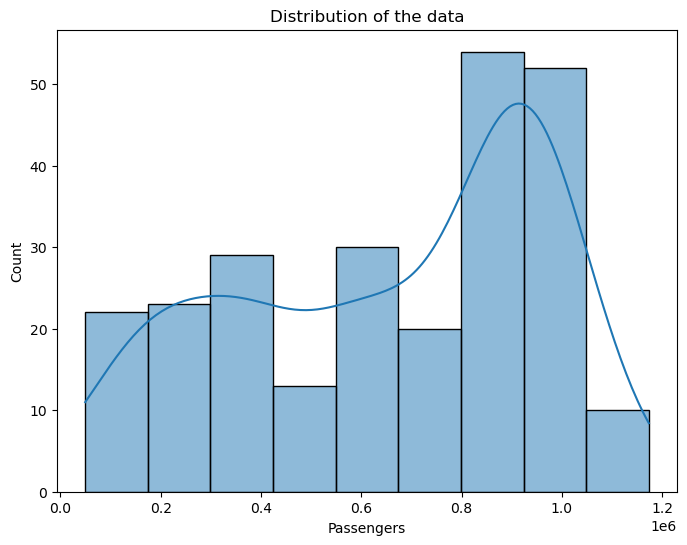

In [49]:
label_graph("Passengers", "Count", "Distribution of the data", 8, 6)
sns.histplot(df_general["Passengers"], kde=True);

- Modes 

In this case it is Non- Symmetric bi-modal distribution due to the presence of two modes (two values that occur more frequently than any other).
Its in fact a Non - Symmetric left - skewed bi modal distribution.

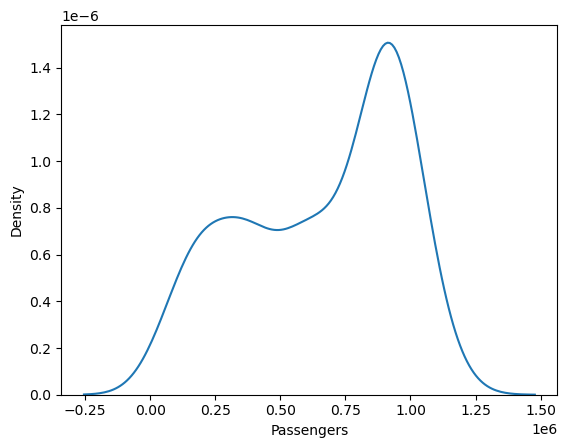

In [50]:
sns.kdeplot(df_general["Passengers"]);

In [51]:
def general_table(headers, rows):
    x = PrettyTable()
    x.field_names = headers
    for row in rows:
        new_row = []
        for item in row:
            new_row.append(item)
        x.add_row(new_row)    
    print(x)

- Skewness

In [52]:
#Skewness of the data
s = df_general["Passengers"].skew()
general_table(["Parameter","Value"],
              [["Coefficient of skewness (S)","{:.2f}".format(s)]])

+-----------------------------+-------+
|          Parameter          | Value |
+-----------------------------+-------+
| Coefficient of skewness (S) | -0.42 |
+-----------------------------+-------+


It is known that negative values of skewness refers to Left-Skewed (Negative). Even if the distribution shows a bimodal distribution it it is evident the same has a left-skewed behaviour.


- Kurtosis

In [53]:
#Kurtosis of the data
k = df_general["Passengers"].kurtosis()
general_table(["Parameter","Value"],
              [["Kurtosis (K)","{:.2f}".format(k)]])

+--------------+-------+
|  Parameter   | Value |
+--------------+-------+
| Kurtosis (K) | -1.16 |
+--------------+-------+


A negative kurtosis indicates a Platykurtic distribution it's shape is more flatter than normal and spread out, most of the values are in a range, leaving the tails with not so many records.

Measures of central tendency

In [93]:
median = np.median(df_general["Passengers"])
mean = np.mean(df_general["Passengers"])
maximun = max(df_general["Passengers"])
minimun = min(df_general["Passengers"])
rangev = np.ptp(df_general["Passengers"])

general_table(["Parameter","Value"],
              [["Median","{:.2f}".format(median)],
               ["Mean","{:.2f}".format(mean)],
               ["Maximun","{:.2f}".format(maximun)],
               ["Minumun","{:.2f}".format(minimun)],
               ["Range","{:.2f}".format(rangev)]])

+-----------+------------+
| Parameter |   Value    |
+-----------+------------+
|   Median  | 739584.00  |
|    Mean   | 656782.31  |
|  Maximun  | 1173473.00 |
|  Minumun  |  49393.00  |
|   Range   | 1124080.00 |
+-----------+------------+


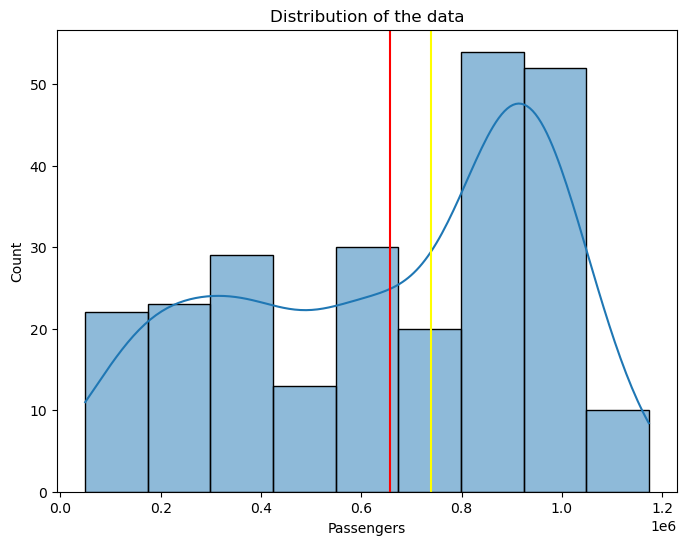

In [55]:
label_graph("Passengers", "Count", "Distribution of the data", 8, 6)
sns.histplot(df_general["Passengers"], kde=True);
plt.axvline(x = df_general["Passengers"].mean(),
            color='red');
plt.axvline(x = df_general["Passengers"].median(),
            color='yellow');

As seen in the grapgh above being the "red" line is the mean and the "yellow" the median. For the used dataset distribution it would be better to use the median due to the Left skewness of the data, being the median the value in between the mean and the left mode in this case.

Measures of variability

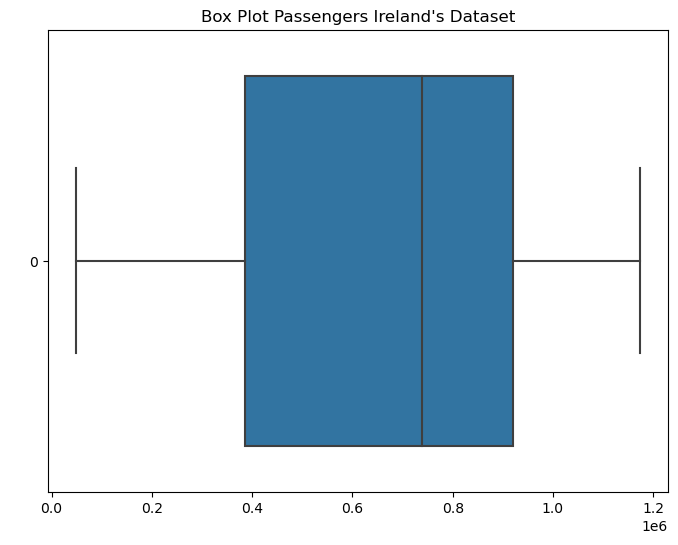

In [56]:
label_graph(" ", " ", "Box Plot Passengers Ireland's Dataset", 8, 6)
sns.boxplot(data = df_general["Passengers"], orient = "h");

In [57]:
df_general.describe()

Year   Week_Year    Passengers
count   253.000000  253.000000  2.530000e+02
mean   2020.932806   25.909091  6.567823e+05
std       1.391382   14.808957  3.070219e+05
min    2019.000000    1.000000  4.939300e+04
25%    2020.000000   13.000000  3.862080e+05
50%    2021.000000   26.000000  7.395840e+05
75%    2022.000000   38.000000  9.192550e+05
max    2023.000000   53.000000  1.173473e+06

In [58]:
std = np.std(df_general["Passengers"], ddof =1)
general_table(["Parameter","Value"],
              [["Standard deviation","{:.2f}".format(std)]])

+--------------------+-----------+
|     Parameter      |   Value   |
+--------------------+-----------+
| Standard deviation | 307021.91 |
+--------------------+-----------+


In [59]:
quantiles = np.quantile(df_general["Passengers"],[0,0.25,0.5,0.75,1])
print(f'Quantiles: {quantiles}')

Quantiles: [  49393.  386208.  739584.  919255. 1173473.]


In [60]:
q1 = np.quantile(df_general["Passengers"],0.25)
q2 = np.quantile(df_general["Passengers"],0.5)
q3 = np.quantile(df_general["Passengers"],0.75)

from scipy.stats import iqr
iqr = iqr(df_general["Passengers"])

general_table(["Parameter","Value"],
              [["Q1","{:.2f}".format(q1)],
               ["Q2","{:.2f}".format(q2)],
               ["Q3","{:.2f}".format(q3)],
               ["IQR","{:.2f}".format(iqr)]])

+-----------+-----------+
| Parameter |   Value   |
+-----------+-----------+
|     Q1    | 386208.00 |
|     Q2    | 739584.00 |
|     Q3    | 919255.00 |
|    IQR    | 533047.00 |
+-----------+-----------+


In [61]:
#Outliers
Outliers = df_general[((df_general["Passengers"]<(q1-1.5*iqr)) | (df_general["Passengers"]>(q3+1.5*iqr))) ]

In [62]:
general_table(["Parameter","Value"],
              [["Outliers_shape",Outliers.shape],
               ["df_general",df_general.shape]])

+----------------+----------+
|   Parameter    |  Value   |
+----------------+----------+
| Outliers_shape |  (0, 5)  |
|   df_general   | (253, 5) |
+----------------+----------+


In [63]:
outliers = (df_general[~((df_general["Passengers"]<(q1-(1.5*iqr))) | (df_general["Passengers"]>(q3+(1.5*iqr)))) ] )
outliers

Year  Week_Year       Luas_line Luas_line_encoded  Passengers
0    2019          1  All Luas lines                 0    549533.0
3    2019          2  All Luas lines                 0    839022.0
6    2019          3  All Luas lines                 0    819359.0
9    2019          4  All Luas lines                 0    860745.0
12   2019          5  All Luas lines                 0    912795.0
..    ...        ...             ...               ...         ...
753  2023         40  All Luas lines                 0   1050425.0
756  2023         41  All Luas lines                 0   1045716.0
759  2023         42  All Luas lines                 0   1085573.0
762  2023         43  All Luas lines                 0   1106246.0
765  2023         44  All Luas lines                 0    949071.0

[253 rows x 5 columns]

Graphically representation of the dataset compared to a normal distribution

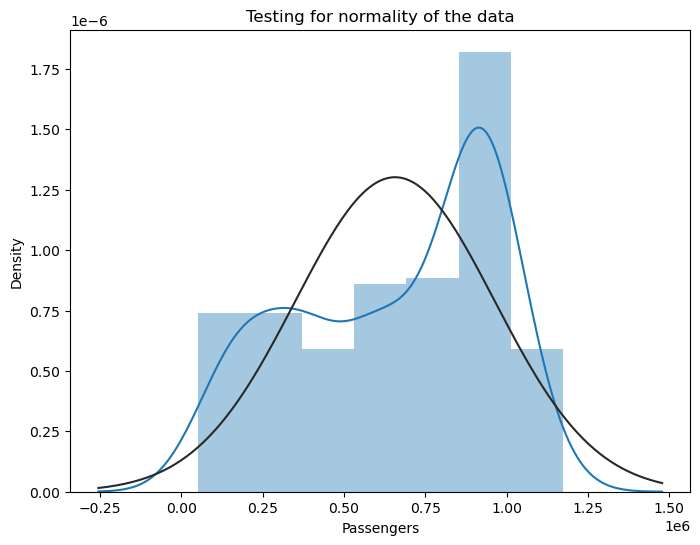

In [64]:
label_graph("Passengers", "Density", "Testing for normality of the data", 8, 6)
sns.distplot(df_general["Passengers"], fit = norm);

- Shapiro - Wilk test

Hypothesis

Ho (Accepted): The data are normally distributed (Po > 0.05)

Ha (Rejected): The data are not normally distributed 

In [65]:
shapiro(df_general["Passengers"])

ShapiroResult(statistic=0.921481728553772, pvalue=2.6879770631538236e-10)

Based on the results it would have to be concluded, that being the pvalue obtained with the Shapiro Test 2.68 which it is greater than 0.05, the null hypothesis would have to be accepted. However, graphically it is evident the data is not normally distributed.

It is important to note that the Shapiro-Wilk test is a one-tailed test, meaning that it only detects deviations from normality in one tail of the distribution. Therefore, it is possible for a data set to be non-normal but not detected by the Shapiro-Wilk test. Therefore, other techniques would be used to test normality in this case.

- Q-Q plot

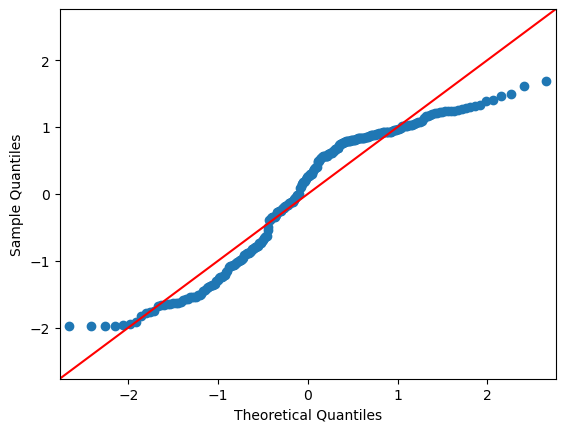

In [66]:
qqplot(df_general["Passengers"],norm, fit = True, line = "45")
plt.show()

It can be seen the two modes representing in the qqplot. It also shows how the data does not follows a normal ditribution.

In [67]:
df_general_stat= df_general.groupby("Year")["Passengers"].sum()
df_general_stat

Year
2019    48148506.0
2020    19397972.0
2021    19511557.0
2022    38854633.0
2023    40253257.0
Name: Passengers, dtype: float64

**Descriptive statistics Europe Dataset**

Shape of the data

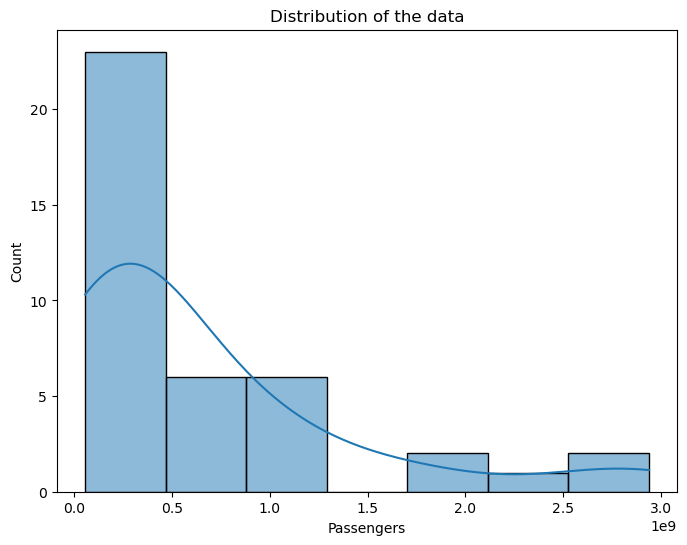

In [68]:
label_graph("Passengers", "Count", "Distribution of the data", 8, 6)
sns.histplot(df_eu["Passengers"], kde=True);

In [69]:
#Skewness of the data
s = df_eu["Passengers"].skew()
general_table(["Parameter","Value"],
              [["Coefficient of skewness (S)","{:.2f}".format(s)]])

+-----------------------------+-------+
|          Parameter          | Value |
+-----------------------------+-------+
| Coefficient of skewness (S) |  1.85 |
+-----------------------------+-------+


In [70]:
#Kurtosis of the data
k = df_eu["Passengers"].kurtosis()
general_table(["Parameter","Value"],
              [["Kurtosis (K)","{:.2f}".format(k)]])

+--------------+-------+
|  Parameter   | Value |
+--------------+-------+
| Kurtosis (K) |  2.94 |
+--------------+-------+


Measures of central tendency

In [95]:
median = np.median(df_eu["Passengers"])
mean = np.mean(df_eu["Passengers"])
maximun = max(df_eu["Passengers"])
minimun = min(df_eu["Passengers"])
rangev = np.ptp(df_eu["Passengers"])

general_table(["Parameter","Value"],
              [["Median","{:.2f}".format(median)],
               ["Mean","{:.2f}".format(mean)],
               ["Maximun","{:.2f}".format(maximun)],
               ["Minumun","{:.2f}".format(minimun)],
               ["Range","{:.2f}".format(rangev)]])

+-----------+---------------+
| Parameter |     Value     |
+-----------+---------------+
|   Median  |  324144500.00 |
|    Mean   |  660085225.00 |
|  Maximun  | 2938023000.00 |
|  Minumun  |  55009000.00  |
|   Range   | 2883014000.00 |
+-----------+---------------+


In [72]:
mean = np.mean(df_general["Passengers"])
mean

656782.3122529645

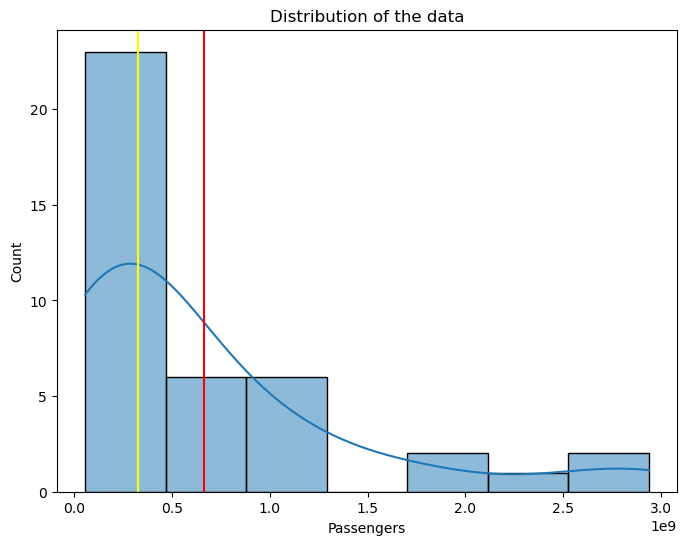

In [73]:
label_graph("Passengers", "Count", "Distribution of the data", 8, 6)
sns.histplot(df_eu["Passengers"], kde=True);
plt.axvline(x = df_eu["Passengers"].mean(),
            color='red');
plt.axvline(x = df_eu["Passengers"].median(),
            color='yellow');

Measures of variability

In [100]:
df_eu = df_eu.reset_index(drop = True)

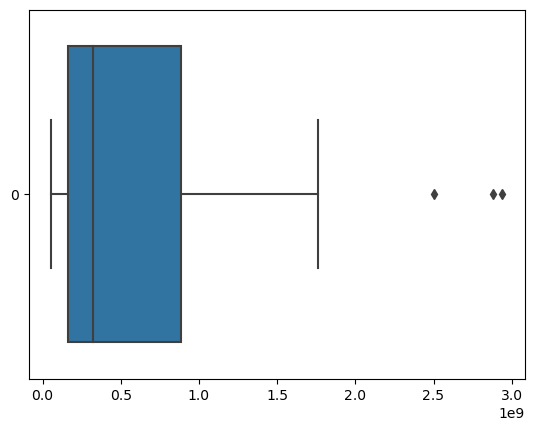

In [222]:
#label_graph(" ", " ", "Box Plot Passengers Ireland's Dataset", 8, 6)
sns.boxplot(df_eu["Passengers"], orient = "h");

In [102]:
std = np.std(df_eu["Passengers"], ddof =1)
general_table(["Parameter","Value"],
              [["Standard deviation","{:.2f}".format(std)]])

+--------------------+--------------+
|     Parameter      |    Value     |
+--------------------+--------------+
| Standard deviation | 755615144.93 |
+--------------------+--------------+


In [103]:
q1 = np.quantile(df_eu["Passengers"],0.25)
q2 = np.quantile(df_eu["Passengers"],0.5)
q3 = np.quantile(df_eu["Passengers"],0.75)


from scipy.stats import iqr
iqr = iqr(df_eu["Passengers"])

general_table(["Parameter","Value"],
              [["Q1","{:.2f}".format(q1)],
              ["Q2","{:.2f}".format(q2)],
              ["Q3","{:.2f}".format(q3)],
              ["IQR","{:.2f}".format(iqr)]])

+-----------+--------------+
| Parameter |    Value     |
+-----------+--------------+
|     Q1    | 165635000.00 |
|     Q2    | 324144500.00 |
|     Q3    | 885281500.00 |
|    IQR    | 719646500.00 |
+-----------+--------------+


In [104]:
#Outliers
Outliers = df_eu[((df_eu["Passengers"]<(q1-1.5*iqr)) | (df_eu["Passengers"]>(q3+1.5*iqr))) ]
general_table(["Parameter","Value"],
              [["Outliers_shape",Outliers.shape],
               ["df_general",df_eu.shape]])

+----------------+---------+
|   Parameter    |  Value  |
+----------------+---------+
| Outliers_shape |  (3, 7) |
|   df_general   | (40, 7) |
+----------------+---------+


In [105]:
outliers = (df_eu[((df_eu["Passengers"]<(q1-(1.5*iqr))) | (df_eu["Passengers"]>(q3+(1.5*iqr)))) ] )
outliers

Statistic_label  Year Country_code  Country Alpa_3code     Unit  \
5  ESTAT:RAIL_PA_TOTAL(1.0)  2018           DE  Germany        DEU  THS_PAS   
6  ESTAT:RAIL_PA_TOTAL(1.0)  2019           DE  Germany        DEU  THS_PAS   
9  ESTAT:RAIL_PA_TOTAL(1.0)  2022           DE  Germany        DEU  THS_PAS   

     Passengers  
5  2.880558e+09  
6  2.938023e+09  
9  2.505856e+09

Testing normality

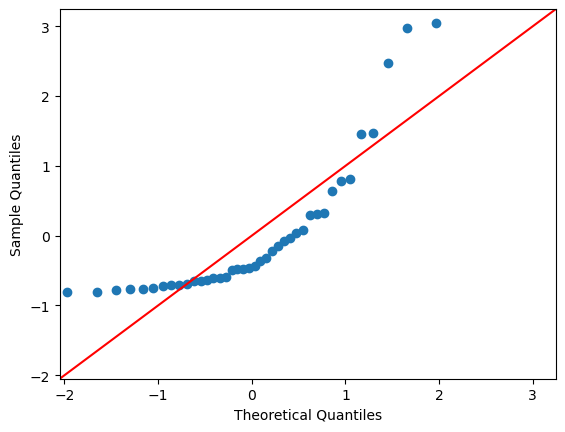

In [106]:
qqplot(df_eu["Passengers"],norm, fit = True, line = "45")
plt.show()

### Inferential Statistics

**Sampling the data (Ireland dataset)**

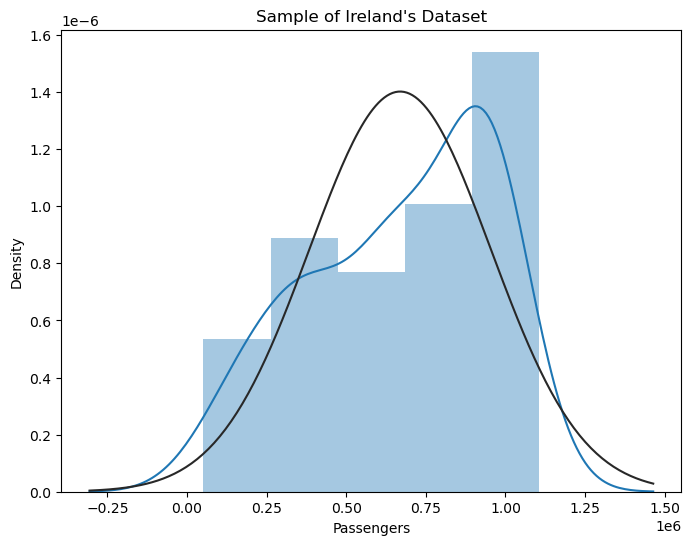

In [117]:
sample_size = 80
sample = df_general.sample(sample_size, random_state = 40)

label_graph("Passengers", "Density", "Sample of Ireland's Dataset", 8, 6)
sns.distplot(sample["Passengers"], fit = norm);

**Z-score test (Ireland dataset)**

Ho: The mean of the passangers is equal to 656782.31

Ha: The mean of the passangers is not equal to 656782.31

In [118]:
import math

#Values 
n = sample_size
cl = 0.95
alpha = 0.05
x_bar = np.mean(sample["Passengers"])
x = df_general["Passengers"].mean()
square = math.sqrt(n)
std_p = np.std(df_general["Passengers"], ddof =1)
std_error  = std_p / square

cvalue_p = norm.ppf(1-(alpha/2))
cvalue_n = norm.ppf((alpha/2))
z = (x_bar-x)/std_error


general_table(["Parameter","Value"],
              [["cvalue_p","{:.2f}".format(cvalue_p)],
               ["cvalue_n","{:.2f}".format(cvalue_n)],
               ["z","{:.2f}".format(z)]])

+-----------+-------+
| Parameter | Value |
+-----------+-------+
|  cvalue_p |  1.96 |
|  cvalue_n | -1.96 |
|     z     |  0.36 |
+-----------+-------+


In [119]:
if (z >= cvalue_p) & (z <= cvalue_n):
    print("Reject the null hypothesis")
else: 
    print("Fail to reject of the null hypothesis.")

Fail to reject of the null hypothesis.


In [120]:
print(f'Population mean: {x}')
print(f'Sample mean: {x_bar}')

Population mean: 656782.3122529645
Sample mean: 669149.2


**Significance level - (Ireland dataset)**

P-value

In [121]:
#With a Z score of 0.36 the P value would be 0.6406
p_value_test = norm.cdf(z)

general_table(["Parameter","Value"],
              [["P_value","{:.2f}".format(p_value_test)],
               ["P_value <= alpha",p_value_test<=alpha]])

# Interpret the results
alpha = 0.05
if p_value_test < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")


+------------------+-------+
|    Parameter     | Value |
+------------------+-------+
|     P_value      |  0.64 |
| P_value <= alpha | False |
+------------------+-------+
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


**Confidence interval (Ireland dataset)**

In [122]:
x_bar = np.mean(sample["Passengers"])
cl = 0.95
z =1.96
std_sample = np.std(sample["Passengers"])
square = math.sqrt(n)

In [123]:
margin_of_error = z*(std_sample/square)

general_table(["Parameter","Value"],
              [["Margin of error ME","{:.2f}".format(margin_of_error)],
               ["Confidence_interval_lower","{:.2f}".format(x_bar - margin_of_error)],
               ["Confidence_interval_upper","{:.2f}".format(x_bar + margin_of_error)]])


+---------------------------+-----------+
|         Parameter         |   Value   |
+---------------------------+-----------+
|     Margin of error ME    |  62380.14 |
| Confidence_interval_lower | 606769.06 |
| Confidence_interval_upper | 731529.34 |
+---------------------------+-----------+


**One sample proportion test (Ireland dataset)**

Ho: The proportion of the passangers on the Green line is the 50% of the passengers.

Ha: The proportion of the passangers on the Green line is not the 50% of the passengers.

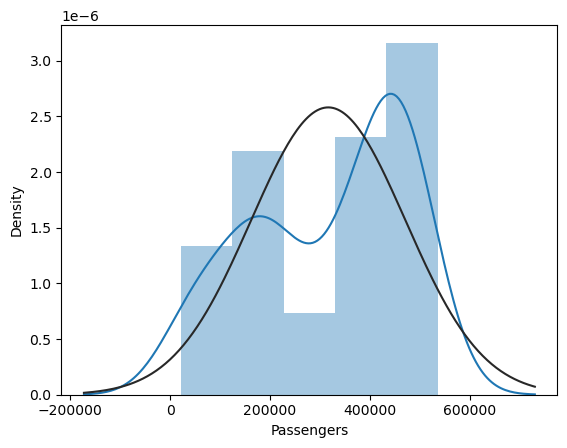

In [124]:
sample_size_prop = 80
sample_prop = df_expanded.sample(sample_size_prop, random_state = 40)

sns.distplot(sample_prop["Passengers"], fit = norm);

In [125]:
# Example data
sample_success = sample_prop.loc[sample_prop["Luas_line"] == "Green line"]["Passengers"].count()  
population_proportion = 0.6
print(sample_size_prop, sample_success)
# Conduct one-sample proportion test
z_stat, p_value = proportions_ztest(sample_success, sample_size_prop, population_proportion)

# Display the results
general_table(["Parameter","Value"],
              [["Z-statistic","{:.4f}".format(z_stat)],
               ["P-value","{:.4f}".format(p_value)]])

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The sample proportion is significantly different from the population proportion.")
else:
    print("Fail to reject the null hypothesis: The sample proportion is not significantly different from the population proportion.")

80 34
+-------------+---------+
|  Parameter  |  Value  |
+-------------+---------+
| Z-statistic | -3.1663 |
|   P-value   |  0.0015 |
+-------------+---------+
Reject the null hypothesis: The sample proportion is significantly different from the population proportion.


**Sampling the data (Eu dataset)**

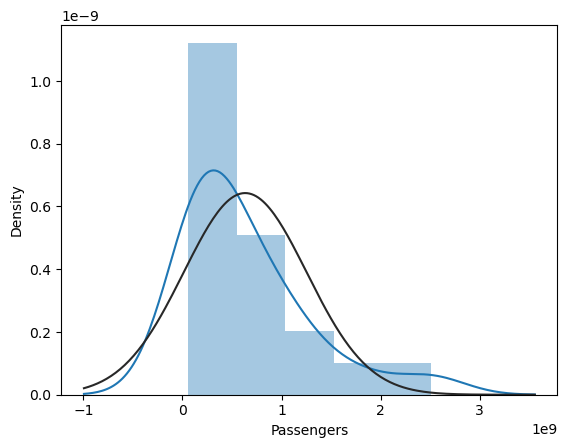

In [126]:
sample_size_eu = 20
sample_eu = df_eu.sample(sample_size_eu, random_state = 50)

sns.distplot(sample_eu["Passengers"], fit = norm);

**T-test (EU dataset)**

Ho: The mean of the passangers is equal to 660085225.0

Ha: The mean of the passangers is not equal to 660085225.0

In [127]:
#Values 
n_eu = sample_size_eu
cl = 0.95
alpha = 0.05
x_bar_eu = np.mean(sample_eu["Passengers"])
x = df_eu["Passengers"].mean()
square_eu = math.sqrt(n_eu)
std_p_eu = np.std(df_eu["Passengers"], ddof =1)
std_error_eu  = std_p_eu / square_eu
df = n_eu-1

cvalue_p = t.ppf(1-(alpha/2),df)
cvalue_n = t.ppf((alpha/2),df)
t_value = (x_bar_eu-x)/std_error_eu

general_table(["Parameter","Value"],
              [["cvalue_p","{:.2f}".format(cvalue_p)],
               ["cvalue_n","{:.2f}".format(cvalue_n)],
               ["t_value","{:.2f}".format(t_value)]])


+-----------+-------+
| Parameter | Value |
+-----------+-------+
|  cvalue_p |  2.09 |
|  cvalue_n | -2.09 |
|  t_value  | -0.16 |
+-----------+-------+


In [128]:
if t_value < cvalue_n or t_value > cvalue_p:
    print("⚠️Reject the null hypothesis.")
else: 
    print("⚠️Fail to reject of the null hypothesis.")

⚠️Fail to reject of the null hypothesis.


**Significance level - (EU dataset)**

P-value

In [129]:
#Calculating the p_value
p_value_test = 2*(1 - t.cdf(abs(t_value),df=df))

general_table(["Parameter","Value"],
              [["P_value","{:.2f}".format(p_value_test)],
               ["P_value <= alpha",p_value_test<=alpha]])

alpha = 0.05
if p_value_test < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.")

+------------------+-------+
|    Parameter     | Value |
+------------------+-------+
|     P_value      |  0.87 |
| P_value <= alpha | False |
+------------------+-------+
Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.


**Confidence interval (EU dataset)**

In [130]:
n_eu = sample_size_eu
cl = 0.95
square_eu = math.sqrt(n_eu)

t_critical = t.ppf((1+cl) / 2, df)

std_sample_eu = np.std(sample_eu["Passengers"], ddof =1)
std_error_sample  = std_sample_eu / square_eu

margin_of_error = t_critical * std_error_sample

lower_bound = x_bar_eu - margin_of_error
upper_bound = x_bar_eu + margin_of_error

general_table(["Parameter","Value"],
              [["Margin of error ME","{:.2f}".format(margin_of_error)],
               ["Confidence_interval_lower","{:.2f}".format(lower_bound)],
               ["Confidence_interval_upper","{:.2f}".format(upper_bound)]])

+---------------------------+--------------+
|         Parameter         |    Value     |
+---------------------------+--------------+
|     Margin of error ME    | 298000207.88 |
| Confidence_interval_lower | 334339692.12 |
| Confidence_interval_upper | 930340107.88 |
+---------------------------+--------------+


**#1 Independent two - tailed t - test (Ireland  and EU datasets)**

Ho: The mean of the passangers of Ireland dataset is equal to the mean of EU dataset

Ha: The mean of the passangers of Ireland dataset is not equal to the mean of EU dataset

In [131]:
n = sample_size
n_eu = sample_size_eu
x_bar = np.mean(df_general_stat)
x_bar_eu = np.mean(sample_eu["Passengers"])
std_sample = np.std(df_general_stat)
std_sample_eu = np.std(sample_eu["Passengers"], ddof =1)
cl = 0.95
df = (n + n_eu)-2

cvalue_p = t.ppf(1 - alpha / 2 ,df)
cvalue_n = t.ppf(alpha / 2 ,df)
t_value = (x_bar - x_bar_eu) / (math.sqrt((std_sample**2 / n) + (std_sample_eu**2 / n_eu)))

general_table(["Parameter","Value"],
              [["cvalue_p","{:.2f}".format(cvalue_p)],
               ["cvalue_n","{:.2f}".format(cvalue_n)],
               ["t_value","{:.2f}".format(t_value)]])


+-----------+-------+
| Parameter | Value |
+-----------+-------+
|  cvalue_p |  1.98 |
|  cvalue_n | -1.98 |
|  t_value  | -4.21 |
+-----------+-------+


In [132]:
if t_value < cvalue_n or t_value > cvalue_p:
    print("⚠️Reject the null hypothesis.")
else: 
    print("⚠️Fail to reject of the null hypothesis.")

⚠️Reject the null hypothesis.


**Significance level - (Ireland and EU datasets)**

In [133]:
#Calculating the p_value
p_value_test = 2*(1 - t.cdf(abs(t_value) ,df=df))

general_table(["Parameter","Value"],
              [["P_value","{:.6f}".format(p_value_test)],
               ["P_value <= alpha",p_value_test<=alpha]])


+------------------+----------+
|    Parameter     |  Value   |
+------------------+----------+
|     P_value      | 0.000057 |
| P_value <= alpha |   True   |
+------------------+----------+


The null hypothesis is rejected due to the fact that the P value is not greater than the alpha.

**#2 Independent left - tailed t - test (Ireland  and EU datasets)**

Ho: The mean of the passangers of Ireland dataset is > = than the mean of EU dataset

Ha: The mean of the passangers of Ireland dataset < than the mean of EU dataset

In [134]:
n = sample_size
n_eu = sample_size_eu
x_bar = np.mean(df_general_stat)
x_bar_eu = np.mean(sample_eu["Passengers"])
std_sample = np.std(df_general_stat)
std_sample_eu = np.std(sample_eu["Passengers"], ddof =1)
cl = 0.95
df = (n + n_eu)-2

cvalue_n = t.ppf(alpha ,df)
t_value = (x_bar - x_bar_eu) / (math.sqrt((std_sample**2 / n) + (std_sample_eu**2 / n_eu)))

general_table(["Parameter","Value"],
              [["cvalue_n","{:.2f}".format(cvalue_n)],
               ["t_value","{:.2f}".format(t_value)]])


+-----------+-------+
| Parameter | Value |
+-----------+-------+
|  cvalue_n | -1.66 |
|  t_value  | -4.21 |
+-----------+-------+


In [135]:
if t_value < cvalue_n:
    print("⚠️Reject the null hypothesis.")
else: 
    print("⚠️Fail to reject of the null hypothesis.")

⚠️Reject the null hypothesis.


**Significance level - (Ireland and EU datasets)**

In [136]:
#Calculating the p_value
p_value_test = t.cdf(t_value ,df=df)

general_table(["Parameter","Value"],
              [["P_value","{:.6f}".format(p_value_test)],
               ["P_value <= alpha",p_value_test<=alpha]])


+------------------+----------+
|    Parameter     |  Value   |
+------------------+----------+
|     P_value      | 0.000029 |
| P_value <= alpha |   True   |
+------------------+----------+


In [137]:
alpha = 0.05
if p_value_test < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.")

Reject the null hypothesis. The sample mean is significantly different from the population mean.


**#3 One - Way ANOVA test (Ireland  and EU datasets)**

Ho: The mean of the passangers of Ireland dataset is equal to the mean of EU dataset

Ha: The mean of the passangers of Ireland dataset is not equal to the mean of EU dataset


In [138]:
df_general_stat

Year
2019    48148506.0
2020    19397972.0
2021    19511557.0
2022    38854633.0
2023    40253257.0
Name: Passengers, dtype: float64

In [139]:
df_eu_AT = df_eu.loc[df_eu["Country_code"]=="AT"].copy()
df_eu_DE = df_eu.loc[df_eu["Country_code"]=="DE"].copy()
df_eu_DK = df_eu.loc[df_eu["Country_code"]=="DK"].copy()
df_eu_ES = df_eu.loc[df_eu["Country_code"]=="ES"].copy()
df_eu_FI = df_eu.loc[df_eu["Country_code"]=="FI"].copy()
df_eu_FR = df_eu.loc[df_eu["Country_code"]=="FR"].copy()
df_eu_IT = df_eu.loc[df_eu["Country_code"]=="IT"].copy()
df_eu_PT = df_eu.loc[df_eu["Country_code"]=="PT"].copy()

In [140]:
# Perform a one-way ANOVA
f_statistic, p_value = f_oneway(df_general_stat,
                                df_eu_AT["Passengers"],
                                df_eu_DE["Passengers"],
                                df_eu_DK["Passengers"],
                                df_eu_ES["Passengers"],
                                df_eu_FI["Passengers"],
                                df_eu_FR["Passengers"],
                                df_eu_IT["Passengers"],
                                df_eu_PT["Passengers"]
                               )

# Display the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# general_table(["Parameter","Value"],
#               [["F-statistic","{:.2f}".format(f_statistic)],
#                ["p-value","{:.10f}".format(p_value)]])

# Make a decision based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that at least one group mean is different.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of a difference in group means.")

F-statistic: 52.70412976202127
p-value: 1.403140293873737e-17
Reject the null hypothesis. There is evidence that at least one group mean is different.


**#4 One - Way ANOVA test (Ireland  and Second EU datasets)**

Ho: The mean of the passangers of Ireland dataset is equal to the mean of second EU dataset

Ha: The mean of the passangers of Ireland dataset is not equal to the mean of second EU dataset

In [141]:
#Selecting second EU dataset
df_eu2 = df_eucountries_code.loc[(df_eucountries_code["Year"] >= 2018) & (df_eucountries_code["Year"] < 2023) & (df_eucountries_code["Unit"] == "THS_PAS") & (df_eucountries_code["Country"].isin(["Estonia","Croatia","Turkey","Bulgaria"]))]

df_eu2["Passengers"]  = df_eu2["Passengers"].apply(lambda x : x*1000)
df_eu2

Statistic_label  Year Country_code   Country Alpa_3code  \
101   ESTAT:RAIL_PA_TOTAL(1.0)  2018           BG  Bulgaria        BGR   
102   ESTAT:RAIL_PA_TOTAL(1.0)  2019           BG  Bulgaria        BGR   
103   ESTAT:RAIL_PA_TOTAL(1.0)  2020           BG  Bulgaria        BGR   
104   ESTAT:RAIL_PA_TOTAL(1.0)  2021           BG  Bulgaria        BGR   
105   ESTAT:RAIL_PA_TOTAL(1.0)  2022           BG  Bulgaria        BGR   
283   ESTAT:RAIL_PA_TOTAL(1.0)  2018           EE   Estonia        EST   
284   ESTAT:RAIL_PA_TOTAL(1.0)  2019           EE   Estonia        EST   
285   ESTAT:RAIL_PA_TOTAL(1.0)  2020           EE   Estonia        EST   
286   ESTAT:RAIL_PA_TOTAL(1.0)  2021           EE   Estonia        EST   
287   ESTAT:RAIL_PA_TOTAL(1.0)  2022           EE   Estonia        EST   
431   ESTAT:RAIL_PA_TOTAL(1.0)  2018           HR   Croatia        HRV   
432   ESTAT:RAIL_PA_TOTAL(1.0)  2019           HR   Croatia        HRV   
433   ESTAT:RAIL_PA_TOTAL(1.0)  2020           HR   Croatia        HRV   
434   ESTAT:RAIL_PA_TOTAL(1.0)  2021           HR   Croatia        HRV   
435   ESTAT:RAIL_PA_TOTAL(1.0)  2022           HR   Croatia        HRV   
1023  ESTAT:RAIL_PA_TOTAL(1.0)  2018           TR    Turkey        TUR   
1024  ESTAT:RAIL_PA_TOTAL(1.0)  2019           TR    Turkey        TUR   
1025  ESTAT:RAIL_PA_TOTAL(1.0)  2020           TR    Turkey        TUR   
1026  ESTAT:RAIL_PA_TOTAL(1.0)  2021           TR    Turkey        TUR   

         Unit   Passengers  
101   THS_PAS   21329000.0  
102   THS_PAS   21329000.0  
103   THS_PAS   16808000.0  
104   THS_PAS   17142000.0  
105   THS_PAS   23065000.0  
283   THS_PAS    7759000.0  
284   THS_PAS    8373000.0  
285   THS_PAS    5984000.0  
286   THS_PAS    6077000.0  
287   THS_PAS    7129000.0  
431   THS_PAS   20244000.0  
432   THS_PAS   19827000.0  
433   THS_PAS   13100000.0  
434   THS_PAS   13534000.0  
435   THS_PAS   18581000.0  
1023  THS_PAS  100568000.0  
1024  THS_PAS  164712000.0  
1025  THS_PAS   99470000.0  
1026  THS_PAS  136103000.0

In [142]:
df_eu_BG = df_eu2.loc[df_eu2["Country_code"]=="BG"].copy()
df_eu_EE = df_eu2.loc[df_eu2["Country_code"]=="EE"].copy()
df_eu_HR = df_eu2.loc[df_eu2["Country_code"]=="HR"].copy()
df_eu_TR = df_eu2.loc[df_eu2["Country_code"]=="TR"].copy()

In [143]:
# Perform a one-way ANOVA
f_statistic, p_value = f_oneway(df_general_stat,
                                df_eu_BG["Passengers"],
                                df_eu_EE["Passengers"],
                                df_eu_HR["Passengers"],
                                df_eu_TR["Passengers"]
                               )

# Display the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Make a decision based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that at least one group mean is different.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of a difference in group means.")

F-statistic: 50.01264983783354
p-value: 7.91921914349261e-10
Reject the null hypothesis. There is evidence that at least one group mean is different.


**#5 Independent right - tailed t - test (Ireland  and second EU datasets)**

Ho: The mean of the passangers of Ireland dataset is <= than the mean of EU dataset

Ha: The mean of the passangers of Ireland dataset > than the mean of EU dataset

In [144]:
n = sample_size
n_eu2 = len(df_eu2["Passengers"])
x_bar = np.mean(sample["Passengers"])
x_bar_eu2 = np.mean(df_eu2["Passengers"])
std_sample = np.std(sample["Passengers"])
std_sample_eu2 = np.std(df_eu2["Passengers"], ddof =1)
cl = 0.95
df = (n + n_eu2)-2

cvalue_p = t.ppf(1-alpha ,df)
t_value = (x_bar - x_bar_eu2) / (math.sqrt((std_sample**2 / n) + (std_sample_eu2**2 / n_eu2)))

general_table(["Parameter","Value"],
              [["cvalue_p","{:.2f}".format(cvalue_p)],
               ["t_value","{:.2f}".format(t_value)]])


+-----------+-------+
| Parameter | Value |
+-----------+-------+
|  cvalue_p |  1.66 |
|  t_value  | -3.36 |
+-----------+-------+


In [145]:
if t_value > cvalue_p:
    print("⚠️Reject the null hypothesis.")
else: 
    print("⚠️Fail to reject of the null hypothesis.")

⚠️Fail to reject of the null hypothesis.


In [146]:
#Calculating the p_value
p_value_test = t.cdf(1-t_value ,df=df)

general_table(["Parameter","Value"],
              [["P_value","{:.3f}".format(p_value_test)],
               ["P_value <= alpha",p_value_test<=alpha]])
print(p_value_test)
alpha = 0.05
if p_value_test < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.")

+------------------+-------+
|    Parameter     | Value |
+------------------+-------+
|     P_value      | 1.000 |
| P_value <= alpha | False |
+------------------+-------+
0.9999839121833444
Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.


# Machine Learning

### Machine Learning Models

In [147]:
results = []

def save_results(model,train_score,test_score):
    results.append([model,train_score,test_score])
    
def show_results():
    x = PrettyTable()
    x.field_names = ["Model", "Train Score", "Test Scores"]
    for result in results:
         x.add_row([result[0],"{:.2f}".format(result[1]),"{:.2f}".format(result[2])])    
    print(x)

**Testing**

In [148]:
save_results("Test","0.80","0.95")

if results[0][0] != "Test":
    print("The model name was logged incorrectly")
elif results[0][1] != "0.80":
    print("The train score was logged incorrectly")
elif results[0][2] != "0.95":
    print("The test score was logged incorrectly")
else:
    print("The records were logged correctly")
    
results = []    

The records were logged correctly


 - Preprocessing the data before building the models

In [149]:
df_general

Year  Week_Year       Luas_line Luas_line_encoded  Passengers
0    2019          1  All Luas lines                 0    549533.0
3    2019          2  All Luas lines                 0    839022.0
6    2019          3  All Luas lines                 0    819359.0
9    2019          4  All Luas lines                 0    860745.0
12   2019          5  All Luas lines                 0    912795.0
..    ...        ...             ...               ...         ...
753  2023         40  All Luas lines                 0   1050425.0
756  2023         41  All Luas lines                 0   1045716.0
759  2023         42  All Luas lines                 0   1085573.0
762  2023         43  All Luas lines                 0   1106246.0
765  2023         44  All Luas lines                 0    949071.0

[253 rows x 5 columns]

In [150]:
df_general["date"] =  pd.to_datetime(df_general['Year'].astype(str) + df_general['Week_Year'].astype(str) + '0', format='%G%V%w')
df_general["month"] = df_general["date"].apply(lambda x: x.month ) 
df_ml = df_general.groupby(["Year","month"]).agg({"Passengers": "sum"}).reset_index()
condition = df_general["Year"] > 2019
df_ml = df_general[condition]
df_ml["Year"] = df_ml["Year"].astype("int64")
df_ml["Week_Year"] = df_ml["Week_Year"].astype("int64")

**Linear Regression**

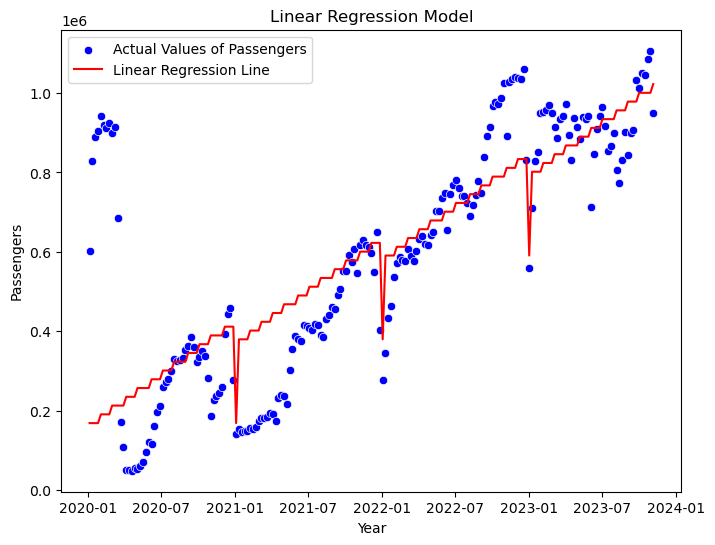

Training set R^2 score: 0.63
Test set R^2 score: 0.44


In [151]:
#Splitting the data
X = df_ml[["Year","month"]]
y = df_ml["Passengers"]

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)
predicted_passengers = my_lm.predict(X)

#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Storing the results
save_results("Linear regression model",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Linear Regression Model",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Linear Regression Line')

# Show the plot
plt.show()

# Display the score values
print("Training set R^2 score: {:.2f}".format(my_lm.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(my_lm.score(X_test, y_test)))

**Lagged Linear Regression**

In [152]:
df_ml_lagged = df_ml.copy()
#Adding lagged variable
df_ml_lagged["passenger_l1"] = df_ml_lagged["Passengers"].shift(1)
df_ml_lagged["passenger_l2"] = df_ml_lagged["Passengers"].shift(2)
df_ml_lagged["passenger_l3"] = df_ml_lagged["Passengers"].shift(3)
df_ml_lagged["passenger_l4"] = df_ml_lagged["Passengers"].shift(4)
df_ml_lagged["passenger_l5"] = df_ml_lagged["Passengers"].shift(5)

# Display the first 10 records
df_ml_lagged.head(10)

Year  Week_Year       Luas_line Luas_line_encoded  Passengers       date  \
159  2020          1  All Luas lines                 0    602998.0 2020-01-05   
162  2020          2  All Luas lines                 0    828455.0 2020-01-12   
165  2020          3  All Luas lines                 0    889804.0 2020-01-19   
168  2020          4  All Luas lines                 0    904841.0 2020-01-26   
171  2020          5  All Luas lines                 0    942828.0 2020-02-02   
174  2020          6  All Luas lines                 0    920121.0 2020-02-09   
177  2020          7  All Luas lines                 0    911461.0 2020-02-16   
180  2020          8  All Luas lines                 0    923869.0 2020-02-23   
183  2020          9  All Luas lines                 0    898856.0 2020-03-01   
186  2020         10  All Luas lines                 0    914613.0 2020-03-08   

     month  passenger_l1  passenger_l2  passenger_l3  passenger_l4  \
159      1           NaN           NaN           NaN           NaN   
162      1      602998.0           NaN           NaN           NaN   
165      1      828455.0      602998.0           NaN           NaN   
168      1      889804.0      828455.0      602998.0           NaN   
171      2      904841.0      889804.0      828455.0      602998.0   
174      2      942828.0      904841.0      889804.0      828455.0   
177      2      920121.0      942828.0      904841.0      889804.0   
180      2      911461.0      920121.0      942828.0      904841.0   
183      3      923869.0      911461.0      920121.0      942828.0   
186      3      898856.0      923869.0      911461.0      920121.0   

     passenger_l5  
159           NaN  
162           NaN  
165           NaN  
168           NaN  
171           NaN  
174      602998.0  
177      828455.0  
180      889804.0  
183      904841.0  
186      942828.0

In [153]:
# Drop Null values from the dataframe
df_ml_lagged = df_ml_lagged.dropna()

# Display the first 10 records
df_ml_lagged.head(10)

Year  Week_Year       Luas_line Luas_line_encoded  Passengers       date  \
174  2020          6  All Luas lines                 0    920121.0 2020-02-09   
177  2020          7  All Luas lines                 0    911461.0 2020-02-16   
180  2020          8  All Luas lines                 0    923869.0 2020-02-23   
183  2020          9  All Luas lines                 0    898856.0 2020-03-01   
186  2020         10  All Luas lines                 0    914613.0 2020-03-08   
189  2020         11  All Luas lines                 0    684508.0 2020-03-15   
192  2020         12  All Luas lines                 0    172062.0 2020-03-22   
195  2020         13  All Luas lines                 0    109378.0 2020-03-29   
198  2020         14  All Luas lines                 0     51655.0 2020-04-05   
201  2020         15  All Luas lines                 0     51695.0 2020-04-12   

     month  passenger_l1  passenger_l2  passenger_l3  passenger_l4  \
174      2      942828.0      904841.0      889804.0      828455.0   
177      2      920121.0      942828.0      904841.0      889804.0   
180      2      911461.0      920121.0      942828.0      904841.0   
183      3      923869.0      911461.0      920121.0      942828.0   
186      3      898856.0      923869.0      911461.0      920121.0   
189      3      914613.0      898856.0      923869.0      911461.0   
192      3      684508.0      914613.0      898856.0      923869.0   
195      3      172062.0      684508.0      914613.0      898856.0   
198      4      109378.0      172062.0      684508.0      914613.0   
201      4       51655.0      109378.0      172062.0      684508.0   

     passenger_l5  
174      602998.0  
177      828455.0  
180      889804.0  
183      904841.0  
186      942828.0  
189      920121.0  
192      911461.0  
195      923869.0  
198      898856.0  
201      914613.0

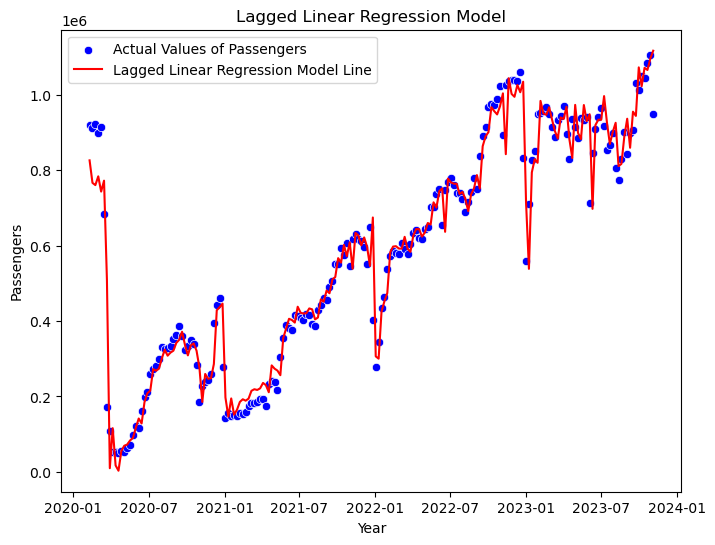

Training set R^2 score: 0.96
Test set R^2 score: 0.94


In [154]:
#Fitting the full Linear Regression model

#Create X and y objects
X = df_ml_lagged[["Year","month","passenger_l1", "passenger_l2", "passenger_l3", "passenger_l4", "passenger_l5"]]
y = df_ml_lagged["Passengers"]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Fit the model
ml_lml = LinearRegression()
ml_lml.fit(X_train, y_train)

#Calculate the train Forecasting
train_fcst = ml_lml.predict(X_train)
test_fcst = ml_lml.predict(X_test)
predicted_passengers = ml_lml.predict(X)

#Calculate teh r2 score for train and test
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Storing the results
save_results("Lagged Linear regression",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Lagged Linear Regression Model",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml_lagged , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml_lagged, color='red', label='Lagged Linear Regression Model Line')

# Show the plot
plt.show()

# Display the score values
print("Training set R^2 score: {:.2f}".format(ml_lml.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(ml_lml.score(X_test, y_test)))

**Polynomial Regression**

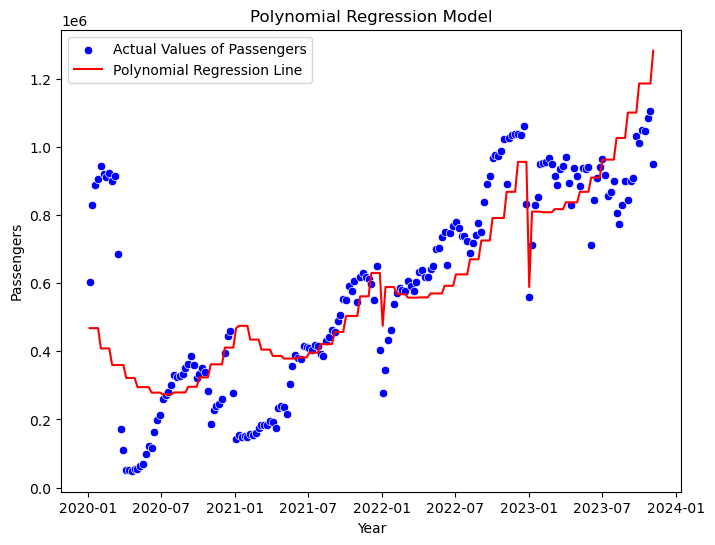

Training set R^2 score: 0.70
Test set R^2 score: 0.60


In [155]:
# Create X and y objects
X = df_ml[["Year","month"]]
y = df_ml["Passengers"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

poly = PolynomialFeatures(degree = 2)
poly
poly_features = poly.fit_transform(X)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)
poly_model = LinearRegression()
poly_model.fit(poly_features, y)  

train_fcst = poly_model.predict(poly_X_train)
test_fcst = poly_model.predict(poly_X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

# Storing the results
save_results("Polinomial regression model",train_r2,test_r2)

predict_passengers = poly_model.predict(poly_features)

#Plot result
label_graph("Year", "Passengers", "Polynomial Regression Model",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predict_passengers, data = df_ml, color='red', label='Polynomial Regression Line')

# Show the plot
plt.show()

# Display the score values
print("Training set R^2 score: {:.2f}".format(poly_model.score(poly_X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(poly_model.score(poly_X_test, y_test)))

**Polynomial Regression - GridSearchCV**

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameter Values: {'polynomialfeatures__degree': 4}


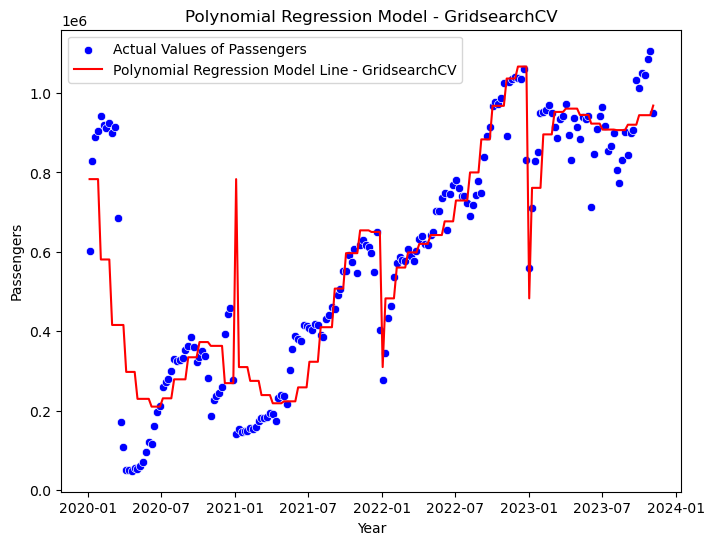

Training set R^2 score: 0.85
Test set R^2 score: 0.78
Best Hyperparameters: {'polynomialfeatures__degree': 4}
Cross - Validation best score: 0.78


In [156]:
#Create X and y objects
X = df_ml[["Year","month"]]
y = df_ml["Passengers"]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

#Tune Hyperparameters
poly_reg = make_pipeline(PolynomialFeatures(), LinearRegression())
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param_grid = {'polynomialfeatures__degree': np.arange(2, 10)}
grid_search = GridSearchCV(poly_reg, param_grid, scoring = 'r2', cv = folds, verbose = 1, n_jobs = -1)
grid_search.fit(X_train, y_train)

#Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameter Values:", best_params)

#Get the best model
best_model = grid_search.best_estimator_

#Predictions and R^2 scores
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

#Storing the results
save_results("Polynomial Regression Model - GridsearchCV",train_r2,test_r2)

# Plot the results
poly_X = best_model.named_steps['polynomialfeatures'].transform(X)
predict_passengers = best_model.predict(X)

#Plot result
label_graph("Year", "Passengers", "Polynomial Regression Model - GridsearchCV",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predict_passengers, data = df_ml, color='red', label='Polynomial Regression Model Line - GridsearchCV')

# Show the plot
plt.show()

# Display the score values
print("Training set R^2 score: {:.2f}".format(best_model.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(best_model.score(X_test, y_test)))
print(f'Best Hyperparameters: {grid_search.best_params_}')
print("Cross - Validation best score: {:.2f}".format(grid_search.best_score_))

**Ridge model**

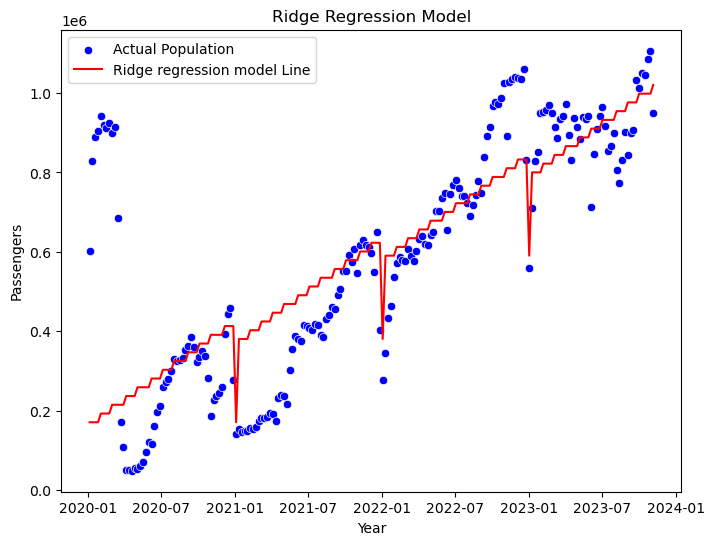

Training set score: 0.63
Test set score: 0.44


In [157]:
from sklearn.linear_model import Ridge

#Splitting the data
X = df_ml[["Year","month"]]
y = df_ml["Passengers"]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

#Calculate the train Forecasting
train_fcst = ridge.predict(X_train)
test_fcst = ridge.predict(X_test)
predicted_passengers = ridge.predict(X)

#Calculate teh r2 score for train and test
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Storing the results
save_results("Ridge regression model",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Ridge Regression Model",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Population')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Ridge regression model Line')

#Show the plot
plt.show()

#Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

**Ridge model - GridsearchCV**

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameter Values: {'polynomialfeatures__degree': 5, 'ridge__alpha': 1}


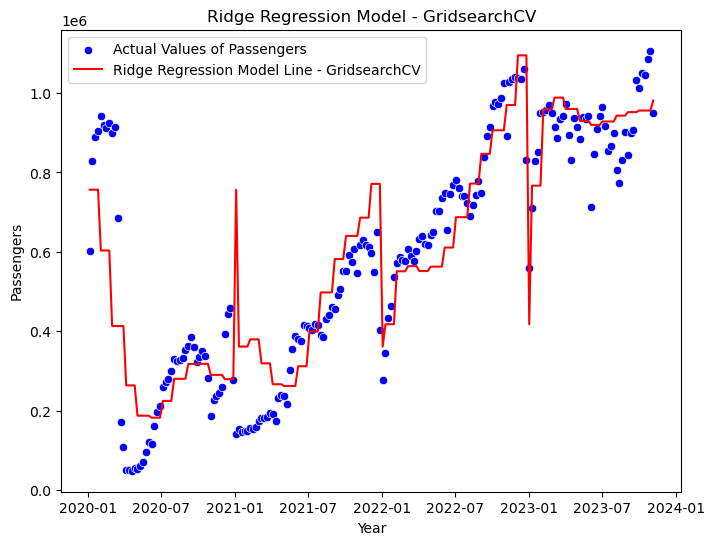

Training set R^2 score: 0.84
Test set R^2 score: 0.75
Best Hyperparameters: {'polynomialfeatures__degree': 5, 'ridge__alpha': 1}
Cross - Validation best score: 0.76


In [158]:
#Create X and y objects
X = df_ml[["Year","month"]]
y = df_ml["Passengers"]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

#Tune Hyperparameters
poly_reg = make_pipeline(PolynomialFeatures(), Ridge())
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param_grid = {'polynomialfeatures__degree': np.arange(2, 10),"ridge__alpha": [0.1,1,100,1000]}
grid_search = GridSearchCV(poly_reg, param_grid, scoring = 'r2', cv = folds, verbose = 1, n_jobs = -1)
grid_search.fit(X_train, y_train)

#Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameter Values:", best_params)

#Get the best model
best_model = grid_search.best_estimator_

#Predictions and R^2 scores
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

#Storing the results
save_results("Ridge Regression Model - GridsearchCV",train_r2,test_r2)

#Plot the results
poly_X = best_model.named_steps['polynomialfeatures'].transform(X)
predict_passengers = best_model.predict(X)

#Plot result
label_graph("Year", "Passengers", "Ridge Regression Model - GridsearchCV",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predict_passengers, data = df_ml, color='red', label='Ridge Regression Model Line - GridsearchCV')

# Show the plot
plt.show()

# Display the score values
print("Training set R^2 score: {:.2f}".format(best_model.score(X_train, y_train)))
print("Test set R^2 score: {:.2f}".format(best_model.score(X_test, y_test)))
print(f'Best Hyperparameters: {grid_search.best_params_}')
print("Cross - Validation best score: {:.2f}".format(grid_search.best_score_))

**Decision Tree Regression**

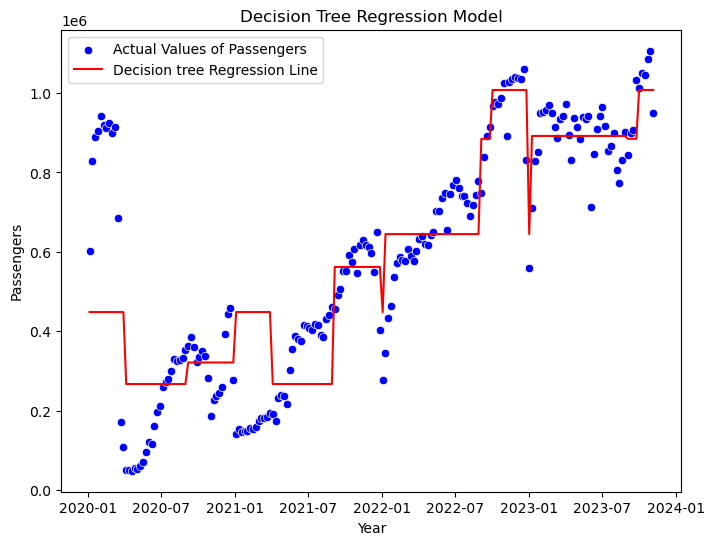

Training set score: 0.77
Test set score: 0.68


In [159]:
#Store the feature or attribute values in X and y
X = df_ml[["Year","month"]].values
y = df_ml["Passengers"].values

#Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Initialise an object by calling a method DecisionTreeRegressor()
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)

train_fcst = tree.predict(X_train)
test_fcst = tree.predict(X_test)
predicted_passengers = tree.predict(X)

#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Storing the results
save_results("Decision Tree regression model",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Decision Tree Regression Model",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Decision tree Regression Line')

# Show the plot
plt.show()

# Display the score values for Decision Tree function
print("Training set score: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

**Decision Tree Regression - GridSearchCV**

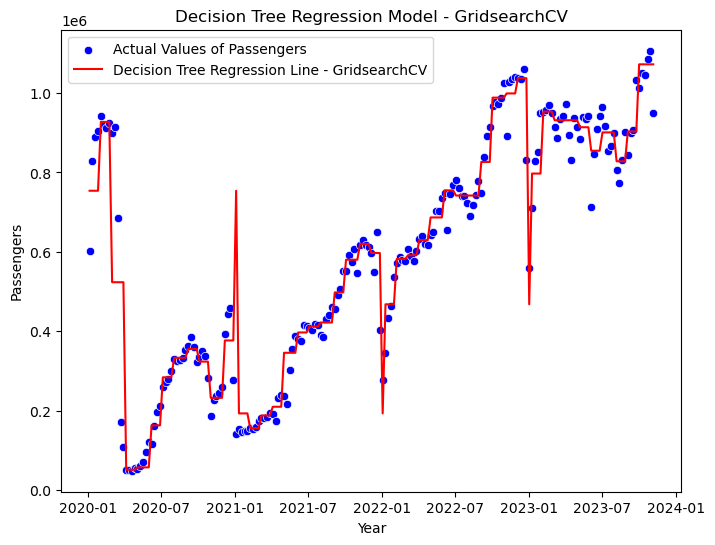

Training set score: 0.93
Test set score: 0.89
Best Hyperparameters: {'max_depth': 7}
Cross - Validation best score: 0.84


In [160]:
#Store the feature or attribute values in X and y
X = df_ml[["Year","month"]].values
y = df_ml["Passengers"].values

#Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Tune Hyperparameters
tree = DecisionTreeRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
tree_params = [{'max_depth': list(range(4, 20))}]
clf = GridSearchCV(tree, tree_params, cv = folds, scoring='r2', n_jobs = -1)
clf.fit(X_train, y_train)

#Predictions
train_fcst = clf.predict(X_train)
test_fcst = clf.predict(X_test)
predicted_passengers = clf.predict(X)

#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Storing the results
save_results("Decision Tree Regression Model - GridsearchCV",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Decision Tree Regression Model - GridsearchCV",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Decision Tree Regression Line - GridsearchCV')

# Show the plot
plt.show()

# Display the score values for Decision Tree function
print("Training set score: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))
print(f'Best Hyperparameters: {clf.best_params_}')
print("Cross - Validation best score: {:.2f}".format(clf.best_score_))

**Random forest regression**

0.9303799665318001 0.9112049640696894


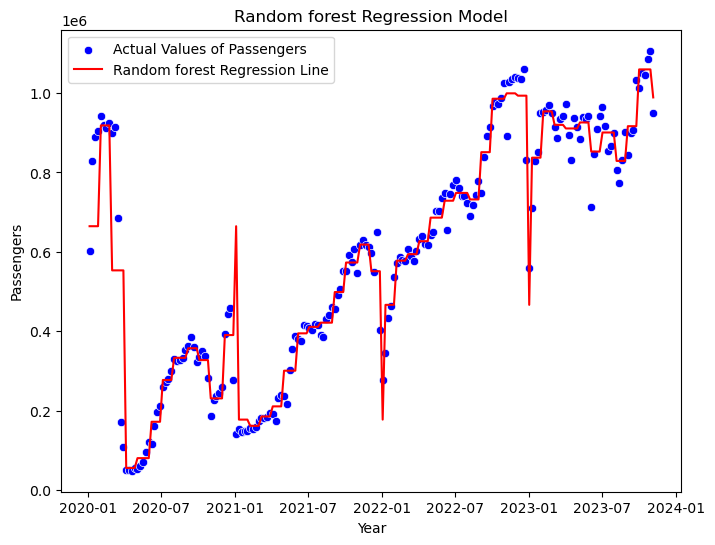

Training set score: 0.93
Test set score: 0.91


In [161]:
#Store the feature or attribute values in X and y
X = df_ml[["Year","month"]].values
y = df_ml["Passengers"].values

#Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Initialise an object by calling a method DecisionTreeRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion='squared_error',
                               max_depth  = None,
                               min_samples_split = 2, 
                               min_samples_leaf = 1)
forest.fit(X, y)

train_fcst = forest.predict(X_train)
test_fcst = forest.predict(X_test)
predicted_passengers = forest.predict(X)


#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Store the results
print(train_r2, test_r2)
save_results("Random forest Regression model",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Random forest Regression Model",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Random forest Regression Line')

#Show the plot
plt.show()

#Display the score values for Fores function
print("Training set score: {:.2f}".format(forest.score(X_train, y_train)))
print("Test set score: {:.2f}".format(forest.score(X_test, y_test)))

**Random forest regression - GridsearchCV**

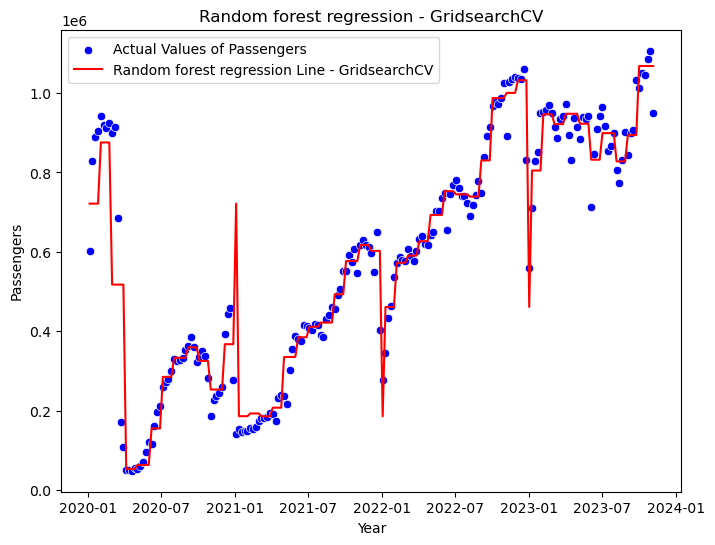

Training set score: 0.93
Test set score: 0.89
Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Cross - Validation best score: 0.85


In [162]:
#Store the feature or attribute values in X and y
X = df_ml[["Year","month"]].values
y = df_ml["Passengers"].values

#Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Tune Hyperparameters
forest = RandomForestRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param_grid = {
    'n_estimators': [50, 100, 150,1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion':['squared_error']
}

grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, scoring = 'r2', cv = folds)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

train_fcst = grid_search.predict(X_train)
test_fcst = grid_search.predict(X_test)
predicted_passengers = grid_search.predict(X)

#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Store the results
save_results("Random forest regression - GridsearchCV",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Random forest regression - GridsearchCV",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Random forest regression Line - GridsearchCV')

#Show the plot
plt.show()

#Display the score values for Forest function
print("Training set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print(f'Best Hyperparameters: {grid_search.best_params_}')
print("Cross - Validation best score: {:.2f}".format(grid_search.best_score_))

**Random forest regression - GridsearchCV**

Fitting 5 folds for each of 144 candidates, totalling 720 fits
0.933131210817616 0.8835560588124848


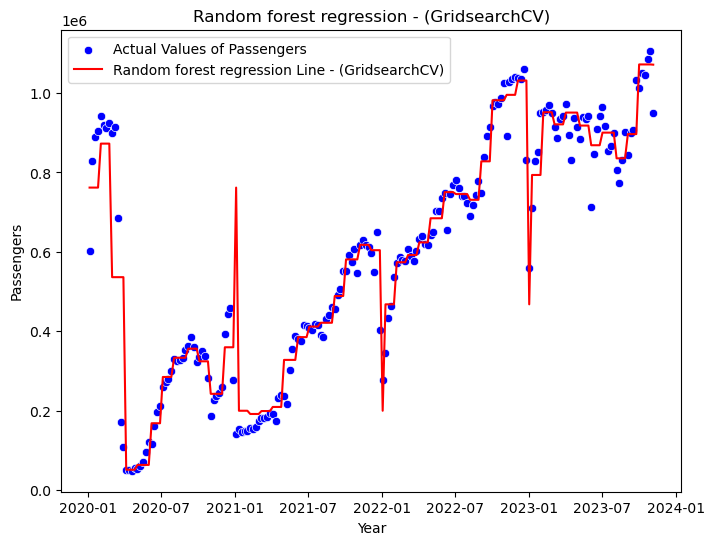

Training set score: 0.93
Test set score: 0.88
Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross - Validation best score: 0.86


In [163]:
# Store the feature or attribute values in X and y
X = df_ml[["Year","month"]].values
y = df_ml["Passengers"].values

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Tune Hyperparameters
forest = RandomForestRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param_grid = {
    'n_estimators': [50, 100, 150,1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion':['squared_error']
}

grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, scoring = 'r2', cv = folds, verbose = 1, return_train_score = True)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_randomforest = grid_search.best_estimator_


train_fcst = grid_search.predict(X_train)
test_fcst = grid_search.predict(X_test)
predicted_passengers = grid_search.predict(X)


#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Display the training and test score
print(train_r2, test_r2)
#save_results("Random forest regression - (GridsearchCV)",train_r2,test_r2)

#Plot result
label_graph("Year", "Passengers", "Random forest regression - (GridsearchCV)",8,6)
sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y = predicted_passengers, data = df_ml, color='red', label='Random forest regression Line - (GridsearchCV)')

# Show the plot
plt.show()

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print(f'Best Hyperparameters: {grid_search.best_params_}')
print("Cross - Validation best score: {:.2f}".format(grid_search.best_score_))

**Tabulating results**

In [164]:
show_results()

+-----------------------------------------------+-------------+-------------+
|                     Model                     | Train Score | Test Scores |
+-----------------------------------------------+-------------+-------------+
|            Linear regression model            |     0.63    |     0.44    |
|            Lagged Linear regression           |     0.96    |     0.94    |
|          Polinomial regression model          |     0.70    |     0.60    |
|   Polynomial Regression Model - GridsearchCV  |     0.85    |     0.78    |
|             Ridge regression model            |     0.63    |     0.44    |
|     Ridge Regression Model - GridsearchCV     |     0.84    |     0.75    |
|         Decision Tree regression model        |     0.77    |     0.68    |
| Decision Tree Regression Model - GridsearchCV |     0.93    |     0.89    |
|         Random forest Regression model        |     0.93    |     0.91    |
|    Random forest regression - GridsearchCV    |     0.93    | 

- Predictions of number of passengers

**Random Forest Regression Model - Prediction**

In [165]:
def add_years(years):
    new_df = pd.DataFrame([],columns =  ["Year","month","date"])
    
    for year in range(years):
        newYear = 2024 + year
        for month in range(1,13):
            newdate = date(newYear,month,1)
            newdf = pd.DataFrame([[newYear,month,newdate]],columns = ["Year","month","date"])
            new_df = pd.concat([new_df, newdf])
            
    return new_df

**Testings**

In [166]:
years = 5 
results = add_years(years)

if results.shape[0] != years*12:
    print("Error")
elif results.shape[1] != 3:
    print("Error")
else:
    print("Success")

Success


In [167]:
def predict_randomf(years,dataset):

    results = add_years(years)
    dataset = pd.concat([dataset, results])
    
    predicted_passengers = best_model_randomforest.predict(dataset[["Year","month"]])
    dataset["Luas_line"]="Predicted"
    dataset["Passengers"]= predicted_passengers
    
    return dataset

<Axes: xlabel='date', ylabel='Passengers'>

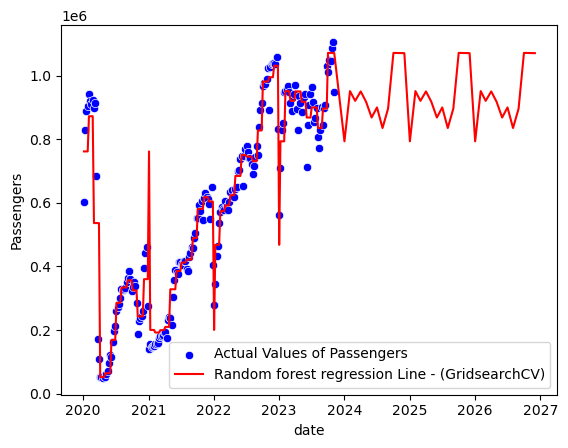

In [168]:
newdf_ml = predict_randomf(3,df_ml)

sns.scatterplot(x = "date", y = "Passengers", data = df_ml , color='blue', label='Actual Values of Passengers')
sns.lineplot(x = "date", y =  "Passengers", data = newdf_ml, color='red', label='Random forest regression Line - (GridsearchCV)')


### Sentimental analysis

**Sentimental analysis on Ireland Dataset**

In [169]:
!pip install praw

In [170]:
!pip install python-dotenv

In [171]:
import praw
from datetime import datetime as dt
from dotenv import load_dotenv
from os import getenv

In [172]:
load_dotenv()

True

In [173]:
# Get the environmental variables
APP_NAME = getenv('APP_NAME')
APP_ID = getenv("APP_ID")
APP_SECRET = getenv("APP_SECRET")
USERNAME = getenv('REDDIT_USERNAME')
#PASSWORD = getenv('PASSWORD')


In [174]:
#Testing
# Check that the variables all loaded
if APP_NAME and APP_ID and APP_SECRET and USERNAME:
    print("Credentials loaded")
else:
    print("ERROR: Credentials not loaded!!")


Credentials loaded


In [175]:
#Connecting to Reddit
reddit = praw.Reddit(
    client_id = getenv("APP_ID"),
    client_secret = getenv("APP_SECRET"),
    user_agent = f'CA_02 u/ {getenv("REDDIT_USERNAME")}',
)
    

In [176]:
print(reddit.read_only)

True


In [177]:
subreddit = reddit.subreddit("Ireland")

In [178]:
#Extracting the comments and relevant information
for post in subreddit.search("luas"):
    print("******")
    print("Text =", post.selftext)
    
    for comment in list(post.comments):
        print("Title =", post.title)
        print("Coment =", comment.body)
        print("Score =", comment.score)
        print("Comment count =", post.num_comments)
        print(dt.fromtimestamp(comment.created_utc))
        print("\n")
        print("------------------------------------------")
        
#print(subreddit.display_name)
#print(subreddit.title)
#print(subreddit.description)

******
Text = Absolutely fuming after an encounter with a Luas inspector today on the green line.

For context I always pay my fare and I’ve noticed a ridiculous amount of inspections recently so I wouldn’t dream of trying to dodge it right now.

So I tagged on at home to head to town for an appointment, then when I got to Dawson street didn’t tap off because I was in a rush and the 1€ 90 minute fare had already come off.

Went back to Dawson about an hour later, tapped the leap card. However it tapped off instead of on without me realising, still within the 90 minutes. Then I get my ticket checked on the Luas. I think nothing of it, happens all the time.

Then he says I’m not tapped on. And I say “um yes I did”. And he says “ well look here at my machine, it’s red it means it’s not valid.” 
So I’m like “ah yeah but look above, it’s tapped on from before and it’s within 90 minutes so it’s grand, I just mustn’t have tapped off, honest mistake”

Then he say’s because it’s red he has to f

Title = Men harassing women at luas stop in Dublin
Coment = Like what did they think was gonna happen?
They girls would just fall in love with them?
They are absolutely disgusting
Score = 334
Comment count = 280
2023-07-11 11:41:14


------------------------------------------
Title = Men harassing women at luas stop in Dublin
Coment = Hey look, it's real people who actually think they're versatile 🥲
Score = 86
Comment count = 280
2023-07-11 12:31:43


------------------------------------------
Title = Men harassing women at luas stop in Dublin
Coment = Calling them men is a stretch.
Score = 331
Comment count = 280
2023-07-11 11:02:11


------------------------------------------
Title = Men harassing women at luas stop in Dublin
Coment = I swear people are getting worse and worse. Just scumbags.
Score = 83
Comment count = 280
2023-07-11 12:15:17


------------------------------------------
Title = Men harassing women at luas stop in Dublin
Coment = Feel bad for these women

I’m a big la

Title = I worked as Luas Security for 4 Years AMA
Coment = Can you think of any reason why this type of security wouldn't work on intercity trains and Dart?
Score = 122
Comment count = 275
2023-05-14 10:32:17


------------------------------------------
Title = I worked as Luas Security for 4 Years AMA
Coment = How many times were you attacked ?
Score = 89
Comment count = 275
2023-05-14 10:36:49


------------------------------------------
Title = I worked as Luas Security for 4 Years AMA
Coment = How often were you in court as a result of your job?
Score = 147
Comment count = 275
2023-05-14 10:29:34


------------------------------------------
Title = I worked as Luas Security for 4 Years AMA
Coment =  How much, if any, help you would like or need from commuters, if things get dicey?
Score = 67
Comment count = 275
2023-05-14 11:04:21


------------------------------------------
Title = I worked as Luas Security for 4 Years AMA
Coment = What was the worst thing you've seen?
Score = 54


Title = Teenagers in court over ‘pile in’ attack on Indian student on Luas
Coment = There needs to be a review of whether the youth justice strategy is working. 

I'm about 90% sure two of these teens pleaded guilty to an identical offence very recently. And there seems to be at least half a dozen incident in Tallaght where foreign students have had the shit kicked out of them by teens for no reason.
Score = 253
Comment count = 217
2023-12-08 07:16:46


------------------------------------------
Title = Teenagers in court over ‘pile in’ attack on Indian student on Luas
Coment = There will always be "disadvantaged background", mental health issues, lack of amenities, etc.

But who cares? If they attack random people, they shouldn't be on the streets in the first place.
Score = 211
Comment count = 217
2023-12-08 07:49:28


------------------------------------------
Title = Teenagers in court over ‘pile in’ attack on Indian student on Luas
Coment = Hitting someone with a vice grips four t

Title = Do you feel safe on the luas and what is the worst thing you've seen happen on it?
Coment = Saw and smelt a woman eating fish from a lunchbox. Appears as if it was reheated in work and brought on to the luas. Probably the most psychopathic thing I’ve ever seen
Score = 51
Comment count = 24
2022-06-17 07:28:40


------------------------------------------
Title = Do you feel safe on the luas and what is the worst thing you've seen happen on it?
Coment = A teen getting slashed across his coat luckily it was a puffer one, so the knife didn't slice him open. I've also seen a young lad starting on a granny and a guy fishing drugs out of his arse in rush hour. All on the Green Line.
Score = 23
Comment count = 24
2022-06-17 07:44:33


------------------------------------------
Title = Do you feel safe on the luas and what is the worst thing you've seen happen on it?
Coment = Saw a horse on it. Saw a lad get stabbed at the stop then get on for two stops to go to tallaght hospital. Saw s

Title = Scrotes on the Luas
Coment = Obviously a scary situation, but a part of my did lol that David's first reaction was to send a tweet.
Score = 904
Comment count = 300
2021-09-28 20:21:40


------------------------------------------
Title = Scrotes on the Luas
Coment = [deleted]
Score = 325
Comment count = 300
2021-09-28 20:39:33


------------------------------------------
Title = Scrotes on the Luas
Coment = The security on the Luas look built and equipped enough to invade a country but never around when it matters.
Score = 327
Comment count = 300
2021-09-28 22:32:22


------------------------------------------
Title = Scrotes on the Luas
Coment = To think I was asked to get off the Luas because of my concealed carry Katana. Don't want me to protect Luas passengers from the barbarians at the gates? Fine I'll take my knowledge of *the blade* to Dublin bus
Score = 387
Comment count = 300
2021-09-28 22:18:32


------------------------------------------
Title = Scrotes on the Luas
Co

Title = Have you seen an act of kindness on the Luas?
Coment = A man carrying a bottle of his own piss told me that you can't bring a full bottle of piss through the airport.  Sage advice.
Score = 244
Comment count = 189
2022-08-18 14:45:47


------------------------------------------
Title = Have you seen an act of kindness on the Luas?
Coment = During the snowstorms back in 2010 the luas was one of the only reliable ways of getting in and out of town so they were packed. A very nice fella standing a few people away told me that my phone was falling out of my pocket. I thanked him and put my phone back in. He took a beat and then said “no worries bud, if I was near you I would have robbed it”.

I think of him often.
Score = 785
Comment count = 189
2022-08-18 14:39:24


------------------------------------------
Title = Have you seen an act of kindness on the Luas?
Coment = Once saw a lad finger his missus when they were both plastered, when I was on the way home from work at like 6pm.

Title = Luas fined me for not paying a €0 fare
Coment = > I was reluctant to pay on the spot, but I was told that if I didn't the fine was €100, which of course I now know to not be true.

If that indeed isn't true, place a formal complaint, and follow it up. They should not be misleading people like that.

This is irrespective of whether you can appeal or not (you likely can't).
Score = 636
Comment count = 213
2023-09-26 14:47:39


------------------------------------------
Title = Luas fined me for not paying a €0 fare
Coment = Wait until you see the inspectors let the shitheads go free without a fine cause they know they will give fake info. 

You basically get fucked if you follow the rules here
Score = 312
Comment count = 213
2023-09-26 16:19:29


------------------------------------------
Title = Luas fined me for not paying a €0 fare
Coment = I got fined once because I had forgotten to top up my monthly card, it expired on for example 01/02 and the inspector checked it on 02/02 

Title = Gardaí Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
Coment = Aww that's lovely news for the Luas staff and security. Have they decided on a date yet? 


But seriously, great to see it is being enforced, way too many cunts out there think they're invincible and won't catch or spread that shit around.
Score = 400
Comment count = 107
2020-07-13 13:05:15


------------------------------------------
Title = Gardaí Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
Coment = Gardaí have legs under there! Who knew!
Score = 193
Comment count = 107
2020-07-13 12:13:11


------------------------------------------
Title = Gardaí Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
Coment = Never saw Garda shorts.
Score = 56
Comment count = 107
2020-07-13 13:50:24


------------------------------------------
Title = Gardaí Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
Coment = That g

Title = They set the Luas Ablaze
Coment = This post of the luas on fire will stay up because this is a low enough point in the modern history of Dublin that it deserves its own post. Modding tonight is a shitshow, however, so I'm locking the comments: all discussion should take place in [the megathread](https://www.reddit.com/r/ireland/comments/18282iv/public_order_gardai_dealing_with_increasingly/) pinned at the top of the sub.
Score = 1
Comment count = 1
2023-11-23 20:08:08


------------------------------------------
******
Text = No surprises but this was on the Red Line. Just passing the museum stop some scumbag who had been on since Busarus drinking cans took a notion to accost this elderly man next to me. 

I didn’t hear what he said at first when he went at him as had earphones on, but he pulled out a proper pair of handcuffs as he was trying to grab his arm, with a can of cider in the other hand.

Took off the earphones and hear him mumbling about being a Garda and he was arre

Title = Never mind, I just remembered the LUAS is free.
Coment = I'll bet that fox couldn't believe it's luck finding a nice warm room that wasn't there before.

I'd love to see the look on its face when it leaves and realises it's completely lost.
Score = 112
Comment count = 70
2023-01-12 15:01:27


------------------------------------------
Title = Never mind, I just remembered the LUAS is free.
Coment = Talk to him for a side quest
Score = 293
Comment count = 70
2023-01-12 13:01:59


------------------------------------------
Title = Never mind, I just remembered the LUAS is free.
Coment = Taking up two seats? He's a sly one
Score = 70
Comment count = 70
2023-01-12 14:26:39


------------------------------------------
Title = Never mind, I just remembered the LUAS is free.
Coment = Follow the fox, he’ll lead you to the orchard thieves
Score = 135
Comment count = 70
2023-01-12 11:22:25


------------------------------------------
Title = Never mind, I just remembered the LUAS is free

Title = Red Cow Luas Stop today
Coment = Jesus....that's fucking awful.

Well, the security seem to be beyond useless.
Score = 193
Comment count = 77
2023-07-12 21:15:45


------------------------------------------
Title = Red Cow Luas Stop today
Coment = At the red cow p&r? I haven't been on the luas in a while but isn't the red cow parking usually fairly busy? These guys are getting very brave if they're starting to target cars in busy parking lots.
Score = 66
Comment count = 77
2023-07-12 21:41:56


------------------------------------------
Title = Red Cow Luas Stop today
Coment = Hopefully insurance will cover it.
Score = 27
Comment count = 77
2023-07-12 21:13:51


------------------------------------------
Title = Red Cow Luas Stop today
Coment = I miss steel wheels on cars, no fucker ever stole a steely
Score = 28
Comment count = 77
2023-07-12 22:04:50


------------------------------------------
Title = Red Cow Luas Stop today
Coment = You'd probably see less damage if you left

Title = Respect to the Luas Driver
Coment = Legend
Score = 362
Comment count = 78
2020-10-15 20:14:46


------------------------------------------
Title = Respect to the Luas Driver
Coment = [deleted]
Score = 160
Comment count = 78
2020-10-15 21:23:09


------------------------------------------
Title = Respect to the Luas Driver
Coment = We need more like him
Score = 99
Comment count = 78
2020-10-15 20:27:30


------------------------------------------
Title = Respect to the Luas Driver
Coment = Give that driver a raise!

Unfortunately, I take the red line everyday. Would be nice if the luas drivers tried that there as well, but I suspect the whole line would come to a standstill.
Score = 112
Comment count = 78
2020-10-15 22:16:19


------------------------------------------
Title = Respect to the Luas Driver
Coment = Had a bus driver do that once. Stopped the bus, apologised to us sitting downstairs for the temporary delay, then went up the stairs and said loudly to whoever didn’t ha

Title = Don't worry COVID doesn't exist on a Luas that is more packed than a train in Mumbai
Coment = And this is the exact problem with closing all pubs and clubs at the same time
Score = 468
Comment count = 393
2021-11-21 16:37:20


------------------------------------------
Title = Don't worry COVID doesn't exist on a Luas that is more packed than a train in Mumbai
Coment = I turned to my wife and said this exact thing would happen the second I heard about 12 closing time. People would go out earlier and no one is going home before 12 so every chipper and public transport option is going to be exactly the same up and down the country. 

It honestly would have made more sense to extend the opening hours as counter intuitive as it sounds at first.
Score = 143
Comment count = 393
2021-11-21 19:11:31


------------------------------------------
Title = Don't worry COVID doesn't exist on a Luas that is more packed than a train in Mumbai
Coment = They should never have made the Luas free.

Title = Man stands infront of moving LUAS.
Coment = The amount of fuckin dumb cunts around never ceases to amaze me
Score = 215
Comment count = 125
2022-04-21 11:21:19


------------------------------------------
Title = Man stands infront of moving LUAS.
Coment = Bet he feels like a hardman for doing that too the dope.
Score = 144
Comment count = 125
2022-04-21 11:34:31


------------------------------------------
Title = Man stands infront of moving LUAS.
Coment = The “Don’t walk out in front of the poxy luas” at the end is giving me joy
Score = 202
Comment count = 125
2022-04-21 10:24:59


------------------------------------------
Title = Man stands infront of moving LUAS.
Coment = In this weeks episode of man vs Luas
Score = 58
Comment count = 125
2022-04-21 10:25:12


------------------------------------------
Title = Man stands infront of moving LUAS.
Coment = I know it is fashionable to give out about how much LUAS drivers make but this kind of shite is ongoing and I think the 

Title = Blackhorse Luas Stop
Coment = "He's perfectly fine"

Apart from being completely lacking any critical thinking at all.
Score = 105
Comment count = 63
2023-02-01 05:10:34


------------------------------------------
Title = Blackhorse Luas Stop
Coment = And I can’t even get a drivers test booked 😂
Score = 26
Comment count = 63
2023-02-01 08:59:08


------------------------------------------
Title = Blackhorse Luas Stop
Coment = He cant believe it? That happens every week along that portion of the track..... Especially down near Rialto bridge.
Score = 20
Comment count = 63
2023-02-01 10:34:41


------------------------------------------
Title = Blackhorse Luas Stop
Coment = I bet he started the thought process with something like "I bet i can do that should be grand" 

Whyyy?
Score = 31
Comment count = 63
2023-02-01 01:11:01


------------------------------------------
Title = Blackhorse Luas Stop
Coment = Nice change to have a competent narrator on a Dublin-based TikTok video.
S

Title = Luas Red line...use enough and see yourself become the villain.
Coment = I don’t think they were ready, for your jelly
Score = 613
Comment count = 150
2022-01-07 20:37:08


------------------------------------------
Title = Luas Red line...use enough and see yourself become the villain.
Coment = Good. Fuck those cunts.
Score = 702
Comment count = 150
2022-01-07 16:45:30


------------------------------------------
Title = Luas Red line...use enough and see yourself become the villain.
Coment = [deleted]
Score = 482
Comment count = 150
2022-01-07 17:20:17


------------------------------------------
Title = Luas Red line...use enough and see yourself become the villain.
Coment = Someone should have scared the shite out of them long ago. 

You're owed pay for third party parental work.
Score = 284
Comment count = 150
2022-01-07 16:48:31


------------------------------------------
Title = Luas Red line...use enough and see yourself become the villain.
Coment = One other controver

Title = Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told
Coment = Scumbag
Score = 115
Comment count = 140
2023-12-12 18:34:41


------------------------------------------
Title = Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told
Coment = "now 18". Ye know what that means
Score = 85
Comment count = 140
2023-12-12 18:56:42


------------------------------------------
Title = Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told
Coment = From the article: "Garda Cashe said that one girl, yet to be identified, struck the woman’s head with a glass bottle, and the defendant also attacked her." 
Yet to be identified.... 🤦
Score = 17
Comment count = 140
2023-12-12 21:10:31


------------------------------------------
Title = Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told
Coment = I, as a fully grown man, was shoulder-checked by what looked like a 15 year old girl last week on the street.

Title = Saw this watermelon on the Luas.
Coment = Very meloncholy
Score = 54
Comment count = 72
2023-02-16 19:30:56


------------------------------------------
Title = Saw this watermelon on the Luas.
Coment = He's a sad watermelon because he wants to marry his beloved partner, but the pear of them cantaloupe..
Score = 71
Comment count = 72
2023-02-16 19:45:15


------------------------------------------
Title = Saw this watermelon on the Luas.
Coment = This is up there with that fella that slipped on the ice on rte
Score = 29
Comment count = 72
2023-02-16 19:30:57


------------------------------------------
Title = Saw this watermelon on the Luas.
Coment = Go banana!
Score = 21
Comment count = 72
2023-02-16 20:04:15


------------------------------------------
Title = Saw this watermelon on the Luas.
Coment = You did the right thing, posting this here.
Score = 21
Comment count = 72
2023-02-16 22:59:46


------------------------------------------
Title = Saw this watermelon on the Lu

Title = Teenagers the luas
Coment = That old lady was actually 3 teenagers on an e scooter in disguise, what you saw was an elaborate drug deal
Score = 143
Comment count = 31
2023-06-11 19:05:36


------------------------------------------
Title = Teenagers the luas
Coment = Was not expecting that twist ending!
Score = 66
Comment count = 31
2023-06-11 18:48:02


------------------------------------------
Title = Teenagers the luas
Coment = [deleted]
Score = 49
Comment count = 31
2023-06-11 18:44:24


------------------------------------------
Title = Teenagers the luas
Coment = Something uplifting? On r/Ireland? On a Sunday? You filthy pervert
Score = 34
Comment count = 31
2023-06-11 19:59:28


------------------------------------------
Title = Teenagers the luas
Coment = Thought this was another antisocial luas behavior post.  Fair play to those lads.  Thanks for a positive teenager post for once. 😊
Score = 14
Comment count = 31
2023-06-11 19:55:08


----------------------------------

Title = Totally applicable to Luas!
Coment = Same for Dublin Bus in the city centre at rush hour. 60 people crowding the doors before letting anyone off - numpties.
Score = 53
Comment count = 64
2019-07-09 10:52:18


------------------------------------------
Title = Totally applicable to Luas!
Coment = If people are standing at the door as I'm getting off I make it a point to run them over when I'm getting out.
Score = 108
Comment count = 64
2019-07-09 11:19:28


------------------------------------------
Title = Totally applicable to Luas!
Coment = The one station you really notice this is Jervis. Pack of beasts trying to get on the tram.
Score = 46
Comment count = 64
2019-07-09 12:55:25


------------------------------------------
Title = Totally applicable to Luas!
Coment = I guess in general people need to be considerate of the fact that they are in a public space. And avoid being an inconvenience for others. I can't believe that there is a need to educate people about this. 

Eve

Title = As overcrowding puts some passengers off the Luas, NTA says plans are afoot to address the problem
Coment = I get the Red Line luas. I'm thankfully before Heuston and let me tell you one thing, before you even get to Heuston at peak times it's already too full. The last 2 times I've taken it a few people have had arguments because they can't move, or people are falling into others because they don't have anything to hold onto where they're standing. It gets so packed that at Museum and the Four Courts stops you have people pushing through the packed in crowd trying to get out before the doors close and the luas continues on. It's mental
Score = 141
Comment count = 110
2023-12-14 08:36:44


------------------------------------------
Title = As overcrowding puts some passengers off the Luas, NTA says plans are afoot to address the problem
Coment = This is going to get way worse before it gets any better 🙄
Score = 65
Comment count = 110
2023-12-14 09:05:04


----------------------

Title = Abuse in the Luas to tourists
Coment = The reminds me of a situation on the Red Luas line. I was standing there holding a pole when a group of young wans came on. Same type of people, loud and obnoxious with music blaring out of their phones. Anyway the tram got underway and it lurched, knocking one of them into me. That’s important, she knocked into me. 

She looks up at me and says ‘D’you mind?!’ To which I replied I didn’t. You knocked into me and I didn’t give a shit. That’s just travelling on a packed luas. She started to rip into me and I basically ignored her because fighting a fifteen year old girl isn’t a good look. When she went looking for support she asked a middle aged man nearby what he’d do if she was his daughter— and this man, this fucking hero— he said ‘If you were my daughter you’d know better than to act like a little shit in public.’

I know nothing else about this lad, but I would die for him.
Score = 158
Comment count = 74
2023-03-17 12:30:21


----------

Title = Luas Rant
Coment = I love the green line, its magnificent.
Beats the bus or driving any day
Score = 21
Comment count = 21
2023-10-13 23:25:18


------------------------------------------
Title = Luas Rant
Coment = > And today while I wait at a stop in town for 25mins with no schedule advertised to join a tram full of Ireland football fans

Someone parked on the tracks. Not even tracks that are shared with a road, literally drove along and parked in the centre of a dedicated track, blocking the Luas in both directions. What are they supposed to do?
Score = 16
Comment count = 21
2023-10-13 23:08:18


------------------------------------------
Title = Luas Rant
Coment = Red line is grim, green line is like ridding the heaven express
Score = 3
Comment count = 21
2023-10-14 09:36:27


------------------------------------------
Title = Luas Rant
Coment = Luas Redline is a disaster, all the sketchy stuff aside not nearly enough trams running to Saggart direct we have so many people tr

Title = Man accused of Grafton Street stabbing allegedly had blood-stained knife beside him when arrested on a Luas tram
Coment = Hope he paid his ticket onto the Luas.
Score = 184
Comment count = 153
2023-08-21 14:05:43


------------------------------------------
Title = Man accused of Grafton Street stabbing allegedly had blood-stained knife beside him when arrested on a Luas tram
Coment = Moved here in November. Has 5 previous bench warrants in that time. Justice system failing society once again.
Score = 160
Comment count = 153
2023-08-21 17:35:53


------------------------------------------
Title = Man accused of Grafton Street stabbing allegedly had blood-stained knife beside him when arrested on a Luas tram
Coment = Imagine wanting to become a Guard because you grew up on detective stories, only to have crimes like this to solve.

Gee Columbo, who do you think that bloody knife belongs to?
Score = 52
Comment count = 153
2023-08-21 17:33:45


------------------------------------

Title = Just did that thing where you swallow your own saliva the wrong way and start coughing. I'm on a busy luas.
Coment = Then you wheeze and wheeze but cannot inhale any air.  Been there, done that.
Score = 256
Comment count = 183
2020-07-30 08:29:10


------------------------------------------
Title = Just did that thing where you swallow your own saliva the wrong way and start coughing. I'm on a busy luas.
Coment = I got a bit of a coughing fit in Tesco back in April.  I nearly caused a fucking stampede.
Score = 547
Comment count = 183
2020-07-30 09:11:46


------------------------------------------
Title = Just did that thing where you swallow your own saliva the wrong way and start coughing. I'm on a busy luas.
Coment = It's weird that this is such a universal thing to do/happen, but we don't have any name for it.
Score = 156
Comment count = 183
2020-07-30 09:10:42


------------------------------------------
Title = Just did that thing where you swallow your own saliva the wro

Title = All Luas trams evacuated amid reports of suspicious device
Coment = Jaysus, hope this is just a hoax or a false alarm.
Score = 50
Comment count = 40
2023-10-09 18:35:03


------------------------------------------
Title = All Luas trams evacuated amid reports of suspicious device
Coment = Got kicked off at Carrickmines and everyone was just standing right beside the Luas waiting as the driver started searching. Kinda scary!
Score = 41
Comment count = 40
2023-10-09 19:04:55


------------------------------------------
Title = All Luas trams evacuated amid reports of suspicious device
Coment = Services are back running again so presumably a false alarm. Scary nonetheless.
Score = 13
Comment count = 40
2023-10-09 19:32:15


------------------------------------------
Title = All Luas trams evacuated amid reports of suspicious device
Coment = Don't believe them
Don't believe them
Don't be bitten twice
You gotta suss, suss, suss, suss, suss, suss
Suss, suspect device
Score = 11
Comme

Title = 'FingLUAS': Plans to extend Luas to Finglas revealed
Coment = I'm interested to see the planned route.  No details seem to be given just yet, apart from a map from 4 years ago.  Some dates would be nice too.

This will be a well needed boost to the Finglas/Charlestown/Meakstown areas.

I wonder if they would ever extend this to the airport, or even just as far as Ballymun to meet up with the Metro.
Score = 37
Comment count = 88
2020-02-26 13:45:06


------------------------------------------
Title = 'FingLUAS': Plans to extend Luas to Finglas revealed
Coment = “So does Dublin have a transport link to the airport?”

“Nearly! You can take the tram from town into Ballymun then take a horse the rest of the way”
Score = 70
Comment count = 88
2020-02-26 15:49:13


------------------------------------------
Title = 'FingLUAS': Plans to extend Luas to Finglas revealed
Coment = It's like none of these arseholes have played the sublime **Mini Metro**.  

We  need **more lines**, not exte

Title = ‘My 80-year-old dad was left with blood pouring down his face on the Luas’
Coment = Not one person thought to ring an ambulance?!
Score = 75
Comment count = 112
2023-09-25 22:33:10


------------------------------------------
Title = ‘My 80-year-old dad was left with blood pouring down his face on the Luas’
Coment = Poor chap is going to have ptsd for a long time getting on the luas. Sure the little scrotes won’t be affected at all.
Score = 18
Comment count = 112
2023-09-26 02:39:22


------------------------------------------
Title = ‘My 80-year-old dad was left with blood pouring down his face on the Luas’
Coment = [deleted]
Score = 17
Comment count = 112
2023-09-25 22:32:27


------------------------------------------
Title = ‘My 80-year-old dad was left with blood pouring down his face on the Luas’
Coment = Scumbags always get away with this crap, and if you dare harm a single hair on them, the law will come down you like a ton of bricks. Scumbags need to be dealt with. The

Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = Is he still alive?
Score = 274
Comment count = 110
2019-03-24 10:17:30


------------------------------------------
Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = [deleted]
Score = 358
Comment count = 110
2019-03-24 10:19:25


------------------------------------------
Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = [deleted]
Score = 110
Comment count = 110
2019-03-24 10:17:16


------------------------------------------
Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = [deleted]
Score = 98
Comment count = 110
2019-03-24 12:19:50


------------------------------------------
Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = How did he announce it?

Bing bong "Passengers ar

Title = There's a stray dog on the 9:00 green line Luas from broombride.
Coment = He has collar, maybe he's not stray, just lost?
Score = 201
Comment count = 84
2019-10-10 09:11:55


------------------------------------------
Title = There's a stray dog on the 9:00 green line Luas from broombride.
Coment = Hes just going to work, jesus.
Score = 467
Comment count = 84
2019-10-10 10:15:17


------------------------------------------
Title = There's a stray dog on the 9:00 green line Luas from broombride.
Coment = Undercover inspector
Score = 105
Comment count = 84
2019-10-10 10:09:27


------------------------------------------
Title = There's a stray dog on the 9:00 green line Luas from broombride.
Coment = did he pay his fare
Score = 99
Comment count = 84
2019-10-10 10:41:28


------------------------------------------
Title = There's a stray dog on the 9:00 green line Luas from broombride.
Coment = Well he’s hardly gonna drive
Score = 77
Comment count = 84
2019-10-10 11:45:03


------

Title = Tagging Off Luas
Coment = You are assuming everyone is at max fare
Score = 40
Comment count = 15
2023-11-04 16:52:08


------------------------------------------
Title = Tagging Off Luas
Coment = It's pointless if you're at your destination and won't be using transport again for a few hours. But if you're grabbing a connection then it will "tag-off" when you mean to tag-on and the Luas stormtroopers can fine you depending on what mood they're in. Makes zero sense but it's a failing of Translink more than anything else.

If you have a tag-on in the last 90 minutes common sense should dictate you're good to go no matter what
Score = 16
Comment count = 15
2023-11-04 16:54:25


------------------------------------------
Title = Tagging Off Luas
Coment = You **must** tag-off if you are:

* changing lines
* intending to start another journey within 90 minutes (one line)/180 minutes (two lines) of your previous one starting
Score = 4
Comment count = 15
2023-11-04 17:28:06


----------

Title = Dublin city center and red line luas?
Coment = [deleted]
Score = 22
Comment count = 17
2023-11-29 18:56:31


------------------------------------------
Title = Dublin city center and red line luas?
Coment = Grand for the most part. On the red line now. Work in the city centre and the Garda presence is very visible. Don't let that shower of scrotes ruin your daughters birthday
Score = 19
Comment count = 17
2023-11-29 18:29:05


------------------------------------------
Title = Dublin city center and red line luas?
Coment = It’s fine generally, I’m on the Red Line right now. Although I do prefer Dundrum given the choice, I see several incidents a week on the Red.
Score = 12
Comment count = 17
2023-11-29 18:25:21


------------------------------------------
Title = Dublin city center and red line luas?
Coment = Last time i was on the red line a man who had clearly just shat himself got on a stop after us. Didn't give anyone any hassle though
Score = 3
Comment count = 17
2023-11-2

Title = I am going to carry out a scientific project regarding Luas Fare’s
Coment = [deleted]
Score = 229
Comment count = 97
2021-11-22 20:00:21


------------------------------------------
Title = I am going to carry out a scientific project regarding Luas Fare’s
Coment = I have data from Munich:

 - If you're caught once a month, it's cheaper to not buy a ticket.
 - If you're caught more than once a month, it's cheaper to buy tickets.
 - Every second month you will be caught more than once.


Also - if you work part time, see if you can convince your employer to get you a taxsaver ticket. It may be cheaper than the student tickets (student tickets aren't actually that cheap despite the marketing around them).
Score = 80
Comment count = 97
2021-11-22 19:43:03


------------------------------------------
Title = I am going to carry out a scientific project regarding Luas Fare’s
Coment = If you're still 18 you can use a child 16-18 leap card until your 19th birthday, much cheaper. 

Als

Title = Shout out to the LUAS Driver in Dundrum at about 5pm
Coment = You can use [this contact form](https://luas.ie/contact-form.html) and select Commendation to let management know. I would. That’s a nice thing to do.
Score = 291
Comment count = 15
2023-02-27 17:27:29


------------------------------------------
Title = Shout out to the LUAS Driver in Dundrum at about 5pm
Coment = That's pretty legendary
Score = 32
Comment count = 15
2023-02-27 17:27:57


------------------------------------------
Title = Shout out to the LUAS Driver in Dundrum at about 5pm
Coment = People need to show appreciation more. 

Three nice instances I had happen within the last few months -

My phone fell out of my pocket onto the seat on the bus, I didn't realise til I was off and walking away. Heard someone running and turned around to find the bus driver had jumped out of the bus to come and catch me to give me my phone. Sound lad. 

My glasses fell and broke clean down the middle when I was in a shop.

Title = Irish Luas Driver Takes Home Gold At European Tramdriving Championships
Coment = Fair fucks to him. Obviously takes pride in his job.
Score = 63
Comment count = 22
2023-06-09 19:13:25


------------------------------------------
Title = Irish Luas Driver Takes Home Gold At European Tramdriving Championships
Coment = Great day for the parish
Score = 47
Comment count = 22
2023-06-09 19:53:38


------------------------------------------
Title = Irish Luas Driver Takes Home Gold At European Tramdriving Championships
Coment = Tram Driving is an officially recognised event.

Metro driving isn't however and is more underground...
Score = 151
Comment count = 22
2023-06-09 21:54:27


------------------------------------------
Title = Irish Luas Driver Takes Home Gold At European Tramdriving Championships
Coment = The 10th European Tramdriver Championship

Dublin run 1 (Shauna) - https://youtu.be/GMI7UaJMwWs?t=1161

Dublin run 2 (Ian) - https://youtu.be/GMI7UaJMwWs?t=12047
Score = 11
Com

Title = What's the deal with 90 minute travel and luas tagging?
Coment = You need to tag on/off for Luas and Irish rail so your card knows when it starts or finishes a journey with them. It's always been like this.
Score = 26
Comment count = 21
2023-10-25 16:50:35


------------------------------------------
Title = What's the deal with 90 minute travel and luas tagging?
Coment = Clearly this is your first time on any train or light rail system anywhere.

Welcome to our country and I hope your next journey is less problematic.
Score = 4
Comment count = 21
2023-10-25 23:17:46


------------------------------------------
Title = What's the deal with 90 minute travel and luas tagging?
Coment = Its not that hard to just tag off
Score = 13
Comment count = 21
2023-10-25 16:49:52


------------------------------------------
Title = What's the deal with 90 minute travel and luas tagging?
Coment = So, as you see, you were wrong. You need to tag off.

You could jump on 10 Luas services as well i

Title = A strange thing happened on the Luas last night.
Coment = In scenarios like that people often feel foolish or embarrassed even if it wasnt their fault so they just get up and get on with it as they feel watched.
Score = 165
Comment count = 43
2022-09-24 10:25:07


------------------------------------------
Title = A strange thing happened on the Luas last night.
Coment = I have also heard this idea that "Ireland is a compo state". I recall it being thrown about like 10-15 years ago, headlines saying stuff like "the Irish have the second highest level of law suites/compensation claims after the U.S in the world" 

I wonder is that true or is it one of those headlines that was fed to the press by a very clearly corrupt, price fixing insurance industry!?! Or maybe we do just sue the shite out of each other. 

I did try to look it up, but couldn't find anything concrete.
Score = 30
Comment count = 43
2022-09-24 11:37:14


------------------------------------------
Title = A strange

Title = Seen at Charlemont luas stop
Coment = They'll be on the late late by end of January
Score = 139
Comment count = 35
2019-12-14 17:36:13


------------------------------------------
Title = Seen at Charlemont luas stop
Coment = Modern love story
Score = 59
Comment count = 35
2019-12-14 16:48:06


------------------------------------------
Title = Seen at Charlemont luas stop
Coment = I think it's quite charming... Especially with the season - why not. Might strike up long term friendship or something more
Score = 57
Comment count = 35
2019-12-14 18:35:57


------------------------------------------
Title = Seen at Charlemont luas stop
Coment = Ah yeah, when Mouldy-room girl does this its lovely. But when I, faint-scent-of-piss boy, do it its problematic. /s. 
  
(I legit think this shit is super cute. I used to live for and believe in the big ride section of the metro)
Score = 92
Comment count = 35
2019-12-14 18:34:34


------------------------------------------
Title = Seen at C

Title = Thank you Luas Drivers
Coment = Luas drivers are super sound.

But their inability to take off or stop without sending you flying needs some work
Score = 25
Comment count = 15
2023-03-08 21:00:08


------------------------------------------
Title = Thank you Luas Drivers
Coment = This never happens in Broombridge. It's like the use the arrival of a Maynooth/Connolly train as a green light to leave the depot and leave people standing in the pissing rain.
Score = 9
Comment count = 15
2023-03-08 22:53:44


------------------------------------------
Title = Thank you Luas Drivers
Coment = So thats why the Luas was late when I was waiting at the next station?!?
Score = 25
Comment count = 15
2023-03-08 20:01:29


------------------------------------------
Title = Thank you Luas Drivers
Coment = Yeah no bother man
Score = 4
Comment count = 15
2023-03-08 19:58:22


------------------------------------------
Title = Thank you Luas Drivers
Coment = They need to be more animated. Making a

Title = I thought the luas was free!
Coment = Legitimately I have seen someone argue with the inspector that they were told it was free
Score = 18
Comment count = 27
2023-03-03 16:24:34


------------------------------------------
Title = I thought the luas was free!
Coment = Free the Luas
Score = 7
Comment count = 27
2023-03-03 17:22:38


------------------------------------------
Title = I thought the luas was free!
Coment = They have no way of getting you. Wrong name address dob you got away with it
Score = 2
Comment count = 27
2023-03-03 17:38:55


------------------------------------------
Title = I thought the luas was free!
Coment = [deleted]
Score = 1
Comment count = 27
2023-03-03 17:26:03


------------------------------------------
Title = I thought the luas was free!
Coment = Do you actually have to give them your details? What if you say no. They call the Gardai. But it’s not as if they have the right to hold you or do they?
Score = 1
Comment count = 27
2023-03-03 17:42:47


Title = Biden is blocking my luas omw to work
Coment = oh yeah, forgot he was around, that explains the Garda presence around Kilmainham the last few days, think that's the second time I've seen them patrolling the area in the 12 years I've been living there, they are mostly like in door pets I guess, they get lost and cold if they're let outside.
Score = 9
Comment count = 30
2023-04-13 17:20:00


------------------------------------------
Title = Biden is blocking my luas omw to work
Coment = It's a disgrace Joe
Score = 7
Comment count = 30
2023-04-13 17:47:48


------------------------------------------
Title = Biden is blocking my luas omw to work
Coment = God help you.
Score = 5
Comment count = 30
2023-04-13 17:41:23


------------------------------------------
Title = Biden is blocking my luas omw to work
Coment = [deleted]
Score = 14
Comment count = 30
2023-04-13 17:36:01


------------------------------------------
Title = Biden is blocking my luas omw to work
Coment = Biden you

Title = The Luas passing the Odeon
Coment = ^(i post this as its mentioned in the 1949 celebration photo thread. Its kind of symbolic, the tram passing the old train station. Where would we now be if we hadn't made a mess of some the 50s or had the money/foresight to keep the old. Obviously we did some good things (the creation of the IDA etc)) and we were dirt poor.
Score = 16
Comment count = 11
2022-10-20 09:38:29


------------------------------------------
Title = The Luas passing the Odeon
Coment = Bring back double decker trams!
Score = 5
Comment count = 11
2022-10-20 09:37:59


------------------------------------------
Title = The Luas passing the Odeon
Coment = I think the only things you could buy back then were cigarettes, brasso polish, and oxo cubes. A simpler time.
Score = 5
Comment count = 11
2022-10-20 11:14:46


------------------------------------------
Title = The Luas passing the Odeon
Coment = Remember what they took from you.
Score = 3
Comment count = 11
2022-10-2

Title = To the Luas drivers.
Coment = What if you're already doing a really half assed job?

What then?
Score = 37
Comment count = 67
2016-02-21 16:45:00


------------------------------------------
Title = To the Luas drivers.
Coment = The problem is their job is so easy we wouldn't be able to tell if they were half assing it.
Score = 45
Comment count = 67
2016-02-21 15:59:33


------------------------------------------
Title = To the Luas drivers.
Coment = I'm from Donegal so I believe trains & public transport are a myth you lot down the country made up to make us jealous. However if you lot are telling the truth,  why the hell do these Luas drivers think they deserve a raise? Like I'm sure everyone would love a raise but is there actually any genuine reasons they should get one? 
Score = 20
Comment count = 67
2016-02-21 20:20:08


------------------------------------------
Title = To the Luas drivers.
Coment = Most people in Ireland are misereable in their jobs so
Score = 11
Commen

Title = Cunts bricking the Luas.
Coment = Is this shit being normalized? Some poor working man or woman is going to be blinded just for sitting by a window on their way home. I don't care who these cunts are throwing bricks or rocks: I don't care about their sob stories or the bullshit that they didn't mean it. It's make your mind up time about lunacy like this: either we reduce ourselves to victims of these animals or we eliminate their capacity to harm ordinary people. Fucking scum. 
Score = 106
Comment count = 99
2016-12-06 20:44:08


------------------------------------------
Title = Cunts bricking the Luas.
Coment = Buses out of Limerick are like that sometimes. Wee feckers horsing rocks at the bus.
Score = 22
Comment count = 99
2016-12-06 19:06:42


------------------------------------------
Title = Cunts bricking the Luas.
Coment = little bastards
Score = 28
Comment count = 99
2016-12-06 18:36:36


------------------------------------------
Title = Cunts bricking the Luas.
Comen

Title = Man's jaw broken in attack at Luas anti-social blackspot
Coment = The red line is sketchy as fuck at the best of times.
Score = 61
Comment count = 101
2020-01-18 12:47:17


------------------------------------------
Title = Man's jaw broken in attack at Luas anti-social blackspot
Coment = Imagine minding your own business on a typical day and getting set upon by a gang of feral scumbags. Imagine how terrified you'd be. 

I've said it before but I'd be a fucking hanging judge if I ever got to be one. 

A gang of you attacked a person minding their own business? Fuck you 10 years in prison. 

A gang of you threatened cyclists with metal bars? Fuck you 10 years in prison. 

And so on.
Score = 41
Comment count = 101
2020-01-18 14:45:52


------------------------------------------
Title = Man's jaw broken in attack at Luas anti-social blackspot
Coment = [deleted]
Score = 28
Comment count = 101
2020-01-18 14:38:08


------------------------------------------
Title = Man's jaw broken 

Title = Absolutely no crowd control on the luas.
Coment = I'll be honest. You could go to any major city and hop onto the public transport  at this time of year and you'll be in the same sardine in a can situation. 

Source: was at Christmas  markets in Vienna last weekend and brother was in London recently and we both said the same thing.
Score = 33
Comment count = 27
2022-12-13 10:16:09


------------------------------------------
Title = Absolutely no crowd control on the luas.
Coment = I take it you don’t get the luas too often. This is pretty regular especially on the red line. Good luck trying to have security on every luas
Score = 14
Comment count = 27
2022-12-13 10:16:40


------------------------------------------
Title = Absolutely no crowd control on the luas.
Coment = \>Honestly, there needs to be more security at the stops to stop people from over crowding >trams to absolutely dangerous levels.

Honestly Luas really don't give a damn about overcrowding, never have
Score = 

Title = 'Bitter blow' as route announcement for Cork Luas delayed again
Coment = After the talk of the delays to rail projects to Dublin, largely in the past, interesting to see problems continuing today in Cork. This route was supposed to be announced a year ago. Then it was supposed to be announced in November, then it was delayed to the new year, then the summer, and now later in the year.

This really should be a bigger scandal. This is only the preferred route!
Score = 32
Comment count = 13
2023-07-05 14:44:54


------------------------------------------
Title = 'Bitter blow' as route announcement for Cork Luas delayed again
Coment = Would a review of the review be out of the question.  Why are we so allergic to infrastructure in this country. ?
Score = 20
Comment count = 13
2023-07-05 15:41:18


------------------------------------------
Title = 'Bitter blow' as route announcement for Cork Luas delayed again
Coment = We’ll be able to teleport before Cork gets a Luas. You can quot

Title = Luas tracks causing rise in cycling injuries, says hospital worker
Coment = Jesus how have cities like Amsterdam and Prague survived all these years with their trams and cyclists?
Score = 69
Comment count = 191
2017-12-18 08:15:21


------------------------------------------
Title = Luas tracks causing rise in cycling injuries, says hospital worker
Coment = It seems like it's going to take decades before Dublin becomes a "cycleable" akin to something like Amsterdam.

Long way to go yet lads.
Score = 26
Comment count = 191
2017-12-18 08:37:10


------------------------------------------
Title = Luas tracks causing rise in cycling injuries, says hospital worker
Coment = I've fallen off my bike twice due to my wheel slipping into the track in bad weather. Luckily both times I was uninjured and it was my own fault because I shouldn't have been cycling along the tracks.

I'm hearing now that with the new tracks cyclists haven't another choice than to cycle on the tracks so maybe thi

Title = Luas having a smoko at Abbey Street
Coment = They shouldn’t have made it free. Now it doesn’t work properly
Score = 21
Comment count = 20
2022-09-21 23:18:49


------------------------------------------
Title = Luas having a smoko at Abbey Street
Coment = A smoko? I'm assuming it's off the tracks? I honestly don't know what I'm looking at here.
Score = 19
Comment count = 20
2022-09-21 21:52:41


------------------------------------------
Title = Luas having a smoko at Abbey Street
Coment = It's on smoko, so leave it alone.
Score = 6
Comment count = 20
2022-09-22 12:01:34


------------------------------------------
Title = Luas having a smoko at Abbey Street
Coment = Fucking Putin!
Score = 11
Comment count = 20
2022-09-21 22:28:27


------------------------------------------
Title = Luas having a smoko at Abbey Street
Coment = Woah! 

Anyone see what happend? Very hard break or something?
Score = 4
Comment count = 20
2022-09-21 22:33:58


---------------------------------------

Title = Luas Map Question
Coment = It's to show the routes (not lines) diverging. 

Busáras -> Connolly

Busáras -> The Point

This shows the routes splitting and the line no longer being spined and not having combined frequency.

As per the one at O'Connell, it shows the services that continue on towards the Broombridge interchange and then the other services that go around the loop via the bypass track at the top of O'Connell Street. 

Take it as a fork in the road

2 people walk from X to Y via Z
2 other people walk from X to A via Z
The two routes they take split after Z
So if two people take each route, on what we call "the spine" in this case, X to Z would then have a combined frequency of four.

And the one at Marlborough simply shows the connection to the red line
On other maps it's typically shown as

O'Connell GPO <--> Abbey St <--> Marlborough

Hope this helps.
Score = 7
Comment count = 12
2022-11-26 00:01:48


------------------------------------------
Title = Luas Map Ques

Title = Luas has been riddled with inspectors the last few days
Coment = I was on the Red Line yesterday and about 18 inspectors boarded at James's, they approached me and asked if I had a ticket. Before I knew what was happening they'd grabbed me and shoved me to the floor. They turned me over and pulled down my pants to reveal my bare arse. I was screaming and squawking and all of the other passengers were acting like nothing was happening. A big circle of hooting ticket inspectors had formed around me, I didn't know what was happening but I knew it wasn't good. One inspector squatted down in front of me and started and started yelling "LUAS" "FREE" over and over. No mask, just spewing pure droplets all over me. I couldn't see what was going on behind, then I felt a searing pain as I realised I was being branded! The pain of it was so intense, I felt like flames were rushing up and down my body to my bare arse. Then it all went dark. 

I woke up in bed the next morning lying in a pud

Title = Luas into Dublin later
Coment = Wonder will it still be free now that restrictions are gone
Score = 28
Comment count = 7
2022-01-22 13:19:21


------------------------------------------
Title = Luas into Dublin later
Coment = The driver has to check people don't do that. Because someone did that and It wasn't her fault so she won loads of money.
Score = 8
Comment count = 7
2022-01-22 16:07:19


------------------------------------------
Title = Luas into Dublin later
Coment = Scrotes abound tonight. Watch out people
Score = 10
Comment count = 7
2022-01-22 14:25:09


------------------------------------------
Title = Luas into Dublin later
Coment = Wouldn't be surprised if the pubs jacked up their prices!
Score = 3
Comment count = 7
2022-01-22 15:51:12


------------------------------------------
Title = Luas into Dublin later
Coment = Cases are gonna hit the roof, and before ya know it hospitals will overflow and it’ll be back to square one again.
Score = 3
Comment count = 7
20

Title = LUAS release safety video showing collisions between LUAS and vehicles
Coment = Why did it cut the good bits off most of the videos?
Score = 45
Comment count = 47
2014-06-04 11:36:15


------------------------------------------
Title = LUAS release safety video showing collisions between LUAS and vehicles
Coment = Strangely satisfying watching the Luas wreck bad drivers.
Score = 47
Comment count = 47
2014-06-04 10:53:55


------------------------------------------
Title = LUAS release safety video showing collisions between LUAS and vehicles
Coment = I was on the Luas going about 5kmph when it hit a car. Some scumbag said to the Gardaí when they showed up "I've got whiplash, do I need a ticket to make a claim?" 
Score = 11
Comment count = 47
2014-06-04 18:24:17


------------------------------------------
Title = LUAS release safety video showing collisions between LUAS and vehicles
Coment = Bloody hell it's dull out.
Score = 19
Comment count = 47
2014-06-04 11:28:17


--------

In [179]:
#Creating dataframe with the information extracted
postTitles = []
postComments = []

for post in subreddit.search("luas"):
    postTitles.append(post.title)
    
    if post.selftext != "":
          postTitles.append(post.selftext)
            
    for comment in list(post.comments):
        postComments.append(comment.body)
        
        if comment.body != "" and comment.body != "[deleted]":
             postComments.append(post.selftext)
    

In [180]:
df_sent_titles = pd.DataFrame({
    "Post_title": postTitles,
})

In [181]:
df_sent_comments = pd.DataFrame({
    "Comments": postComments,
})

In [182]:
df_sent_titles

Post_title
0                 Luas Inspectors gone mad with power.
1    Absolutely fuming after an encounter with a Lu...
2           Men harassing women at luas stop in Dublin
3    I do not own this video neither do I know whic...
4            I worked as Luas Security for 4 Years AMA
..                                                 ...
137  I'm going to build my own LUAS with blackjack ...
138  LUAS release safety video showing collisions b...
139  Thrilling Garda action at Beechwood Luas stop ...
140  A garda car tore up the tracks at the station ...
141        Luas drivers consider all-out strike ballot

[142 rows x 1 columns]

In [183]:
df_sent_comments

Comments
0     I work at Luas we sent a red notice with Inter...
1     Absolutely fuming after an encounter with a Lu...
2     And they never tackle the absolute mutants who...
3     Absolutely fuming after an encounter with a Lu...
4     If you have the leapcard registered online, lo...
...                                                 ...
5017                                                   
5018  They should commission an opinion poll to see ...
5019                                                   
5020  All the progress lost because Transdev decided...
5021                                                   

[5022 rows x 1 columns]

**- Sentiment Analysis Post Titles**
 - Text processing

In [184]:
#Converting all text into lower case
df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].apply(lambda x : " ".join(x.lower() for x in x.split()))

#Taking away any character present
df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].str.replace("[^\w\s]", "")

#Taking away stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

#Tokenizing words
#df_sent["clean_comment"]  = df_sent["Post_title"].apply(lambda x : " ".join(nltk.word_tokenize(x).split()))

df_sent_titles.head()

Post_title
0                     luas inspectors gone mad power
1  absolutely fuming encounter luas inspector tod...
2               men harassing women luas stop dublin
3              video neither know luas stop occurred
4                   worked luas security 4 years ama

In [185]:
#Using textblox
!pip install textblob

In [186]:
#Textblob
from textblob import TextBlob
df_sent_titles["Post_title"].apply(lambda x: str(TextBlob(x).correct()))

#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_titles["st"] = df_sent_titles["Post_title"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_titles["ltz"] = df_sent_titles["Post_title"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_titles.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ledag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Post_title  \
0                     luas inspectors gone mad power   
1  absolutely fuming encounter luas inspector tod...   
2               men harassing women luas stop dublin   
3              video neither know luas stop occurred   
4                   worked luas security 4 years ama   

                                                  st  \
0                       lua inspector gone mad power   
1  absolut fume encount lua inspector today green...   
2                   men harass women lua stop dublin   
3                  video neither know lua stop occur   
4                          work lua secur 4 year ama   

                                                 ltz  
0                      luas inspector gone mad power  
1  absolutely fuming encounter luas inspector tod...  
2               men harassing woman luas stop dublin  
3              video neither know luas stop occurred  
4                    worked luas security 4 year ama

- Feauture extraction

In [187]:
freq = pd.Series(' '.join(df_sent_titles["Post_title"]).split()).value_counts()[:15]
freq

luas      164
stop       35
get        23
card       20
im         19
people     19
got        17
fare       17
line       17
fine       17
one        17
pay        16
back       15
leap       15
dublin     15
dtype: int64

In [188]:
TextBlob(df_sent_titles["Post_title"][0]).ngrams(2)

[WordList(['luas', 'inspectors']),
 WordList(['inspectors', 'gone']),
 WordList(['gone', 'mad']),
 WordList(['mad', 'power'])]

- Model Sentiment Analysis

In [189]:
def sentiment_analysis(dataset,feauture,new_feature,score):
    
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity
    
    def Result_analysis(score):
        if score < 0:
            return "Negative"
        elif score == 0:
             return "Neutral"
        else:
            return "Positive"
    
    dataset[new_feature] = dataset[feauture].apply(getPolarity)
    dataset[score] = dataset[new_feature].apply(Result_analysis)


In [190]:
sentiment_analysis(df_sent_titles,"st","st_sentiment","st_score")
sentiment_analysis(df_sent_titles,"ltz","ltz_sentiment","ltz_score")
df_sent_titles

Post_title  \
0                       luas inspectors gone mad power   
1    absolutely fuming encounter luas inspector tod...   
2                 men harassing women luas stop dublin   
3                video neither know luas stop occurred   
4                     worked luas security 4 years ama   
..                                                 ...   
137              im going build luas blackjack pallets   
138  luas release safety video showing collisions l...   
139  thrilling garda action beechwood luas stop ear...   
140  garda car tore tracks station pulled front tra...   
141         luas drivers consider allout strike ballot   

                                                    st  \
0                         lua inspector gone mad power   
1    absolut fume encount lua inspector today green...   
2                     men harass women lua stop dublin   
3                    video neither know lua stop occur   
4                            work lua secur 4 year ama   
..                                                 ...   
137                   im go build lua blackjack pallet   
138     lua releas safeti video show collis lua vehicl   
139     thrill garda action beechwood lua stop earlier   
140  garda car tore track station pull front tram b...   
141             lua driver consid allout strike ballot   

                                                   ltz  st_sentiment  \
0                        luas inspector gone mad power     -0.625000   
1    absolutely fuming encounter luas inspector tod...      0.128286   
2                 men harassing woman luas stop dublin      0.000000   
3                video neither know luas stop occurred      0.000000   
4                      worked luas security 4 year ama      0.000000   
..                                                 ...           ...   
137               im going build luas blackjack pallet      0.000000   
138  luas release safety video showing collision lu...      0.000000   
139  thrilling garda action beechwood luas stop ear...      0.050000   
140  garda car tore track station pulled front tram...      0.000000   
141          luas driver consider allout strike ballot      0.000000   

     st_score  ltz_sentiment ltz_score  
0    Negative      -0.625000  Negative  
1    Positive       0.101631  Positive  
2     Neutral       0.000000   Neutral  
3     Neutral       0.000000   Neutral  
4     Neutral       0.000000   Neutral  
..        ...            ...       ...  
137   Neutral       0.000000   Neutral  
138   Neutral       0.000000   Neutral  
139  Positive       0.116667  Positive  
140   Neutral       0.050000  Positive  
141   Neutral       0.000000   Neutral  

[142 rows x 7 columns]

**Sentiment Analysis Comments**
 - Text processing

In [191]:
#Converting all text into lower case
df_sent_comments["Comments"]  = df_sent_comments["Comments"].apply(lambda x : " ".join(x.lower() for x in x.split()))

#Taking away any character present
df_sent_comments["Comments"]  = df_sent_comments["Comments"].str.replace("[^\w\s]", "")

#Taking away stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
df_sent_comments["Comments"]  = df_sent_comments["Comments"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

df_sent_comments.head()

Comments
0  work luas sent red notice interpol immediate e...
1  absolutely fuming encounter luas inspector tod...
2  never tackle absolute mutants whove never paid...
3  absolutely fuming encounter luas inspector tod...
4  leapcard registered online log theyll send ref...

In [192]:
#Textblob
# from textblob import TextBlob
# df_sent_comments["Comments"].apply(lambda x: str(TextBlob(x).correct()))

In [193]:
#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_comments["st"] = df_sent_comments["Comments"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_comments["ltz"] = df_sent_comments["Comments"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_comments.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ledag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Comments  \
0  work luas sent red notice interpol immediate e...   
1  absolutely fuming encounter luas inspector tod...   
2  never tackle absolute mutants whove never paid...   
3  absolutely fuming encounter luas inspector tod...   
4  leapcard registered online log theyll send ref...   

                                                  st  \
0  work lua sent red notic interpol immedi extrad...   
1  absolut fume encount lua inspector today green...   
2  never tackl absolut mutant whove never paid lu...   
3  absolut fume encount lua inspector today green...   
4  leapcard regist onlin log theyll send refund c...   

                                                 ltz  
0  work luas sent red notice interpol immediate e...  
1  absolutely fuming encounter luas inspector tod...  
2  never tackle absolute mutant whove never paid ...  
3  absolutely fuming encounter luas inspector tod...  
4  leapcard registered online log theyll send ref...

In [194]:
freq = pd.Series(' '.join(df_sent_comments["Comments"]).split()).value_counts()[:15]
freq

luas      1861
get       1006
im         948
card       927
dont       869
like       769
pay        745
say        744
fare       724
leap       713
back       680
stop       672
one        667
people     659
would      613
dtype: int64

In [195]:
TextBlob(df_sent_comments["Comments"][0]).ngrams(2)

[WordList(['work', 'luas']),
 WordList(['luas', 'sent']),
 WordList(['sent', 'red']),
 WordList(['red', 'notice']),
 WordList(['notice', 'interpol']),
 WordList(['interpol', 'immediate']),
 WordList(['immediate', 'extradition']),
 WordList(['extradition', 'enjoy']),
 WordList(['enjoy', 'week'])]

In [196]:
sentiment_analysis(df_sent_comments,"st","st_sentiment","st_score")
sentiment_analysis(df_sent_comments,"ltz","ltz_sentiment","ltz_score")
df_sent_comments

Comments  \
0     work luas sent red notice interpol immediate e...   
1     absolutely fuming encounter luas inspector tod...   
2     never tackle absolute mutants whove never paid...   
3     absolutely fuming encounter luas inspector tod...   
4     leapcard registered online log theyll send ref...   
...                                                 ...   
5017                                                      
5018  commission opinion poll see drivers get paid l...   
5019                                                      
5020  progress lost transdev decided wouldnt talk dr...   
5021                                                      

                                                     st  \
0     work lua sent red notic interpol immedi extrad...   
1     absolut fume encount lua inspector today green...   
2     never tackl absolut mutant whove never paid lu...   
3     absolut fume encount lua inspector today green...   
4     leapcard regist onlin log theyll send refund c...   
...                                                 ...   
5017                                                      
5018  commiss opinion poll see driver get paid let c...   
5019                                                      
5020  progress lost transdev decid wouldnt talk driv...   
5021                                                      

                                                    ltz  st_sentiment  \
0     work luas sent red notice interpol immediate e...      0.200000   
1     absolutely fuming encounter luas inspector tod...      0.128286   
2     never tackle absolute mutant whove never paid ...      0.136364   
3     absolutely fuming encounter luas inspector tod...      0.128286   
4     leapcard registered online log theyll send ref...      0.000000   
...                                                 ...           ...   
5017                                                         0.000000   
5018  commission opinion poll see driver get paid le...      0.000000   
5019                                                         0.000000   
5020  progress lost transdev decided wouldnt talk dr...      0.000000   
5021                                                         0.000000   

      st_score  ltz_sentiment ltz_score  
0     Positive       0.200000  Positive  
1     Positive       0.101631  Positive  
2     Positive       0.200000  Positive  
3     Positive       0.101631  Positive  
4      Neutral       0.000000   Neutral  
...        ...            ...       ...  
5017   Neutral       0.000000   Neutral  
5018   Neutral      -0.166667  Negative  
5019   Neutral       0.000000   Neutral  
5020   Neutral       0.000000   Neutral  
5021   Neutral       0.000000   Neutral  

[5022 rows x 7 columns]

<Axes: xlabel='st_score', ylabel='Count'>

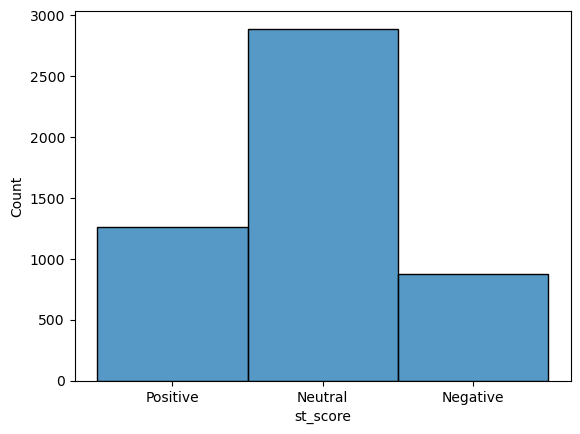

In [197]:
sns.histplot(data = df_sent_comments["st_score"])

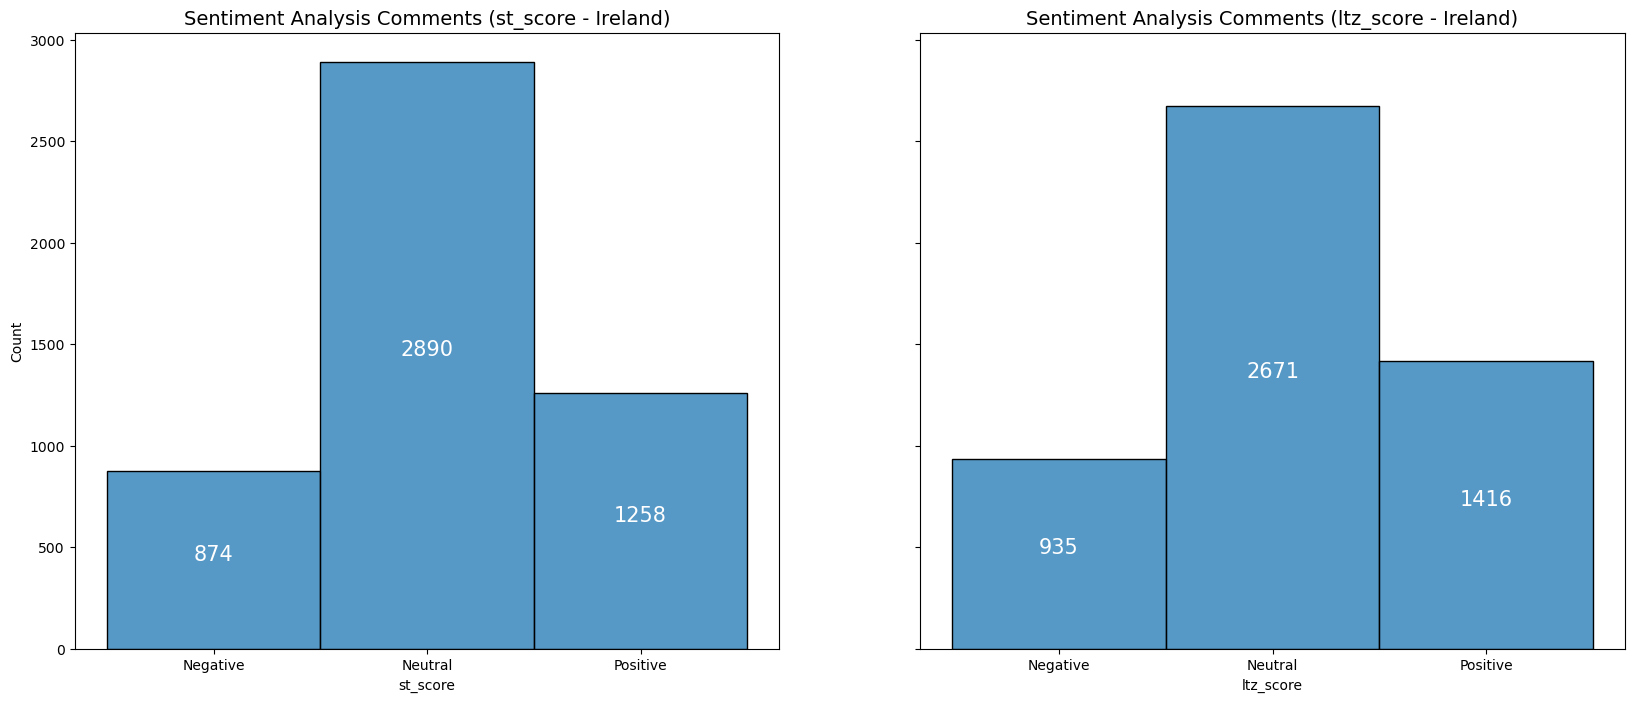

In [198]:
# Create a subplot for each year
fig, axes = plt.subplots(ncols = 2, figsize = (20, 8), sharey = True)

hist_st = sns.histplot(data = df_sent_comments["st_score"].sort_values(), ax = axes[0])

score_group = df_sent_comments.groupby("st_score")["Comments"].count()

for score in range(len(score_group)):
     hist_st.text(score, score_group[score]/2, str(score_group[score]),
     fontdict = dict(color = "white", fontsize = 15),
     horizontalalignment = "center")

hist_ltz = sns.histplot(data = df_sent_comments["ltz_score"].sort_values(), ax = axes[1])

score_groupltz = df_sent_comments.groupby("ltz_score")["Comments"].count()

for score in range(len(score_groupltz)):
     hist_ltz.text(score, score_groupltz[score]/2, str(score_groupltz[score]),
     fontdict = dict(color = "white", fontsize = 15),
     horizontalalignment = "center")

plt.rc('axes', titlesize = 14)
plt.rc('figure', titlesize = 14)
axes[0].set_title('Sentiment Analysis Comments (st_score - Ireland)')
axes[1].set_title('Sentiment Analysis Comments (ltz_score - Ireland)')
plt.show()

In [199]:
df_sent_comments.groupby("st_score")["st_sentiment"].count()

st_score
Negative     874
Neutral     2890
Positive    1258
Name: st_sentiment, dtype: int64

**Sentimental analysis for EU Dataset**

In [200]:
subreddit = reddit.subreddit("germany")

In [201]:
#Extracting the comments and relevant information
for post in subreddit.search("tram"):
    print("******")
    print("Text =", post.selftext)
    
    for comment in list(post.comments):
        
        print("Title =", post.title)
        print("Comment =", comment.body)
        print("Score =", comment.score)
        print("Comment count =", post.num_comments)
        print(dt.fromtimestamp(comment.created_utc))
        print("\n")
        print("------------------------------------------")

******
Text = I was on the tram with some friends tonight, when suddenly this guy yelled at us to shut up and made some racist comments towards my friend. I, being in a generally bad mood, gave him the finger a couple of times. He ignored us for the rest of the ride.

As he was about to get off, he came to me, stuck his head in my face by basically head butting me and starting screaming about "foreigners coming into his country and speaking English", then he threatened "mich zu begraben" multiple times. I was calm and composed the entire time which seemed to really piss him off. At that point the driver interfered, but that was too late as the guy got off.

I feel like an idiot for provoking this dude and potentially risking myself and my friends. I'm a bit worried he may be part of a gang and we may run into each other since I live in a very small city (and also happen to be Jewish). Is it reasonable to go to the police for that? Can I get into trouble for provoking the guy on my part

Title = Celebrating 1700 years of Jewish contribution to German culture - KVB's newest tram.
Comment = /me likes „Schalömchen”. Will use that in RL from now on :-)
Score = 131
Comment count = 131
2020-10-22 21:59:24


------------------------------------------
Title = Celebrating 1700 years of Jewish contribution to German culture - KVB's newest tram.
Comment = [deleted]
Score = 94
Comment count = 131
2020-10-23 00:07:57


------------------------------------------
Title = Celebrating 1700 years of Jewish contribution to German culture - KVB's newest tram.
Comment = **321–2021: 1700 Years of Jewish Life in Germany**

**The Anniversary Year 2021**

The Association 321–2021: 1700 Jahre jüdisches Leben in Deutschland e.V. (321-2021: 1700 Years of Jewish Life in Germany) was founded on April 18th 2018 in the parish hall of the Cologne synagogue with the purpose of remembering the Jewish culture and history in Germany and Europe. We are celebrating 1700 years of Jewish-German life with a ra

Title = Found a purse in an almost empty tram.
Comment = You did exactly the right thing. The driver is supposed to hand it in to the Straßenbahn operators lost&found.
Score = 116
Comment count = 12
2023-11-25 22:19:51


------------------------------------------
Title = Found a purse in an almost empty tram.
Comment = Taking it to thr driver is perfectly fine. The local transport association usually have their own lost and found office, and if not will pass it on to the city lost & found.
Score = 44
Comment count = 12
2023-11-25 22:19:54


------------------------------------------
Title = Found a purse in an almost empty tram.
Comment = Yup. Exactly what you should do. I left my phone on a bus one day, I rang it to see if anyone would pick up, and the driver did. He told me someone had given it to him to be dropped off in the lost and found
Score = 14
Comment count = 12
2023-11-26 01:36:22


------------------------------------------
Title = Found a purse in an almost empty tram.
Com

Title = Question regarding tram stations in Berlin
Comment = As a recurring passenger, you just learn over time what platform "your" tram leaves from.

As an occasional passenger, you can either rely on the labelling of the platforms themselves (there should always be a pretty big sign with all the line numbers and their directions in the form of the final destinations), or look at the path of the respective tram or bus (with is not only shown in Google Maps, but also in most Berlin-specific public transit apps and websites).

As someone who knows their way around Berlin and just doesn't know that particular tram stop, a good first guess is that your tram is going in more or less the same cardinal direction in which your destination (or interchange stop) is.
Score = 5
Comment count = 5
2023-09-18 08:51:16


------------------------------------------
Title = Question regarding tram stations in Berlin
Comment = Yeah, I hate that arrangement, especially with tram stations but also sometim

Title = New Tram in Dresden!
Comment = My nerdy mind read "Ungoro Crater"....yeah...
Score = 7
Comment count = 9
2021-10-07 21:11:41


------------------------------------------
Title = New Tram in Dresden!
Comment = Lol my farther was working on these ones making the circuit diagram.
Score = 6
Comment count = 9
2021-10-07 15:17:52


------------------------------------------
Title = New Tram in Dresden!
Comment = Very nice!
Score = 2
Comment count = 9
2021-10-07 20:21:57


------------------------------------------
Title = New Tram in Dresden!
Comment = I’m excited about these! I heard they have WiFi.
Score = 2
Comment count = 9
2021-10-08 09:23:50


------------------------------------------
******
Text = Hi all,  


I am travelling to Germany soon and have booked the ICE train between Frankfurt and Cologne. Its for me and my partner, but when I look at my tickets on the app/website, I see only 1 barcode. But it shows 2 seats booked. Will this be fine?  


I also paid extra for a Cit

Title = How late do the trams close
Comment = use the dvg Duisburg app and have a look into the schedules
Score = 15
Comment count = 9
2022-07-12 21:40:55


------------------------------------------
Title = How late do the trams close
Comment = It depends on the city/district. Commonly, regular buses and trams run until midnight or so, with night timetables on weekends, or reduced frequency during the night hours in large enough cities. My city for example has one last 1 am bus on weekdays, which gets extended to hourly departures until morning on Friday and Saturday.
Score = 3
Comment count = 9
2022-07-12 22:09:34


------------------------------------------
Title = How late do the trams close
Comment = Last "Nachtexpress" is leaving Duisburg HBF 01:32. Check htttps://www.vrr.de/en/ for schedules
Score = 2
Comment count = 9
2022-07-13 05:41:08


------------------------------------------
Title = How late do the trams close
Comment = There is surely an app for the local tram system, o

Title = One tram ticket for 2 people
Comment = It depends.
Score = 8
Comment count = 9
2022-05-13 12:54:08


------------------------------------------
Title = One tram ticket for 2 people
Comment = It depends on the ticket. There are group tickets you can use with serval people.

There are a lot of regional differences of the available tickets.
Score = 7
Comment count = 9
2022-05-13 12:54:44


------------------------------------------
Title = One tram ticket for 2 people
Comment = If they sell a ticket for two people, then yes. If not, then no.
Score = 7
Comment count = 9
2022-05-13 12:54:54


------------------------------------------
Title = One tram ticket for 2 people
Comment = I do not know any public transit network where *weekly* tickets for two or more people are offered (except cases where an adult ticket includes one or several children for free). I've only seen *day* tickets for couples, families or groups, and *monthly* (or yearly or subscription) tickets that allow bring

Title = Is it (and if yes how can it be) allowed to make so much noise in the middle of the night? They've been cutting metal (tram tracks possibly) the whole night long here in Boxhagener Str. In Berlin. I WANNA SLEEEEP, it's 02:25!! D:
Comment = Only in really rare cases. Like public transportation in a large city....
Score = 489
Comment count = 96
2021-08-05 02:53:32


------------------------------------------
Title = Is it (and if yes how can it be) allowed to make so much noise in the middle of the night? They've been cutting metal (tram tracks possibly) the whole night long here in Boxhagener Str. In Berlin. I WANNA SLEEEEP, it's 02:25!! D:
Comment = Normally this isn't allowed, but if the work is really necessary/urgent and it's either "stop public transport for a day" or "noisily work through one night" there can be offical exceptions.
Score = 351
Comment count = 96
2021-08-05 05:54:17


------------------------------------------
Title = Is it (and if yes how can it be) allowe

Title = Deutschland Ticket comes 2023 for 49 €!
Comment = Living in Hamburg, this ticket will be cheaper than the cheapest monthly ticket option in the HVV, while offering magnitudes more in terms of connections.   


I'm entirely reliant on public transit, not just for work, but for everything else too. Visiting family in Bremen, getting around the city, doctors appointments, you name it. I go there by public transit.

This thing'll change my life.
Score = 309
Comment count = 311
2022-11-03 06:56:44


------------------------------------------
Title = Deutschland Ticket comes 2023 for 49 €!
Comment = Happy that they got around the financing now.

Now I hope it won't turn into too much of a shitshow to convert my existing abonnement with my local Verkehrsverbund as well as keep the subsidy from my employer.
Score = 158
Comment count = 311
2022-11-02 22:10:26


------------------------------------------
Title = Deutschland Ticket comes 2023 for 49 €!
Comment = [deleted]
Score = 270
Comm

Title = what is the best way to pay for services like tram and bus and hotels when on a holiday in Germany?
Comment = I would also check if the city/region has a good transport app that can be used to buy tickets and to plan routes.
Score = 14
Comment count = 18
2022-12-21 13:26:13


------------------------------------------
Title = what is the best way to pay for services like tram and bus and hotels when on a holiday in Germany?
Comment = It varies. Some transport companies have switched to card payment, some still take cash. Most will sell you a ticket that’s good for a few days so you only have to buy once and can take all trans/buses. Where in Germany will you stay?
Score = 6
Comment count = 18
2022-12-21 13:25:48


------------------------------------------
Title = what is the best way to pay for services like tram and bus and hotels when on a holiday in Germany?
Comment = not sure if relevant, but: have a few euros in coins with you. for a toilet, a bakery, etc.
Score = 3
Comme

Title = My favorite tram while I lived in Dresden! That Sparkasse Tram radiates so much positivity!
Comment = I would probably run around smiling insanely as well, if both my scalp and neckline had to be cut to insert  "Blue Code".....
Score = 6
Comment count = 1
2020-01-29 16:16:55


------------------------------------------
******
Text = Well, I have been living in Darmstadt for the past 6 months now and I’ve come to terms that there will always be delays (especially the DB trains). But lately as of now, the buses,trains and trams are getting cancelled left and right, nothing is running as per schedule etc. A bus plying from City Center to university, having 10 min frequency and 10 min travel time got cancelled 3 times in a row for no apparent reason. Trains plying to Frankfurt, Wiesbaden are getting cancelled too. Is it just my city or is this happening everywhere :/
Title = Is it normal for buses, trains and trams to get cancelled during this time of the year or it’s just my city?

Title = How did that happen to Munich?
Comment = This amount of wet snow is really untypical for the area. It was really wet and super heavy snow which puts a heavy strain on trees and electric lines
Score = 20
Comment count = 55
2023-12-08 19:55:05


------------------------------------------
Title = How did that happen to Munich?
Comment = I dont live in Munich so I cannot really give you insights.

However you need to realize this is exceptional and doesnt happen 10 times per year. So basically Munich is poorly prepared for that and the money is into making things work usually. Would you be ready to pay double taxes for a few days per year?

In other countries, when this happens, people just accept it until it comes baxk to normal. In Finland, you dont go to work or school usually, in eastern France too.

And if you have been to a nordic country when it snows, its a mess too for a few days. But then the snow doenst melt and the system works again
Score = 22
Comment count = 55
2023-1

Title = Is inline skating on public transportation (S-bahn/U-bahn/Bus/Tram) a good idea?
Comment = Many public transport operators explicitly forbid inline skating (along with cycling, skateboarding, scooting, and using "classic" skates with a rectangular arrangement of wheels) in their terms of service, not only in the vehicles but also on the platforms or in the station buildings.

While sitting with your skates on is technically not skating, getting from the door to your seat and back is. So the safest option (both physically and legally) is to bring along regular shoes (which you'll probably do anyway, or are you going to wear the skates all day at lectures and seminars?), and switch before entering the vehicle or the station.
Score = 23
Comment count = 9
2021-02-26 05:35:17


------------------------------------------
Title = Is inline skating on public transportation (S-bahn/U-bahn/Bus/Tram) a good idea?
Comment = No, it's a bad idea.

Inline skates aren't allowed on bike lanes, 

Title = Travelling to straßbourg with Deutschland ticket, possible?
Comment = >The thing confusing me is that even though strasbourg is in france, there is still a connection there with DB Trains. So does that mean they are covered also with the deutschland ticket?

No.

>I have heard that one should reach up to kehl. And just buy tram tickets to strasbourg. And same thing going back. Tram ticket to kehl. And then use the deutschland ticket from there.

This is correct.

>We will be in Baden-Württemberg, and we have extra free days, if you could suggest nice places to visit with the Deutschland ticket during this December that would be nice!!

Heidelberg, Black Forrest
Score = 16
Comment count = 9
2023-12-06 07:58:40


------------------------------------------
Title = Travelling to straßbourg with Deutschland ticket, possible?
Comment = Technically you could also buy a ticket for the train from Kehl to Strasbourg (as that section is not covered). But as you already read, the change to

Title = Ausweis checking in DB
Comment = why wouldn't they? a lot of tickets are only valid in combination with id
Score = 30
Comment count = 17
2023-11-11 20:41:22


------------------------------------------
Title = Ausweis checking in DB
Comment = I usually show my ID to my ticket because it’s only valid with one
Score = 5
Comment count = 17
2023-11-11 20:42:34


------------------------------------------
Title = Ausweis checking in DB
Comment = I was in Dresden last month and they are always asking for my ID in Zug. I thought i was being singled out but I saw that they have ID Picture in their Germany ticket. ahhah
Score = 3
Comment count = 17
2023-11-11 23:13:17


------------------------------------------
Title = Ausweis checking in DB
Comment = It has been more than a couple years that either BVG, Berlin S-Bahn, or DB Long-Distance have asked to see my ID or passport although I travel with passes and tickets that are only valid with one. 

Your controllers seem to be more by the

Title = Travel from Stuttgart to Leipzig just by U-Bahn??
Comment = Not possible, there are no tunnels connecting them. 

You need to use above ground trains.
Score = 14
Comment count = 62
2021-02-16 14:18:50


------------------------------------------
Title = Travel from Stuttgart to Leipzig just by U-Bahn??
Comment = I think you mean S bahn? U bahns are only in certain cities. Probably. Just put it into the DB app and check no ICE/CE. It's fairly normal for students to use their semester ticket to get around within their region on only S bahns/REs. Although I'm not sure which student ticket you're talking about which contains both Stuttgart and Leipzig.
Score = 7
Comment count = 62
2021-02-16 14:16:18


------------------------------------------
Title = Travel from Stuttgart to Leipzig just by U-Bahn??
Comment = Uh... not by U-Bahn, no. That's like trying to get from New York to Washington on the New York Subway.

Your student ticket will be just for the city where you are a student

Title = Public transport for a day in Germany
Comment = What's your timeframe? Taking a train to Berlin from your Warnemünde Main Station takes 2 1/2 hours, ignoring the almost assured delay. Then, assuming all goes well, you are at Berlin Main Station and have to reach your sightseeing destinations. So I'm kinda assuming that travel alone will cost you at about 7 hours. 

If you're docking and leaving the same day, I would recommend against this. I don't think it would do Berlin justice to spend an hour or two rushing through the city, and even more importantly, I don't think it would be doing you any justice either.

Edit: I see you will be docked there for 2 days. In this case I would recommend booking a hotel in Berlin, this would be a viable option. You'll not have a lot of time but enough to explore Berlin a bit.

If you decide to go to Berlin anyway, I would recommend two apps: 

DB Navigator

This app lets you book train tickets digitally and plan your itinerary. It's also esse

Title = Where would an item be turned over if found not in the train or tram network?
Comment = https://www.muenchen.de/rathaus/Stadtverwaltung/Kreisverwaltungsreferat/Fundbuero.html
Score = 5
Comment count = 5
2018-03-12 16:23:22


------------------------------------------
Title = Where would an item be turned over if found not in the train or tram network?
Comment = You had a driver's licence and a bank card *in* your phone? How? What?



If you lost a phone and it hasn't been turned in, it's probably gone. If you meant your wallet then there might be a chance someone will mail it to you (though I wouldn't bet on it still having cash in it.)
Score = 4
Comment count = 5
2018-03-12 16:00:37


------------------------------------------
******
Text = Hello.

I'm working in Germany and my wife  will be visiting me for 2-3 weeks. DT is really useful but it is a subscription and cancelling it should be done in advance, so I'll have to pay for this month and the next. 

Are there any good a

Title = Help with getting around a paying for transportation
Comment = Hello. You can buy a ticket for every trip directly from the DB app. You can buy the tram/bus ticket in the DB app as well. You can buy bus tickets from the driver as well but keep in mind that most bus drivers accept cash only so make sure you carry cash with you (preferably small cash like 10€/20€ papers or 1 euro/2 euro coins. As far as I know u can’t purchase tram tickets on site so make sure you buy them on the app (i’m not sure of this info tho as my town doesn’t have a tram). If you’re staying for a long period, I suggest you buy the Deutschlandsticket (it costs 49€) and it will allow you to use any REGIONAL train/bus/tram/metro in germany. Please remember that you can only use the Deutschlandsticket in regional trains like (RE/RB etc) and not in ICE/IC or other trains from other countries, you will need to purchase a separate ticket for that. As for the train for Garmish to Munich you can buy it from any DB 

Title = Questions about Deutschland ticket
Comment = You should note that it's for a calendar month, not a month from the day you purchase it.
Score = 4
Comment count = 11
2024-01-04 17:47:55


------------------------------------------
Title = Questions about Deutschland ticket
Comment = !49
Score = 3
Comment count = 11
2024-01-04 17:42:11


------------------------------------------
Title = Questions about Deutschland ticket
Comment = 1. Yes. You can take the Nahverkehr(!) to Kufstein and back, but that's the last station its valid.
2. Yes. 24/7 for a month.
3. Yes
4. Anything in Nahverkehr: Bus, Ubahn, Straßenbahn, Regiobahn.-> No ICE, EC, IC and anything else thats "Fernverkehr"
5. Be careful its an abo and you have to cancel it.
Score = 2
Comment count = 11
2024-01-04 17:44:14


------------------------------------------
Title = Questions about Deutschland ticket
Comment = 
**Have you read our extensive wiki yet?
[Check our wiki now!](https://www.reddit.com/r/germany/wiki/index)**

Title = I'm so embarrassed
Comment = Eh, don't sweat it. Biking is a learned skill, and most people remember that. That's why they come to help! As for tram tracks, yep, they're awful for that. Make sure the angle at which you cross is steep enough!
Score = 16
Comment count = 32
2021-10-12 11:21:28


------------------------------------------
Title = I'm so embarrassed
Comment = The tram track thing happens to everyone, I managed to ruin a perfectly good road bike that way.
The key is to only cross them in a wide angle (90 degrees of possible).

I take it in your home country cycling is not a big thing?

The thing is, many people here rode bikes since they were little kids so of course they have better control over their bikes.

Maybe try to find some kind of fahrsicherheitstraining near you.
Score = 5
Comment count = 32
2021-10-12 11:53:46


------------------------------------------
Title = I'm so embarrassed
Comment = Everyone in Leipzig falls victim to the tram tracks at some point

Title = Knee OP related question
Comment = Usually it is „ambulant“ so you will have to organise the transport yourself and will go home after a short surveillance period. You will get some crutches and have to climb the stairs yourself. But usually you will need someone who accompanies you for the rest of the day.
Score = 8
Comment count = 23
2023-08-18 13:02:36


------------------------------------------
Title = Knee OP related question
Comment = Thankfully I havent had my knees renovated but I have had reconstruction on other parts of my leg

You will most likely have to organise your own way home. Driving would be bad if only for the massive doses of Ibuprofen affecting your brain. Fun but not recommended for driving; automatic or manual.

Hopefully a physio will have instructed you on how to use your crutches before you leave the hospital. Four steps shouldnt be a problem!
You will have to develop those upper body muscles. Coordination will be difficult for a while. Carrying stuf

Title = My God the smoking is ridiculous
Comment = Let me say: It got dramatically better in the last years, since it's more regulated now (like smoking inside a restaurant is now forbidden).
Score = 55
Comment count = 54
2022-05-20 22:19:08


------------------------------------------
Title = My God the smoking is ridiculous
Comment = Its better than 10 years before...

10 years before it was better than 20 years ago... And so on.
Score = 38
Comment count = 54
2022-05-20 22:20:48


------------------------------------------
Title = My God the smoking is ridiculous
Comment = When I smell cigarettes it reminds me of my trip to Germany
Score = 11
Comment count = 54
2022-05-20 22:10:26


------------------------------------------
Title = My God the smoking is ridiculous
Comment = You're not going to get a logical reasoning for this. Simply put, Germany hasn't put as much effort in stigmatising and taxing smoking as other countries, and the numbers reflect that.

Last I looked the per capi

Title = Travel from Hannover to Hamburg
Comment = Take the Deutsche Bahn with a Bahncard 100
Score = 8
Comment count = 8
2023-03-15 21:19:51


------------------------------------------
Title = Travel from Hannover to Hamburg
Comment = Maybe [this ticket](https://www.bahn.de/angebot/pendler/mehrfahrten-tickets/20-fahrten-ticket) could be interesting for you. It's a bundle of 10 or 20 tickets for a month.
Score = 3
Comment count = 8
2023-03-15 22:40:41


------------------------------------------
******
Text = I'm new in Freiburg and bought a Regiokarte Übertragbar to move in tram. Does anybody knows if I have to validate it in the machines that are in the public transport, as you do with the daily tickets? Thank you!
Title = Do I have to validate the Regiokarte Übertragbar in Freiburg?
Comment = No.

It should say the timeframe for which it is valid on the ticket(i.e. 27. Feb to 27. March), that's enough.
Score = 1
Comment count = 2
2023-02-27 12:37:08


-------------------------------

Title = Upcoming Strike on March 27th: Size and Duration | Advice on Route
Comment = 1. There's basically no public transit on Monday. AFAIK there's no plans for it to be extended but of course you should expect delays and complications as things get put back in working order.
2. You should be able to just put the start and end into [bahn.de](https://bahn.de) (or the DB app) and buy it.
Score = 7
Comment count = 7
2023-03-24 09:58:43


------------------------------------------
Title = Upcoming Strike on March 27th: Size and Duration | Advice on Route
Comment = 1. The magnitude is historic. As in never before was there a coordinated strike between local public transporter (think busses), commuter trains, intercity trains, airports, ships/ferries and even people working with the autobahn (so some tunnels might be shut down). Basically expect no public transport/flights and major traffic jams. The strike Will last 24 hours. So technically it will be over by the 28 th but expect disruptio

Title = Cost of living for single freelancer in Heidelberg?
Comment = Are you talking 3.4k net or gross?

Studio apartments in Neuenheim and Handschusheim can be very competitive. They're still somewhat student affordable and close to INF. Finding a studio for under 450 is unlikely and if you do it'll be flooded with applicants. I would say to budget at least 550-600 so you're out of range for most students. Be aware 1BR apartments will also be flooded with student apps if they're affordable for two people, as long as the landlord is ok with a WG.

Why those Stadtteil in particular? You'll like have a much easier time in Rohrbach.

I think a single ride costs 2.50, but you can use a bike to get around Heidelberg no problem.

Edit: And keep in mind, in Germany 1 room = studio, 2 room = 1BR generally. When you get to larger places sometimes they can count rooms weirdly so you don't actually have as many as it sounds like.
Score = 4
Comment count = 32
2020-11-18 19:20:18


---------------

Title = Refundable ticket
Comment = Can you more precisely describe which kind of ticket you have? There are a few things that may be called a "VBB single ticket" because VBB is the tariff association covering all of Berlin and Brandenburg (with different tickets in cities like Potsdam, Cottbus, Frankfurt/O etc). 

If, for example, you have a Berlin ABC single ticket, the ticket is valid in one direction of travel *for 2 hours* from when it was validated (punched in the validation columns on train/metro platforms or inside the buses and trams), all connections included. If it's not yet validated, there's no rush at all, you can even keep it for another day.
Score = 3
Comment count = 4
2023-03-27 19:20:46


------------------------------------------
******
Text = I live in VRR area and recently got a Job abo ticket (ticket 2000) via Rheinbahn.. 

I've been validating the ticket each time I am getting on the bus. 

I am yet to see a validation (scanning) in bahn and tram.

Is it necessar

Title = Does anyone recognize this 1945 picture as possibly Munich? Or anywhere in Germany? My grandfather was in Bavaria during WWII and took this.
Comment = Could be eppelheim west of Heidelberg, the position of the wasserturm looks similiar to the one here and almost same architecture + the tram track exists today too on that road

However Eppelheim is in Northern Baden Württemberg not Bavaria and I am not sure if the tram between the 2 cities existed at that time or not, but looks familiar
Score = 1
Comment count = 3
2021-12-17 03:02:19


------------------------------------------
******
Text = A guy tried to flirt with my fiance, she rejected and kept moving her way

He didn't leave and forced himself in her way again saying things like "why playing hard to get?" and didn't move till she threatened to call the police, that lasted about 15 minutes

He distanced himself from her after she said that but kept talking sh!t till her tram came

She came home terrified, so I thought of gi

Title = Got fined for riding without a ticket in Koln/Cologne, but information isnt right and how do i pay it since im Dutch/Live in the Netherlands?
Comment = Why ask us and not your German girlfriend?

In any case just wire the money to the IBAN that's provided.
Score = 19
Comment count = 9
2023-03-20 21:00:27


------------------------------------------
Title = Got fined for riding without a ticket in Koln/Cologne, but information isnt right and how do i pay it since im Dutch/Live in the Netherlands?
Comment = There should be some information on the paperwork listing the IBAN of the REVG and the Kassenzeichen / Referenznummer (reference number). 

You should be able to pay from the Netherlands via SEPA money order.
Score = 4
Comment count = 9
2023-03-20 20:59:06


------------------------------------------
Title = Got fined for riding without a ticket in Koln/Cologne, but information isnt right and how do i pay it since im Dutch/Live in the Netherlands?
Comment = Your girlfriend can

Title = My brother has experienced very German thing today. 😀
Comment = Nice. Now he's gotta pull an all-nighter on a train station because the trains he could take are all getting cancelled last minute, and then he could apply for german citizenship.
Score = 304
Comment count = 61
2023-03-01 23:35:52


------------------------------------------
Title = My brother has experienced very German thing today. 😀
Comment = Probably DHL. It is common for them to not even try to deliver, put then in to a Shop and send Notice Cards instead
Score = 58
Comment count = 61
2023-03-01 23:40:51


------------------------------------------
Title = My brother has experienced very German thing today. 😀
Comment = Use
https://www.dhl.de/de/privatkunden/hilfe-kundenservice/beauftragung-zweitzustellung.html

for a second delivery attempt. If it's clear that they are too lazy to deliver (no try) then I would have no qualms making them come again.
Score = 12
Comment count = 61
2023-03-02 08:14:35


-----------

Title = I lost my keys in public transport
Comment = > Is there a chance I could find it?

Reasonable, I'd say. Hopefully it was found either by an honest passenger (who then gave it to the driver), or at the end of the day by a cleaner. If so, then it will eventually get to the Fundbüro.

> I live in a WG with the system where 1 key opens everything

That depends on the system used to make the keys. If it's a modern system, then the only lock that needs to be changed is the one on your apartment door. If it's an older system, that might not be possible and the landlord will want to change all of the locks and charge you for the whole lot. However, I have heard of court cases about this that ruled that this is totally out of proportion to the actual risk -- nobody finding the key is going to try it on every building in the city until they find the one that fits.
Score = 2
Comment count = 2
2023-08-15 18:58:34


------------------------------------------
******
Text = i remember i was o

Title = The annual Christmas tree transportation battle…
Comment = The guy selling trees in my town delivers for free at the end of his shift. So you go to the square where he sells, pick one, he labels it with your address and you get it the same evening dropped at your doorstep.
Score = 106
Comment count = 83
2022-12-01 10:23:11


------------------------------------------
Title = The annual Christmas tree transportation battle…
Comment = Tying it to the roof without having a Dachgepäckträger is risky - if it slips out of the rope and causes a traffic accident behind you, it's not just your inconvenience anymore.

Let it hang out of the back, find a rope and a red flag. You can buy it probably in any Baumarkt, or on Ebay/Amazon.

StVO §22:

4) Nach hinten darf die Ladung bis zu 1,50 m hinausragen, jedoch bei Beförderung über eine Wegstrecke bis zu einer Entfernung von 100 km bis zu 3 m; die außerhalb des Geltungsbereichs dieser Verordnung zurückgelegten Wegstrecken werden nicht berüc

Title = Leipzig
Comment = [deleted]
Score = 29
Comment count = 47
2021-01-06 12:17:20


------------------------------------------
Title = Leipzig
Comment = HYPE-ZIG!
Score = 29
Comment count = 47
2021-01-06 10:01:33


------------------------------------------
Title = Leipzig
Comment = Ey! Just moved to Leipzig. Anyone need an English tandem partner? No? Oh wait, everyone already speaks English. 😭
Score = 11
Comment count = 47
2021-01-06 11:26:14


------------------------------------------
Title = Leipzig
Comment = Wunderschön
Score = 3
Comment count = 47
2021-01-06 11:33:32


------------------------------------------
Title = Leipzig
Comment = Laibsch
Score = 5
Comment count = 47
2021-01-06 10:28:20


------------------------------------------
Title = Leipzig
Comment = Leipzig and then show the tram? Really? XD
Score = 5
Comment count = 47
2021-01-06 09:14:00


------------------------------------------
Title = Leipzig
Comment = r/TIHI

(s/)

I love Leipzig, but this photo only show

Title = The worst city in south-western Germany
Comment = Laughs in "Having survived Göppingen". There is so much worse out there than Mannheim. Göppingen being on top.
Score = 29
Comment count = 51
2022-07-29 12:49:37


------------------------------------------
Title = The worst city in south-western Germany
Comment = > It looks so soviet that I am waiting for Bald&Bankrupt to do a video on Mannheim.

I lol'd at this.
Score = 22
Comment count = 51
2022-07-29 12:48:09


------------------------------------------
Title = The worst city in south-western Germany
Comment = Did you ever cross the river to Ludwigshafen?
Score = 34
Comment count = 51
2022-07-29 12:56:16


------------------------------------------
Title = The worst city in south-western Germany
Comment = It baffles me every time someone hates on Mannheim when Ludwigshafen is right next door. But then again, I live in Heidelberg...

Jokes aside, Mannheim is one of the most industrial, most international and most unusual citie

Title = 9Euro travel and some related questions
Comment = 1. yes

2. you want to go by ICE? Then why not take an ICE that stops in Bamberg? As ICEs are not part of the 9€ ticket you don‘t have to fear about overcrowded trains that much.
Score = 6
Comment count = 8
2022-07-16 15:11:03


------------------------------------------
Title = 9Euro travel and some related questions
Comment = Keep in mind that the train to mittenwald is partly replaced by buses due to an accident some weeks ago.
Score = 1
Comment count = 8
2022-07-16 15:57:54


------------------------------------------
******
Text = As the title says, I figured I just reinstate here how safe Germany generally is after some recent travel experiences:

So, I was in the US for the first time a few weeks ago in Salt Lake City, UT which was quite nice. 
But public transport was another story, taking the tram even in daylight felt off and I was constantly vigilant of my surroundings unlike in DE where I’m usually reading or whateve

Title = Need some help with traffic signs!
Comment = It is for the Tram or Bus :)
Score = 13
Comment count = 6
2021-07-17 22:01:33


------------------------------------------
Title = Need some help with traffic signs!
Comment = All the white signals are for Public Transport. You have to pay attention to the tri-colored traffic signals.
Score = 7
Comment count = 6
2021-07-17 22:03:24


------------------------------------------
Title = Need some help with traffic signs!
Comment = As others said, it's for public transport. 

The horizontal bar means stop for them.

The "A" means that the traffic light system noticed a bus/tram approaching and will try to prioritize it.
Score = 2
Comment count = 6
2021-07-17 22:55:47


------------------------------------------
Title = Need some help with traffic signs!
Comment = These are special traffic lights for busses and „Straßenbahn“. Google for „Ampel für Straßenbahn“ and you find information  about it.
Score = 1
Comment count = 6
2021-07-17 22:0

Title = Drug dealing around Berlin Warschauer Strasse
Comment = There's places like this in pretty much every bigger city. 

It usually goes like this: Hidden drug stash somewhere near. Group of people (it used to be people with temporary / no residence permit) nearby looking out for the stash and police. A few people hanging out / strolling ~5-50m away from the stash and the group that you ask for the stuff / that ask you if you're looking for sth..

The police ofc. knows this and usually is around more or less, but since this is mostly done in more open / bigger areas like parks they don't really get the "bad guys" that often. And even if they do, they don't have the stuff on them (because of the hidden stash nearby).

Soooo yeah. This is basically how it works and why it's still a thing even though it's all done in public.
Score = 8
Comment count = 47
2016-04-07 12:46:52


------------------------------------------
Title = Drug dealing around Berlin Warschauer Strasse
Comment = Just

Title = Lost tramways of Germany — Kiel — This transit diagram shows the situation in 1960. These last 5 lines were closed one after each other, with the last service on line 4 in 1985. The retro vibes are obvious. Did it for fun! Corrections appreciated as I am not from Kiel. Enjoy it!
Comment = I´m from Kiel. Kinda wish we had a tram, just not feeling the bus vibe.
Score = 16
Comment count = 7
2020-11-21 10:09:19


------------------------------------------
Title = Lost tramways of Germany — Kiel — This transit diagram shows the situation in 1960. These last 5 lines were closed one after each other, with the last service on line 4 in 1985. The retro vibes are obvious. Did it for fun! Corrections appreciated as I am not from Kiel. Enjoy it!
Comment = How do you make these? What software? It looks great!
Score = 5
Comment count = 7
2020-11-21 11:55:07


------------------------------------------
Title = Lost tramways of Germany — Kiel — This transit diagram shows the situation in 1960.

Title = Frankfurt is one of the best cities in Germany and Maybe the world, despite the memes and HBF jokes.
Comment = >if you go to one German city you have gone to all

Couldn't be further from the truth ...
Score = 24
Comment count = 21
2022-08-16 19:57:11


------------------------------------------
Title = Frankfurt is one of the best cities in Germany and Maybe the world, despite the memes and HBF jokes.
Comment = As much as I agree that Frankfurt is often unfairly maligned, let me make a few points:

1. Whether you count that as a good thing or not depends on your point of view. Personally, I'm fine with it, but if all cities were like this the world would actually become *less* diverse. It's counter-intuitive, I know, but the same homogenized mix of cultural influences would be bland. There is nothing, for example, about any of the Chinese restaurants in Frankfurt that makes them any different from any of the other Chinese restaurants in Europe and North America. Why bother tra

Title = PLEASE help me find the lost childhood toy of my friend in Munich who is going through a difficult time
Comment = You should definitely ask at the local police station, it's possible that either a patrol car was dispatched together with the ambulance and the officers took any leftover items with them for safekeeping. 
Also a lot people bring lost & found items to the local police station.
Score = 105
Comment count = 51
2022-10-06 10:32:02


------------------------------------------
Title = PLEASE help me find the lost childhood toy of my friend in Munich who is going through a difficult time
Comment = If she lost it during her commute, maybe the [MVG Lost+Found](https://www.mvg.de/services/fahrgastservice/fundbuero.html) could help you?

Or maybe there's a chance that the paramedics from the ambulance that took her in know something?
Score = 96
Comment count = 51
2022-10-06 08:52:47


------------------------------------------
Title = PLEASE help me find the lost childhood toy

Title = Dried instant noodles as a snack.
Comment = They eat instant noodles dry??? I've never seen that.
Score = 10
Comment count = 36
2016-02-18 10:16:58


------------------------------------------
Title = Dried instant noodles as a snack.
Comment = I did this in the USA for lunch in high school.  Partly because I had no access to boiling water to cook them fresh, partly because I liked the taste.

Though my mother lived in fear that someone was going to think she was horrible mother because someone would assume I was being forced to eat such things.  

Edit:  Would say it's a kid thing since I've not done this since high school.   
Score = 3
Comment count = 36
2016-02-18 10:32:09


------------------------------------------
Title = Dried instant noodles as a snack.
Comment = Kids do it in Canada, too, to give you another data point out of nowhere.
Score = 3
Comment count = 36
2016-02-18 12:08:09


------------------------------------------
Title = Dried instant noodles as a snack.


Title = Question about a single-ride ticket in Berlin
Comment = Not certain about Berlin but you need to validate tickets if they're actual physical tickets. It'll print a code with time and location on it and it's pretty obvious if you're going back that way
Score = 10
Comment count = 7
2023-12-28 06:04:12


------------------------------------------
Title = Question about a single-ride ticket in Berlin
Comment = Berlin (more accurately, VBB) paper single tickets need to be validated before travel. The validation prints the time and departure stop/station on the ticket. 

The ticket stops being valid after two hours, that's the easy part. As long as you are moving onwards within those two hours, making changes at intersection stations, it's one journey.

It also stops being valid if you are on a mode of transport that's traveling towards the departure stop. This is a bit more open to interpretation, but they only bother with blatant violations. E.g taking the circular line the long wa

In [202]:
# Install the langid library
!pip install langid

In [203]:
import langid

def is_english(text):
    lang, _ = langid.classify(text)
    return lang == 'en'

In [204]:
# Extracting comments and relevant information
for post in subreddit.search("tram"):
    print("******")
    print("Title =", post.title)
    print("Text =", post.selftext)

    for comment in list(post.comments):
        if is_english(comment.body):
            print("Comment =", comment.body)
            print("Score =", comment.score)
            print("Comment count =", post.num_comments)
            print("Creation time =", dt.fromtimestamp(comment.created_utc))
            print("\n")
            print("------------------------------------------")


******
Title = Harassed by skinhead on the tram, how should I proceed?
Text = I was on the tram with some friends tonight, when suddenly this guy yelled at us to shut up and made some racist comments towards my friend. I, being in a generally bad mood, gave him the finger a couple of times. He ignored us for the rest of the ride.

As he was about to get off, he came to me, stuck his head in my face by basically head butting me and starting screaming about "foreigners coming into his country and speaking English", then he threatened "mich zu begraben" multiple times. I was calm and composed the entire time which seemed to really piss him off. At that point the driver interfered, but that was too late as the guy got off.

I feel like an idiot for provoking this dude and potentially risking myself and my friends. I'm a bit worried he may be part of a gang and we may run into each other since I live in a very small city (and also happen to be Jewish). Is it reasonable to go to the police f

Comment = "his country" lol this shithead doesn't own this place
Score = 5
Comment count = 247
Creation time = 2023-09-20 12:27:33


------------------------------------------
Comment = A nazi threatening a Jewish person? Take it to the police immediately, they will have to help you
Score = 3
Comment count = 247
Creation time = 2023-09-20 09:44:51


------------------------------------------
Comment = > gave him the finger. 

I just wanna write that I admire you for doing this. 

> and also happen to be Jewish. 

Now I **REALLY** admire you. 

> Is it reasonable to go to the police for that?  

You can report it. Make sure you have details, like the bus route and time. I know all buses have cameras, but I am unsure of how long they keep the footage. 

> Can I get into trouble for provoking. 

You didn't provoke anything, he was already kicking off. Trouble? No, maybe a "that was silly, next time do this.....".
Score = 4
Comment count = 247
Creation time = 2023-09-20 04:06:38


--------

Comment = I’m not sure if your trams have cctv on them, but you can report that and him coming into contact with you physically is deemed assault.
Score = 1
Comment count = 247
Creation time = 2023-09-20 10:08:21


------------------------------------------
Comment = You should definitely report it to the police. I’d probably even report it to Sigmount Königsberg as well. He was great when I had trouble getting swastikas removed from my apartment building. 

I won’t say you’re stupid. I’d probably have done the same thing. The problem with having little patience for fools I suppose 🤷🏼‍♂️ 

Anyway, I’m glad you’re both safe and I hope this guy is found and dealt with in some way.
Score = 1
Comment count = 247
Creation time = 2023-09-20 10:37:05


------------------------------------------
Comment = Don't worry too much about retribution, they generally profer death threats twice a day, though he could be aggressive, if you meet him again too soon.
Score = 1
Comment count = 247
Creation 

Comment = /me likes „Schalömchen”. Will use that in RL from now on :-)
Score = 131
Comment count = 131
Creation time = 2020-10-22 21:59:24


------------------------------------------
Comment = [deleted]
Score = 96
Comment count = 131
Creation time = 2020-10-23 00:07:57


------------------------------------------
Comment = **321–2021: 1700 Years of Jewish Life in Germany**

**The Anniversary Year 2021**

The Association 321–2021: 1700 Jahre jüdisches Leben in Deutschland e.V. (321-2021: 1700 Years of Jewish Life in Germany) was founded on April 18th 2018 in the parish hall of the Cologne synagogue with the purpose of remembering the Jewish culture and history in Germany and Europe. We are celebrating 1700 years of Jewish-German life with a range of events and activities throughout 2021. Besides a central reception in Cologne we are planning several cultural events all over Germany as well as publications to support the anniversary.

Through these actions, the Association intends to co

Comment = You did exactly the right thing. The driver is supposed to hand it in to the Straßenbahn operators lost&found.
Score = 115
Comment count = 12
Creation time = 2023-11-25 22:19:51


------------------------------------------
Comment = Taking it to thr driver is perfectly fine. The local transport association usually have their own lost and found office, and if not will pass it on to the city lost & found.
Score = 42
Comment count = 12
Creation time = 2023-11-25 22:19:54


------------------------------------------
Comment = Yup. Exactly what you should do. I left my phone on a bus one day, I rang it to see if anyone would pick up, and the driver did. He told me someone had given it to him to be dropped off in the lost and found
Score = 15
Comment count = 12
Creation time = 2023-11-26 01:36:22


------------------------------------------
Comment = Thank you for being a good person.
Score = 9
Comment count = 12
Creation time = 2023-11-26 07:48:16


-------------------------------

Comment = As a recurring passenger, you just learn over time what platform "your" tram leaves from.

As an occasional passenger, you can either rely on the labelling of the platforms themselves (there should always be a pretty big sign with all the line numbers and their directions in the form of the final destinations), or look at the path of the respective tram or bus (with is not only shown in Google Maps, but also in most Berlin-specific public transit apps and websites).

As someone who knows their way around Berlin and just doesn't know that particular tram stop, a good first guess is that your tram is going in more or less the same cardinal direction in which your destination (or interchange stop) is.
Score = 5
Comment count = 5
Creation time = 2023-09-18 08:51:16


------------------------------------------
Comment = Yeah, I hate that arrangement, especially with tram stations but also sometimes with bigger bus stops. 

I've missed many of my connections that way when I was in 

Comment = Easy, yell back "racist, racist." Racism has a more negative social status then in many other countrys.

Or depending how good you german is, ask him back, who will pay taxes then, to pay for his "hartz4".
Score = 3
Comment count = 427
Creation time = 2023-01-18 09:18:06


------------------------------------------
Comment = I which part of germany did this happen?
Score = 5
Comment count = 427
Creation time = 2023-01-18 07:34:14


------------------------------------------
Comment = As long as it’s verbal, just ignore them and move on. It’s not worth your time to even think about such lowlifes. 
Afaik, prosecution requires witnesses which might be bit hard to get as well. 

For physical confrontations, I go Kickboxing twice a week and always armed with “Animal spray”.

I wouldn’t suggest responding with something as many others suggested. It might lead them to escalate it physical violence. With that If you are physically stronger, you might spend some days in prison and the

Comment = My nerdy mind read "Ungoro Crater"....yeah...
Score = 8
Comment count = 9
Creation time = 2021-10-07 21:11:41


------------------------------------------
Comment = Lol my farther was working on these ones making the circuit diagram.
Score = 8
Comment count = 9
Creation time = 2021-10-07 15:17:52


------------------------------------------
Comment = Very nice!
Score = 2
Comment count = 9
Creation time = 2021-10-07 20:21:57


------------------------------------------
Comment = I’m excited about these! I heard they have WiFi.
Score = 2
Comment count = 9
Creation time = 2021-10-08 09:23:50


------------------------------------------
******
Title = Advice for ICE train travel and trams in Germany
Text = Hi all,  


I am travelling to Germany soon and have booked the ICE train between Frankfurt and Cologne. Its for me and my partner, but when I look at my tickets on the app/website, I see only 1 barcode. But it shows 2 seats booked. Will this be fine?  


I also paid extra for 

Comment = Why is there a 2 day gap between „it’s 4 am“ and „see the doctor at 8 am“? I think something got lost horribly in translation.
Score = 345
Comment count = 390
Creation time = 2023-11-17 07:09:41


------------------------------------------
Comment = Do as your doctor said. Write a complaint to the appropriate department and get a lawyer they might have an idea what to do next. It could be a case of Unterlassene Hilfeleistung or even malpractice. But that only can a lawyer help you with.
Score = 445
Comment count = 390
Creation time = 2023-11-17 06:51:52


------------------------------------------
Comment = There's something you are not telling us..."Wrote me an initial report n told me to see a doc at 8AM."Why didn't you go at 8am as you were told?

Your story tells us that you spent 2 days(?) doing stuff like getting things from the pharmacy and getting the paper from the insurance.

I was not there, so therefore I cannot know, but sometimes docs can be either idiots or the

Comment = Welcome to Germany. Smh.
Score = 1
Comment count = 390
Creation time = 2023-11-17 13:02:56


------------------------------------------
Comment = In 2018 I went to emergency because my eyesight was working rapidly. Like in „I could read this last week from, but not today.“ The „doctor“ was pissed and did not help me.  
A manager, a fucking manager gave me the advice to check my blood sugar level. Yeah, it was through the roof and a few days later I got my diagnosis for diabetes 2.  
Thank you doctor! A manager was more helpfull than you! My symptoms are classically for high blood sugar level, but you are too stupid to realize it.

Luckily for you, you got a new job. Because a few years later I found my papers from the hospital while tidying up and I got into the mood to dress you down. What a pity, because sometimes I enjoy it to be an asshole.
Score = 1
Comment count = 390
Creation time = 2023-11-17 14:31:46


------------------------------------------
Comment = What?! That'

Comment = It depends on the ticket. There are group tickets you can use with serval people.

There are a lot of regional differences of the available tickets.
Score = 6
Comment count = 9
Creation time = 2022-05-13 12:54:44


------------------------------------------
Comment = If they sell a ticket for two people, then yes. If not, then no.
Score = 6
Comment count = 9
Creation time = 2022-05-13 12:54:54


------------------------------------------
Comment = I do not know any public transit network where *weekly* tickets for two or more people are offered (except cases where an adult ticket includes one or several children for free). I've only seen *day* tickets for couples, families or groups, and *monthly* (or yearly or subscription) tickets that allow bringing someone along during certain off-peak times (e.g. after 6pm, in the weekend, and on public holidays).

They *might* exist, but not anywhere where I've ever used a tram, bus, or local train (and that's a lot of places).
Score = 

Comment = Kassel has the Brothers Grimm museum, a very cool destination. Also some pretty good modern art collections.
Score = 5
Comment count = 285
Creation time = 2023-06-11 19:01:28


------------------------------------------
Comment = * Essen for shopping
* Gießen for the Mathematikum
* Lüdenscheid for the Phänomenta and last time I visited the inner city was actually pretty nice
* Paderborn for the Computermuseum
* Hagen and Detmold for their Freilichtmuseum
* Xanten for the Archäologische Park
* Altena for the castle
* Horn-Bad Meinberg for the Externsteine
Score = 9
Comment count = 285
Creation time = 2023-06-11 14:39:22


------------------------------------------
Comment = Bayreuth. It's super cute
Score = 4
Comment count = 285
Creation time = 2023-06-11 14:23:35


------------------------------------------
Comment = Wuerzburg for the wine!
Score = 5
Comment count = 285
Creation time = 2023-06-11 14:39:09


------------------------------------------
Comment = Halle, the pre-h

Comment = [Rothenburg](https://youtu.be/pFSBarhFa4w)
Score = 2
Comment count = 285
Creation time = 2023-06-11 18:28:47


------------------------------------------
Comment = Münster, Wuppertal and Magdeburg are considered big cities in Germany. Every city with >100k is categorized as _Großstadt_.

A smaller city that I would recommend especially to older people looking for relaxation/wellness would be **Bad Staffelstein**.
Score = 2
Comment count = 285
Creation time = 2023-06-11 18:44:39


------------------------------------------
Comment = Augsburg, pretty city, very interesting history from the Roman’s to the middle ages to the arrest of Martin Luther through renaissance and the 2 world wars. Plus everything in between. Original (partially still) walled city with lovely old streets and not at all a tourist magnet so that makes it worth a visit. Lots of green space and rivers and water features as well.
Score = 2
Comment count = 285
Creation time = 2023-06-11 19:01:45


-------------

Comment = Oldenburg, Bamburg, Bayreuth (when the Wagner festival isn’t in season the many, many restaurants aren’t as busy, and are often terrific), Freiburg (im Breisgau). Flensburg is surprisingly pleasant. Those named by others already.
Score = 1
Comment count = 285
Creation time = 2023-06-11 20:59:11


------------------------------------------
Comment = Ballermann
Score = 1
Comment count = 285
Creation time = 2023-06-11 21:02:58


------------------------------------------
Comment = I really enjoyed Bremen for the arts and student culture scene, the trams, and visiting the fascinating U-Boat Bunker Valentin that’s just a little bit outside the city. It’s free and a great way to see an eerie historical WWII site that’s not as emotionally heavy as touring a concentration camp.
Score = 1
Comment count = 285
Creation time = 2023-06-11 21:06:39


------------------------------------------
Comment = If you like shopping, check out the "ElbePark" in Dresden. Very big shopping centre, wor

Comment = they should atleast put up some kind of sound barrier
Score = -3
Comment count = 96
Creation time = 2021-08-05 10:24:53


------------------------------------------
Comment = Welcome to Berlin Dude
Score = 0
Comment count = 96
Creation time = 2021-08-05 15:18:58


------------------------------------------
Comment = [removed]
Score = -10
Comment count = 96
Creation time = 2021-08-05 01:29:53


------------------------------------------
Comment = No not as a regular citizens and if they didnt inform you beforehand just call the police just in case. if they knew about that already then it's complicated.
Score = -5
Comment count = 96
Creation time = 2021-08-05 12:58:25


------------------------------------------
Comment = Call police.
Score = -6
Comment count = 96
Creation time = 2021-08-05 13:38:42


------------------------------------------
Comment = Welcome to Berlin Dude
Score = 1
Comment count = 96
Creation time = 2021-08-05 15:18:36


------------------------------------

Comment = are there any differences to the 9 euro ticket or is it just 40 euro more expensive?
Score = 0
Comment count = 311
Creation time = 2022-11-03 12:50:06


------------------------------------------
Comment = I'm kinda confused why people act like that's something so new and great. The "quer durchs Land Ticket" only costs 42€ and already has existed for a long time. Why would anyone buy the new one for 49€?
Score = 0
Comment count = 311
Creation time = 2022-11-03 13:14:21


------------------------------------------
Comment = A joke of a ticket. When the Catholic Church is more progressive on this issue than the “social democrats” you know politics is messed up
Score = -2
Comment count = 311
Creation time = 2022-11-03 08:53:06


------------------------------------------
Comment = It's still about 40 €too expensive but alright I guess.
Score = -2
Comment count = 311
Creation time = 2022-11-03 10:50:42


------------------------------------------
Comment = Throwing just more mone

Comment = I would also check if the city/region has a good transport app that can be used to buy tickets and to plan routes.
Score = 13
Comment count = 18
Creation time = 2022-12-21 13:26:13


------------------------------------------
Comment = It varies. Some transport companies have switched to card payment, some still take cash. Most will sell you a ticket that’s good for a few days so you only have to buy once and can take all trans/buses. Where in Germany will you stay?
Score = 7
Comment count = 18
Creation time = 2022-12-21 13:25:48


------------------------------------------
Comment = not sure if relevant, but: have a few euros in coins with you. for a toilet, a bakery, etc.
Score = 3
Comment count = 18
Creation time = 2022-12-21 14:02:44


------------------------------------------
Comment = You can use the "DB Navigator" App.

You enter your start and destination and it shows you the ticket price for one direction. 

You can directly buy it via PayPal, credit card and it is 

Comment = If that's considered Culture, you already know what to do.
Score = 3
Comment count = 486
Creation time = 2023-01-30 10:33:08


------------------------------------------
Comment = I’ve only been here for a few months, but have noticed some of this as well. The other day I was at TK maxx and I was next in line, girl just walks from the other side and cuts right in front of me (yeah, she saw me waiting). I didn’t know if I should be mad or impressed at how brazen she was.
Score = 3
Comment count = 486
Creation time = 2023-01-30 10:33:22


------------------------------------------
Comment = As a Canadian I'm dealing with the exact same thing and it's kinda funny to hear others are struggling with it, I have no advice for you but i suppose you get use to it. I still smile and do my best to represent myself in a friendly and cordially way even to the rude ones so keep your head up and your smile on chap.
Score = 3
Comment count = 486
Creation time = 2023-01-30 12:09:14


--------

Comment = I get exactly what you mean.

I moved here years ago because of the order, I am currently moving away because I do not want my child to grow up in an emotionless, mostly rude, rule and peer pressure driven environment…
Score = 4
Comment count = 486
Creation time = 2023-01-30 13:59:32


------------------------------------------
Comment = You overcome it by just getting over it and stopping to care so much. I have a british friend who tells me every time people on the bus barge past or into her in a “gasp guess what happened to me way” and every time I’m like…okay…and? When someone walks into me when I step out of a store, I curse quietly and then I move on and forget about it in half an hour. You gotta do that. People out there are not personally out to get you, theyre just going about their day not caring much about you and that’s not a microagression, that is just local culture.
Score = 3
Comment count = 486
Creation time = 2023-01-30 10:01:49


----------------------------

Comment = https://www.infranken.de/ratgeber/verbraucher/bei-kunden-durchgefallen-coca-cola-nimmt-topo-chico-hard-seltzer-vom-markt-ersatz-soll-aber-kommen-art-5589837

seems they have killed it. pity :(
Score = 1
Comment count = 486
Creation time = 2023-01-30 13:35:48


------------------------------------------
Comment = I’ve experienced the same. It’s not that your politeness is extra, it’s just that rudeness is the default here. 

I’m sorry you’re going through this. If you can find a group of people you vibe with (preferably from the UK), it would good. 

If I were in NRW, I’d be totally happy to meet, but I moved to Berlin.
Score = 1
Comment count = 486
Creation time = 2023-01-30 16:24:49


------------------------------------------
Comment = Munich is better.
Score = 1
Comment count = 486
Creation time = 2023-01-30 16:36:51


------------------------------------------
Comment = Yea, well… Our culture is omegalul
Score = 1
Comment count = 486
Creation time = 2023-01-30 16:52:43




Comment = I would probably run around smiling insanely as well, if both my scalp and neckline had to be cut to insert  "Blue Code".....
Score = 6
Comment count = 1
Creation time = 2020-01-29 16:16:55


------------------------------------------
******
Title = Is it normal for buses, trains and trams to get cancelled during this time of the year or it’s just my city?
Text = Well, I have been living in Darmstadt for the past 6 months now and I’ve come to terms that there will always be delays (especially the DB trains). But lately as of now, the buses,trains and trams are getting cancelled left and right, nothing is running as per schedule etc. A bus plying from City Center to university, having 10 min frequency and 10 min travel time got cancelled 3 times in a row for no apparent reason. Trains plying to Frankfurt, Wiesbaden are getting cancelled too. Is it just my city or is this happening everywhere :/
Comment = Currently that's pretty normal.
Lots of the drivers are sick, so many rid

Comment = This amount of wet snow is really untypical for the area. It was really wet and super heavy snow which puts a heavy strain on trees and electric lines
Score = 22
Comment count = 55
Creation time = 2023-12-08 19:55:05


------------------------------------------
Comment = I dont live in Munich so I cannot really give you insights.

However you need to realize this is exceptional and doesnt happen 10 times per year. So basically Munich is poorly prepared for that and the money is into making things work usually. Would you be ready to pay double taxes for a few days per year?

In other countries, when this happens, people just accept it until it comes baxk to normal. In Finland, you dont go to work or school usually, in eastern France too.

And if you have been to a nordic country when it snows, its a mess too for a few days. But then the snow doenst melt and the system works again
Score = 22
Comment count = 55
Creation time = 2023-12-08 19:55:02


------------------------------

Comment = Many public transport operators explicitly forbid inline skating (along with cycling, skateboarding, scooting, and using "classic" skates with a rectangular arrangement of wheels) in their terms of service, not only in the vehicles but also on the platforms or in the station buildings.

While sitting with your skates on is technically not skating, getting from the door to your seat and back is. So the safest option (both physically and legally) is to bring along regular shoes (which you'll probably do anyway, or are you going to wear the skates all day at lectures and seminars?), and switch before entering the vehicle or the station.
Score = 23
Comment count = 9
Creation time = 2021-02-26 05:35:17


------------------------------------------
Comment = No, it's a bad idea.

Inline skates aren't allowed on bike lanes, and need to be mindful of pedestrians on sidewalks. Furthermore they are also not allowed on public transport in shops and most other places. Those regulations ar

Comment = >The thing confusing me is that even though strasbourg is in france, there is still a connection there with DB Trains. So does that mean they are covered also with the deutschland ticket?

No.

>I have heard that one should reach up to kehl. And just buy tram tickets to strasbourg. And same thing going back. Tram ticket to kehl. And then use the deutschland ticket from there.

This is correct.

>We will be in Baden-Württemberg, and we have extra free days, if you could suggest nice places to visit with the Deutschland ticket during this December that would be nice!!

Heidelberg, Black Forrest
Score = 15
Comment count = 9
Creation time = 2023-12-06 07:58:40


------------------------------------------
Comment = Technically you could also buy a ticket for the train from Kehl to Strasbourg (as that section is not covered). But as you already read, the change to the tram (it stops in front of the station in Kehl, ticket automat should be on the platform) will be cheaper. If you g

Comment = why wouldn't they? a lot of tickets are only valid in combination with id
Score = 30
Comment count = 17
Creation time = 2023-11-11 20:41:22


------------------------------------------
Comment = I usually show my ID to my ticket because it’s only valid with one
Score = 5
Comment count = 17
Creation time = 2023-11-11 20:42:34


------------------------------------------
Comment = I was in Dresden last month and they are always asking for my ID in Zug. I thought i was being singled out but I saw that they have ID Picture in their Germany ticket. ahhah
Score = 3
Comment count = 17
Creation time = 2023-11-11 23:13:17


------------------------------------------
Comment = It has been more than a couple years that either BVG, Berlin S-Bahn, or DB Long-Distance have asked to see my ID or passport although I travel with passes and tickets that are only valid with one. 

Your controllers seem to be more by the book than the ones I come across.
Score = 2
Comment count = 17
Creation tim

Comment = They are designed to waste german taxes.
Score = 2
Comment count = 230
Creation time = 2023-12-19 21:43:30


------------------------------------------
Comment = Spiderman.
Score = 1
Comment count = 230
Creation time = 2023-12-19 10:21:34


------------------------------------------
Comment = For a more expensive and less effective version of good transport trains
Score = 1
Comment count = 230
Creation time = 2023-12-19 11:29:43


------------------------------------------
Comment = 
**Have you read our extensive wiki yet?
[Check our wiki now!](https://www.reddit.com/r/germany/wiki/index)**

While Reddit administrators do not believe this subreddit is NSFW and do not enable the appropriate setting, do note that participants in this subreddit may possibly encounter discussions of the following subjects, all of which are considered "mature" by Reddit administrators:

* Alcohol and tobacco
* Amateur advice
* Drug use
* Gambling
* Guns and weapons
* Military conflict and terroris

Comment = Wait until the germans discover trains…
Score = 1
Comment count = 230
Creation time = 2023-12-19 21:41:43


------------------------------------------
Comment = A1?
Score = 1
Comment count = 230
Creation time = 2023-12-19 22:14:18


------------------------------------------
Comment = Lol I see those everyday
Score = 1
Comment count = 230
Creation time = 2023-12-19 23:06:34


------------------------------------------
Comment = A5 between Darmstadt and Frankfurt Airport?
Score = 1
Comment count = 230
Creation time = 2023-12-20 05:01:53


------------------------------------------
Comment = Did anybody actually see a truck charging there while driving? I'm driving there frequently, but was never able to see any truck using it...
Score = 1
Comment count = 230
Creation time = 2023-12-20 09:59:48


------------------------------------------
Comment = Was a project for Electric trucks between Hamburg and Lübeck, Germany
Score = 1
Comment count = 230
Creation time = 2023-12-20 23:1

Comment = Wow...German white trash.  Okay, good to know it exists.
Score = 4
Comment count = 11
Creation time = 2022-10-24 05:57:44


------------------------------------------
Comment = [deleted]
Score = 7
Comment count = 11
Creation time = 2022-10-23 23:07:04


------------------------------------------
Comment = You can contact your local police. They will ask a few questions but very likely contact the tram company and go from there.
Score = 9
Comment count = 11
Creation time = 2022-10-23 21:55:58


------------------------------------------
Comment = Report to the police. If they can find the attacker the victims has a way better chance if she has wittnesses. Also next time you could call the police in such a situation. Also ask people around you to help you protect the victim if you feel safe enough to do so. By law you are required to help if someone is in danger or needs help. You are not required to endanger yourself though. It is often recommended to ask the victim if they ne

Comment = You had a driver's licence and a bank card *in* your phone? How? What?



If you lost a phone and it hasn't been turned in, it's probably gone. If you meant your wallet then there might be a chance someone will mail it to you (though I wouldn't bet on it still having cash in it.)
Score = 6
Comment count = 5
Creation time = 2018-03-12 16:00:37


------------------------------------------
******
Title = Any good alternatives to Deutschland Ticket?
Text = Hello.

I'm working in Germany and my wife  will be visiting me for 2-3 weeks. DT is really useful but it is a subscription and cancelling it should be done in advance, so I'll have to pay for this month and the next. 

Are there any good alternatives that are time limited but cheaper than buying all the tickets separately (bus, tram, sbahn, local trains)? 

BTW, We are in Hessen. 

Thanks
Comment = Check out mo.pla, they offer a much shorter cancellation period (second last day of the month if I am right) for the D-Ticket (DB 

Comment = Hello. You can buy a ticket for every trip directly from the DB app. You can buy the tram/bus ticket in the DB app as well. You can buy bus tickets from the driver as well but keep in mind that most bus drivers accept cash only so make sure you carry cash with you (preferably small cash like 10€/20€ papers or 1 euro/2 euro coins. As far as I know u can’t purchase tram tickets on site so make sure you buy them on the app (i’m not sure of this info tho as my town doesn’t have a tram). If you’re staying for a long period, I suggest you buy the Deutschlandsticket (it costs 49€) and it will allow you to use any REGIONAL train/bus/tram/metro in germany. Please remember that you can only use the Deutschlandsticket in regional trains like (RE/RB etc) and not in ICE/IC or other trains from other countries, you will need to purchase a separate ticket for that. As for the train for Garmish to Munich you can buy it from any DB operator in the main station, there are machines where you ca

Comment = You should note that it's for a calendar month, not a month from the day you purchase it.
Score = 5
Comment count = 11
Creation time = 2024-01-04 17:47:55


------------------------------------------
Comment = !49
Score = 3
Comment count = 11
Creation time = 2024-01-04 17:42:11


------------------------------------------
Comment = 1. Yes. You can take the Nahverkehr(!) to Kufstein and back, but that's the last station its valid.
2. Yes. 24/7 for a month.
3. Yes
4. Anything in Nahverkehr: Bus, Ubahn, Straßenbahn, Regiobahn.-> No ICE, EC, IC and anything else thats "Fernverkehr"
5. Be careful its an abo and you have to cancel it.
Score = 2
Comment count = 11
Creation time = 2024-01-04 17:44:14


------------------------------------------
Comment = 
**Have you read our extensive wiki yet?
[Check our wiki now!](https://www.reddit.com/r/germany/wiki/index)**

While Reddit administrators do not believe this subreddit is NSFW and do not enable the appropriate setting, do note that 

Comment = Eh, don't sweat it. Biking is a learned skill, and most people remember that. That's why they come to help! As for tram tracks, yep, they're awful for that. Make sure the angle at which you cross is steep enough!
Score = 16
Comment count = 32
Creation time = 2021-10-12 11:21:28


------------------------------------------
Comment = The tram track thing happens to everyone, I managed to ruin a perfectly good road bike that way.
The key is to only cross them in a wide angle (90 degrees of possible).

I take it in your home country cycling is not a big thing?

The thing is, many people here rode bikes since they were little kids so of course they have better control over their bikes.

Maybe try to find some kind of fahrsicherheitstraining near you.
Score = 6
Comment count = 32
Creation time = 2021-10-12 11:53:46


------------------------------------------
Comment = Everyone in Leipzig falls victim to the tram tracks at some point. You'll learn to avoid taking routes that have t

Comment = Usually it is „ambulant“ so you will have to organise the transport yourself and will go home after a short surveillance period. You will get some crutches and have to climb the stairs yourself. But usually you will need someone who accompanies you for the rest of the day.
Score = 8
Comment count = 23
Creation time = 2023-08-18 13:02:36


------------------------------------------
Comment = Thankfully I havent had my knees renovated but I have had reconstruction on other parts of my leg

You will most likely have to organise your own way home. Driving would be bad if only for the massive doses of Ibuprofen affecting your brain. Fun but not recommended for driving; automatic or manual.

Hopefully a physio will have instructed you on how to use your crutches before you leave the hospital. Four steps shouldnt be a problem!
You will have to develop those upper body muscles. Coordination will be difficult for a while. Carrying stuff, opening doors, sitting down, standing up with c

Comment = Let me say: It got dramatically better in the last years, since it's more regulated now (like smoking inside a restaurant is now forbidden).
Score = 56
Comment count = 54
Creation time = 2022-05-20 22:19:08


------------------------------------------
Comment = Its better than 10 years before...

10 years before it was better than 20 years ago... And so on.
Score = 33
Comment count = 54
Creation time = 2022-05-20 22:20:48


------------------------------------------
Comment = When I smell cigarettes it reminds me of my trip to Germany
Score = 13
Comment count = 54
Creation time = 2022-05-20 22:10:26


------------------------------------------
Comment = You're not going to get a logical reasoning for this. Simply put, Germany hasn't put as much effort in stigmatising and taxing smoking as other countries, and the numbers reflect that.

Last I looked the per capita smoking rate for Germany is double that for Australia (my home country) and similar to the US. In Australia a pac

Comment = Take the Deutsche Bahn with a Bahncard 100
Score = 7
Comment count = 8
Creation time = 2023-03-15 21:19:51


------------------------------------------
Comment = Maybe [this ticket](https://www.bahn.de/angebot/pendler/mehrfahrten-tickets/20-fahrten-ticket) could be interesting for you. It's a bundle of 10 or 20 tickets for a month.
Score = 3
Comment count = 8
Creation time = 2023-03-15 22:40:41


------------------------------------------
******
Title = Do I have to validate the Regiokarte Übertragbar in Freiburg?
Text = I'm new in Freiburg and bought a Regiokarte Übertragbar to move in tram. Does anybody knows if I have to validate it in the machines that are in the public transport, as you do with the daily tickets? Thank you!
Comment = No.

It should say the timeframe for which it is valid on the ticket(i.e. 27. Feb to 27. March), that's enough.
Score = 1
Comment count = 2
Creation time = 2023-02-27 12:37:08


------------------------------------------
Comment = Rule of th

Comment = I see Hannover Hbf! I upvote!😊
Score = 217
Comment count = 109
Creation time = 2020-08-31 20:26:04


------------------------------------------
Comment = Meanwhile in NRW, I'm still waiting for the 'Tach' train...
Score = 70
Comment count = 109
Creation time = 2020-08-31 21:44:53


------------------------------------------
Comment = You're standing too close to the edge!
Score = 69
Comment count = 109
Creation time = 2020-08-31 20:07:59


------------------------------------------
Comment = [deleted]
Score = 27
Comment count = 109
Creation time = 2020-08-31 21:57:33


------------------------------------------
Comment = [North German stations be like](http://compidoc.net/wp-content/uploads/2017/08/20161023-DSC_4089-1800x1202.jpg)
Score = 61
Comment count = 109
Creation time = 2020-08-31 21:28:00


------------------------------------------
Comment = As we real northern germans use to say: "everything south of river Elbe is bavaria".
Moin
Score = 31
Comment count = 109
Creati

Comment = Are you talking 3.4k net or gross?

Studio apartments in Neuenheim and Handschusheim can be very competitive. They're still somewhat student affordable and close to INF. Finding a studio for under 450 is unlikely and if you do it'll be flooded with applicants. I would say to budget at least 550-600 so you're out of range for most students. Be aware 1BR apartments will also be flooded with student apps if they're affordable for two people, as long as the landlord is ok with a WG.

Why those Stadtteil in particular? You'll like have a much easier time in Rohrbach.

I think a single ride costs 2.50, but you can use a bike to get around Heidelberg no problem.

Edit: And keep in mind, in Germany 1 room = studio, 2 room = 1BR generally. When you get to larger places sometimes they can count rooms weirdly so you don't actually have as many as it sounds like.
Score = 6
Comment count = 32
Creation time = 2020-11-18 19:20:18


------------------------------------------
Comment = bigges

Comment = Can you more precisely describe which kind of ticket you have? There are a few things that may be called a "VBB single ticket" because VBB is the tariff association covering all of Berlin and Brandenburg (with different tickets in cities like Potsdam, Cottbus, Frankfurt/O etc). 

If, for example, you have a Berlin ABC single ticket, the ticket is valid in one direction of travel *for 2 hours* from when it was validated (punched in the validation columns on train/metro platforms or inside the buses and trams), all connections included. If it's not yet validated, there's no rush at all, you can even keep it for another day.
Score = 3
Comment count = 4
Creation time = 2023-03-27 19:20:46


------------------------------------------
******
Title = Abo ticket validation
Text = I live in VRR area and recently got a Job abo ticket (ticket 2000) via Rheinbahn.. 

I've been validating the ticket each time I am getting on the bus. 

I am yet to see a validation (scanning) in bahn and t

Comment = Could be eppelheim west of Heidelberg, the position of the wasserturm looks similiar to the one here and almost same architecture + the tram track exists today too on that road

However Eppelheim is in Northern Baden Württemberg not Bavaria and I am not sure if the tram between the 2 cities existed at that time or not, but looks familiar
Score = 1
Comment count = 3
Creation time = 2021-12-17 03:02:19


------------------------------------------
******
Title = Legal self defense tools/weapons in Germany?
Text = A guy tried to flirt with my fiance, she rejected and kept moving her way

He didn't leave and forced himself in her way again saying things like "why playing hard to get?" and didn't move till she threatened to call the police, that lasted about 15 minutes

He distanced himself from her after she said that but kept talking sh!t till her tram came

She came home terrified, so I thought of giving her a legal self defense tool or weapon (something like a pepper spray) in 

Comment = Why ask us and not your German girlfriend?

In any case just wire the money to the IBAN that's provided.
Score = 18
Comment count = 9
Creation time = 2023-03-20 21:00:27


------------------------------------------
Comment = There should be some information on the paperwork listing the IBAN of the REVG and the Kassenzeichen / Referenznummer (reference number). 

You should be able to pay from the Netherlands via SEPA money order.
Score = 5
Comment count = 9
Creation time = 2023-03-20 20:59:06


------------------------------------------
Comment = Your girlfriend can pay on your behalf and simply put the number on your fine in the corresponding field.

Just make sure she does it in two separate transfers.

Then you figure out a way to refund her.
Score = 3
Comment count = 9
Creation time = 2023-03-21 02:28:52


------------------------------------------
Comment = Fine story for /r/WinStupidPrizes
Score = -14
Comment count = 9
Creation time = 2023-03-20 21:41:06


-------------

Comment = Nice. Now he's gotta pull an all-nighter on a train station because the trains he could take are all getting cancelled last minute, and then he could apply for german citizenship.
Score = 302
Comment count = 61
Creation time = 2023-03-01 23:35:52


------------------------------------------
Comment = Probably DHL. It is common for them to not even try to deliver, put then in to a Shop and send Notice Cards instead
Score = 59
Comment count = 61
Creation time = 2023-03-01 23:40:51


------------------------------------------
Comment = Use
https://www.dhl.de/de/privatkunden/hilfe-kundenservice/beauftragung-zweitzustellung.html

for a second delivery attempt. If it's clear that they are too lazy to deliver (no try) then I would have no qualms making them come again.
Score = 11
Comment count = 61
Creation time = 2023-03-02 08:14:35


------------------------------------------
Comment = It's not just in Germany this happens. It's been a standard in stand-up comedy routines in Brita

Comment = > Is there a chance I could find it?

Reasonable, I'd say. Hopefully it was found either by an honest passenger (who then gave it to the driver), or at the end of the day by a cleaner. If so, then it will eventually get to the Fundbüro.

> I live in a WG with the system where 1 key opens everything

That depends on the system used to make the keys. If it's a modern system, then the only lock that needs to be changed is the one on your apartment door. If it's an older system, that might not be possible and the landlord will want to change all of the locks and charge you for the whole lot. However, I have heard of court cases about this that ruled that this is totally out of proportion to the actual risk -- nobody finding the key is going to try it on every building in the city until they find the one that fits.
Score = 2
Comment count = 2
Creation time = 2023-08-15 18:58:34


------------------------------------------
******
Title = why when there is a small car accidents in g

Comment = Ludwigshafen has the image of being very ugly, industrial and not much going on.

Mannheim is a good mid-sized city that occasionally smells of burnt chocolate because of a factory there. From the times I visited, I'd say it has a similar vibe as Mainz. Wouldn't mind living there.
Score = 1
Comment count = 48
Creation time = 2023-11-30 11:03:33


------------------------------------------
Comment = I study in Mannheim and I would say Mannheim is fine. It’s not the most beautiful city, but it’s fine.

Ludwigshafen is a really sad city. It’s kinda interesting tho, because some parts look so sad it’s actually somewhat cinematic.
Score = 1
Comment count = 48
Creation time = 2023-11-30 22:55:13


------------------------------------------
Comment = Mannheim is amazing! Great shopping district, fantastic food options, the people are nice, including the store staff, and from the main train station you can get to the Frankfurt airport in 30mins, or Amsterdam in 5 hours. Mannheim is a

Comment = Same as I did in America. In the bed of the pickup.
Score = 0
Comment count = 83
Creation time = 2022-12-01 18:07:18


------------------------------------------
Comment = I‘d tie in to the roof but make sure to put a blanket or tarp under it. Sap is hard to get off and terrible for paint
Score = 0
Comment count = 83
Creation time = 2022-12-01 21:50:42


------------------------------------------
Comment = I know for certain, that, when I was younger (10-15 years ago) there was at least one occasion where we did transport a tree in exactly the way you are imagine, including a section on the Autobahn. And my father is somebody who generally takes rules very seriously. Also you frequently see people carrying bikes or skiis on their roof. Our car did have that two griplines at its roof through.

Just make sure to fixate it properly.
Score = -1
Comment count = 83
Creation time = 2022-12-01 12:20:21


------------------------------------------
Comment = securing to the roof should

Comment = Thank you from a native of München. Sadly, the  house on the right doesn't exist anymore.
Score = 84
Comment count = 50
Creation time = 2019-10-24 05:27:26


------------------------------------------
Comment = what the same spot looks like today: https://images.trvl-media.com/media/content/shared/images/travelguides/destination/179896/Marienplatz-55954.jpg
Score = 61
Comment count = 50
Creation time = 2019-10-24 06:16:30


------------------------------------------
Comment = Please share more, didnt know a Tram drove through there... awesome picture!
Score = 16
Comment count = 50
Creation time = 2019-10-24 06:32:29


------------------------------------------
Comment = [deleted]
Score = 38
Comment count = 50
Creation time = 2019-10-24 06:27:10


------------------------------------------
Comment = Love this city. It’s an incredible photo. Thanks for the share
Score = 9
Comment count = 50
Creation time = 2019-10-24 06:27:22


------------------------------------------
Comment

Comment = I've not been in Mannheim for close to twenty years, and while reading your first paragraph I immediately recalled that godawful smell.
Score = 1
Comment count = 51
Creation time = 2022-08-28 19:51:37


------------------------------------------
Comment = I completely agree. It's the worst place I've ever encountered and I'm counting days for my erasmus exchange to be over. The place is absolutely disgusting! There's shit and trash everywhere on the peavement I have to look down each time I walk not to step on dog shit because the owners do not care to clean up. It. smells so so bad like shit and piss. The street lights are barely existent so it feels very unsafe. From my place the public commute to university is not good so I have to walk. There is basically nothing to look at so it feels super depressing because you are surrounded by ugly buildings. The level of English here is also bad with people even in the pharmacy struggling with basic English. The only good thing abou

Comment = It is for the Tram or Bus :)
Score = 13
Comment count = 6
Creation time = 2021-07-17 22:01:33


------------------------------------------
Comment = All the white signals are for Public Transport. You have to pay attention to the tri-colored traffic signals.
Score = 6
Comment count = 6
Creation time = 2021-07-17 22:03:24


------------------------------------------
Comment = As others said, it's for public transport. 

The horizontal bar means stop for them.

The "A" means that the traffic light system noticed a bus/tram approaching and will try to prioritize it.
Score = 2
Comment count = 6
Creation time = 2021-07-17 22:55:47


------------------------------------------
******
Title = Sperrmüll not picked up
Text = Hi all, could use some advice. Today we had a morning appointment for Sperrmüll pickup, which is good timing since we move out of this apartment (and to another city) next week. Our stuff was put out last night, and today the city failed to pick it up, which puts u

Comment = Thanks for sharing this
Score = 43
Comment count = 13
Creation time = 2022-09-10 11:58:38


------------------------------------------
Comment = Good people need to be recognized and honoured the way they deserve, I hope that good deeds and favors will produce more good deeds and favors in return. Nice story
Score = 26
Comment count = 13
Creation time = 2022-09-10 16:08:24


------------------------------------------
Comment = Random german can be very wholesome
Score = 9
Comment count = 13
Creation time = 2022-09-10 20:59:48


------------------------------------------
Comment = Pretty to hear something like this.
Score = 8
Comment count = 13
Creation time = 2022-09-10 17:41:25


------------------------------------------
Comment = I was almost on a train that stopped short of Köln, but we made it there; but the connection was late by an hour. I made it through without any anxiety or frustration due to the kindness and company of a fellow traveler named Celeste. I am glad yo

Comment = >if you go to one German city you have gone to all

Couldn't be further from the truth ...
Score = 24
Comment count = 21
Creation time = 2022-08-16 19:57:11


------------------------------------------
Comment = As much as I agree that Frankfurt is often unfairly maligned, let me make a few points:

1. Whether you count that as a good thing or not depends on your point of view. Personally, I'm fine with it, but if all cities were like this the world would actually become *less* diverse. It's counter-intuitive, I know, but the same homogenized mix of cultural influences would be bland. There is nothing, for example, about any of the Chinese restaurants in Frankfurt that makes them any different from any of the other Chinese restaurants in Europe and North America. Why bother travelling at all if every city looks the same?
2. One of the things we are now discovering to our cost is that you can't build any kind of nation on middle-class academics. We don't need more bankers poin

Comment = They eat instant noodles dry??? I've never seen that.
Score = 10
Comment count = 36
Creation time = 2016-02-18 10:16:58


------------------------------------------
Comment = I did this in the USA for lunch in high school.  Partly because I had no access to boiling water to cook them fresh, partly because I liked the taste.

Though my mother lived in fear that someone was going to think she was horrible mother because someone would assume I was being forced to eat such things.  

Edit:  Would say it's a kid thing since I've not done this since high school.   
Score = 4
Comment count = 36
Creation time = 2016-02-18 10:32:09


------------------------------------------
Comment = Kids do it in Canada, too, to give you another data point out of nowhere.
Score = 4
Comment count = 36
Creation time = 2016-02-18 12:08:09


------------------------------------------
Comment = It's kind of common, especially around low income kids, but don't ask me why. You just crush the noodles, add 

Comment = Not certain about Berlin but you need to validate tickets if they're actual physical tickets. It'll print a code with time and location on it and it's pretty obvious if you're going back that way
Score = 11
Comment count = 7
Creation time = 2023-12-28 06:04:12


------------------------------------------
Comment = Berlin (more accurately, VBB) paper single tickets need to be validated before travel. The validation prints the time and departure stop/station on the ticket. 

The ticket stops being valid after two hours, that's the easy part. As long as you are moving onwards within those two hours, making changes at intersection stations, it's one journey.

It also stops being valid if you are on a mode of transport that's traveling towards the departure stop. This is a bit more open to interpretation, but they only bother with blatant violations. E.g taking the circular line the long way instead of the short one.
Score = 8
Comment count = 7
Creation time = 2023-12-28 07:24:25


In [205]:
#Creating dataframe with the information extracted
postTitles = []
postComments = []

for post in subreddit.search("tram"):
    postTitles.append(post.title)
    
    if post.selftext != "":
          postTitles.append(post.selftext)
            
    for comment in list(post.comments):
        postComments.append(comment.body)
        
        if comment.body != "" and comment.body != "[deleted]":
             postComments.append(post.selftext)
    

In [206]:
df_sent_titles_eu = pd.DataFrame({
    "Post_title": postTitles,
})

In [207]:
df_sent_comments_eu = pd.DataFrame({
    "Comments": postComments,
})

**Sentimental analysis titles - EU**

In [208]:
#Converting all text into lower case
df_sent_titles_eu["Post_title"]  = df_sent_titles_eu["Post_title"].apply(lambda x : " ".join(x.lower() for x in x.split()))

#Taking away any character present
df_sent_titles_eu["Post_title"]  = df_sent_titles_eu["Post_title"].str.replace("[^\w\s]", "")

#Taking away stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
df_sent_titles_eu["Post_title"]  = df_sent_titles_eu["Post_title"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

#Tokenizing words
#df_sent["clean_comment"]  = df_sent["Post_title"].apply(lambda x : " ".join(nltk.word_tokenize(x).split()))

df_sent_titles_eu.head()

Post_title
0                     harassed skinhead tram proceed
1  tram friends tonight suddenly guy yelled us sh...
2  celebrating 1700 years jewish contribution ger...
3                                       tram hamburg
4  ive big cities germany berlinmunichetc realize...

In [209]:
#Textblob
from textblob import TextBlob
df_sent_titles_eu["Post_title"].apply(lambda x: str(TextBlob(x).correct()))

#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_titles_eu["st"] = df_sent_titles_eu["Post_title"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_titles_eu["ltz"] = df_sent_titles_eu["Post_title"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_titles_eu.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ledag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Post_title  \
0                     harassed skinhead tram proceed   
1  tram friends tonight suddenly guy yelled us sh...   
2  celebrating 1700 years jewish contribution ger...   
3                                       tram hamburg   
4  ive big cities germany berlinmunichetc realize...   

                                                  st  \
0                       harass skinhead tram proceed   
1  tram friend tonight suddenli guy yell us shut ...   
2  celebr 1700 year jewish contribut german cultu...   
3                                       tram hamburg   
4  ive big citi germani berlinmunichetc realiz ha...   

                                                 ltz  
0                     harassed skinhead tram proceed  
1  tram friend tonight suddenly guy yelled u shut...  
2  celebrating 1700 year jewish contribution germ...  
3                                       tram hamburg  
4  ive big city germany berlinmunichetc realized ...

In [210]:
freq = pd.Series(' '.join(df_sent_titles_eu["Post_title"]).split()).value_counts()[:15]
freq

tram       95
ticket     78
germany    57
im         56
get        53
like       47
city       46
train      37
need       36
time       35
people     35
german     33
got        32
would      30
one        29
dtype: int64

In [211]:
TextBlob(df_sent_titles_eu["Post_title"][0]).ngrams(2)

[WordList(['harassed', 'skinhead']),
 WordList(['skinhead', 'tram']),
 WordList(['tram', 'proceed'])]

In [212]:
sentiment_analysis(df_sent_titles_eu,"st","st_sentiment","st_score")
sentiment_analysis(df_sent_titles_eu,"ltz","ltz_sentiment","ltz_score")
df_sent_titles_eu

Post_title  \
0                       harassed skinhead tram proceed   
1    tram friends tonight suddenly guy yelled us sh...   
2    celebrating 1700 years jewish contribution ger...   
3                                         tram hamburg   
4    ive big cities germany berlinmunichetc realize...   
..                                                 ...   
175                  question singleride ticket berlin   
176  hello im currently reading singleride ticket b...   
177  zwickau unofficial tramway network 2020 diagra...   
178                                    stuff happening   
179  scrolling yt spotted short climate activists b...   

                                                    st  \
0                         harass skinhead tram proceed   
1    tram friend tonight suddenli guy yell us shut ...   
2    celebr 1700 year jewish contribut german cultu...   
3                                         tram hamburg   
4    ive big citi germani berlinmunichetc realiz ha...   
..                                                 ...   
175                   question singlerid ticket berlin   
176  hello im current read singlerid ticket berlin ...   
177  zwickau unoffici tramway network 2020 diagram ...   
178                                       stuff happen   
179  scroll yt spot short climat activist block roa...   

                                                   ltz  st_sentiment  \
0                       harassed skinhead tram proceed      0.000000   
1    tram friend tonight suddenly guy yelled u shut...     -0.173864   
2    celebrating 1700 year jewish contribution germ...      0.000000   
3                                         tram hamburg      0.000000   
4    ive big city germany berlinmunichetc realized ...      0.000000   
..                                                 ...           ...   
175                  question singleride ticket berlin      0.000000   
176  hello im currently reading singleride ticket b...      0.079167   
177  zwickau unofficial tramway network 2020 diagra...      0.400000   
178                                    stuff happening      0.000000   
179  scrolling yt spotted short climate activist bl...      0.050000   

     st_score  ltz_sentiment ltz_score  
0     Neutral       0.000000   Neutral  
1    Negative      -0.088352  Negative  
2     Neutral       0.000000   Neutral  
3     Neutral       0.000000   Neutral  
4     Neutral      -0.050000  Negative  
..        ...            ...       ...  
175   Neutral       0.000000   Neutral  
176  Positive      -0.066667  Negative  
177  Positive       0.166667  Positive  
178   Neutral       0.000000   Neutral  
179  Positive       0.050000  Positive  

[180 rows x 7 columns]

**Sentimental analysis Comments - EU**

In [213]:
#Converting all text into lower case
df_sent_comments_eu["Comments"]  = df_sent_comments_eu["Comments"].apply(lambda x : " ".join(x.lower() for x in x.split()))

#Taking away any character present
df_sent_comments_eu["Comments"]  = df_sent_comments_eu["Comments"].str.replace("[^\w\s]", "")

#Taking away stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
df_sent_comments_eu["Comments"]  = df_sent_comments_eu["Comments"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

df_sent_comments_eu.head()

Comments
0  report police synagogue latter may apply press...
1  tram friends tonight suddenly guy yelled us sh...
2                             reasonable go police e
3  tram friends tonight suddenly guy yelled us sh...
4  try get help transportation company clearly th...

In [214]:
#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_comments_eu["st"] = df_sent_comments_eu["Comments"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_comments_eu["ltz"] = df_sent_comments_eu["Comments"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_comments_eu.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ledag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Comments  \
0  report police synagogue latter may apply press...   
1  tram friends tonight suddenly guy yelled us sh...   
2                             reasonable go police e   
3  tram friends tonight suddenly guy yelled us sh...   
4  try get help transportation company clearly th...   

                                                  st  \
0  report polic synagogu latter may appli pressur...   
1  tram friend tonight suddenli guy yell us shut ...   
2                                  reason go polic e   
3  tram friend tonight suddenli guy yell us shut ...   
4  tri get help transport compani clearli threate...   

                                                 ltz  
0  report police synagogue latter may apply press...  
1  tram friend tonight suddenly guy yelled u shut...  
2                             reasonable go police e  
3  tram friend tonight suddenly guy yelled u shut...  
4  try get help transportation company clearly th...

In [215]:
freq = pd.Series(' '.join(df_sent_comments_eu["Comments"]).split()).value_counts()[:15]
freq

get        1435
tram       1225
im         1006
people      974
n           933
like        922
city        853
germany     706
know        704
need        638
ticket      625
got         610
see         573
wound       537
would       535
dtype: int64

In [216]:
TextBlob(df_sent_comments_eu["Comments"][0]).ngrams(2)

[WordList(['report', 'police']),
 WordList(['police', 'synagogue']),
 WordList(['synagogue', 'latter']),
 WordList(['latter', 'may']),
 WordList(['may', 'apply']),
 WordList(['apply', 'pressure']),
 WordList(['pressure', 'former']),
 WordList(['former', 'needs']),
 WordList(['needs', 'know']),
 WordList(['know', 'people']),
 WordList(['people', 'come']),
 WordList(['come', 'looking']),
 WordList(['looking', 'something']),
 WordList(['something', 'happens'])]

In [217]:
sentiment_analysis(df_sent_comments_eu,"st","st_sentiment","st_score")
sentiment_analysis(df_sent_comments_eu,"ltz","ltz_sentiment","ltz_score")
df_sent_comments_eu

Comments  \
0     report police synagogue latter may apply press...   
1     tram friends tonight suddenly guy yelled us sh...   
2                                reasonable go police e   
3     tram friends tonight suddenly guy yelled us sh...   
4     try get help transportation company clearly th...   
...                                                 ...   
2901  scrolling yt spotted short climate activists b...   
2902  video show already little bit older truck driv...   
2903  scrolling yt spotted short climate activists b...   
2904  read extensive wiki yet check wiki nowhttpswww...   
2905  scrolling yt spotted short climate activists b...   

                                                     st  \
0     report polic synagogu latter may appli pressur...   
1     tram friend tonight suddenli guy yell us shut ...   
2                                     reason go polic e   
3     tram friend tonight suddenli guy yell us shut ...   
4     tri get help transport compani clearli threate...   
...                                                 ...   
2901  scroll yt spot short climat activist block roa...   
2902  video show alreadi littl bit older truck drive...   
2903  scroll yt spot short climat activist block roa...   
2904  read extens wiki yet check wiki nowhttpswwwred...   
2905  scroll yt spot short climat activist block roa...   

                                                    ltz  st_sentiment  \
0     report police synagogue latter may apply press...      0.000000   
1     tram friend tonight suddenly guy yelled u shut...     -0.173864   
2                                reasonable go police e      0.000000   
3     tram friend tonight suddenly guy yelled u shut...     -0.173864   
4     try get help transportation company clearly th...      0.216667   
...                                                 ...           ...   
2901  scrolling yt spotted short climate activist bl...      0.050000   
2902  video show already little bit older truck driv...      0.123395   
2903  scrolling yt spotted short climate activist bl...      0.050000   
2904  read extensive wiki yet check wiki nowhttpswww...      0.026190   
2905  scrolling yt spotted short climate activist bl...      0.050000   

      st_score  ltz_sentiment ltz_score  
0      Neutral       0.000000   Neutral  
1     Negative      -0.088352  Negative  
2      Neutral       0.200000  Positive  
3     Negative      -0.088352  Negative  
4     Positive       0.083333  Positive  
...        ...            ...       ...  
2901  Positive       0.050000  Positive  
2902  Positive       0.054993  Positive  
2903  Positive       0.050000  Positive  
2904  Positive       0.006410  Positive  
2905  Positive       0.050000  Positive  

[2906 rows x 7 columns]

<Axes: xlabel='st_score', ylabel='Count'>

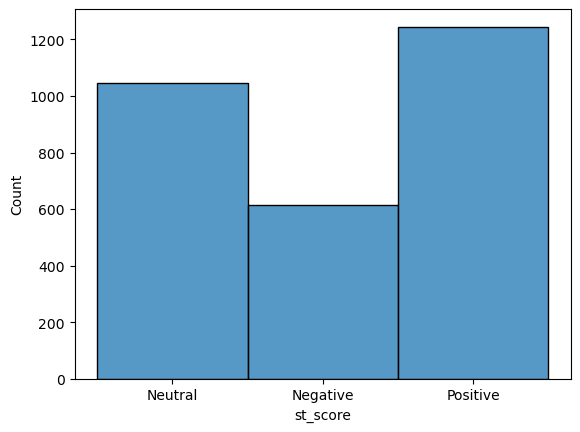

In [218]:
sns.histplot(data = df_sent_comments_eu["st_score"])

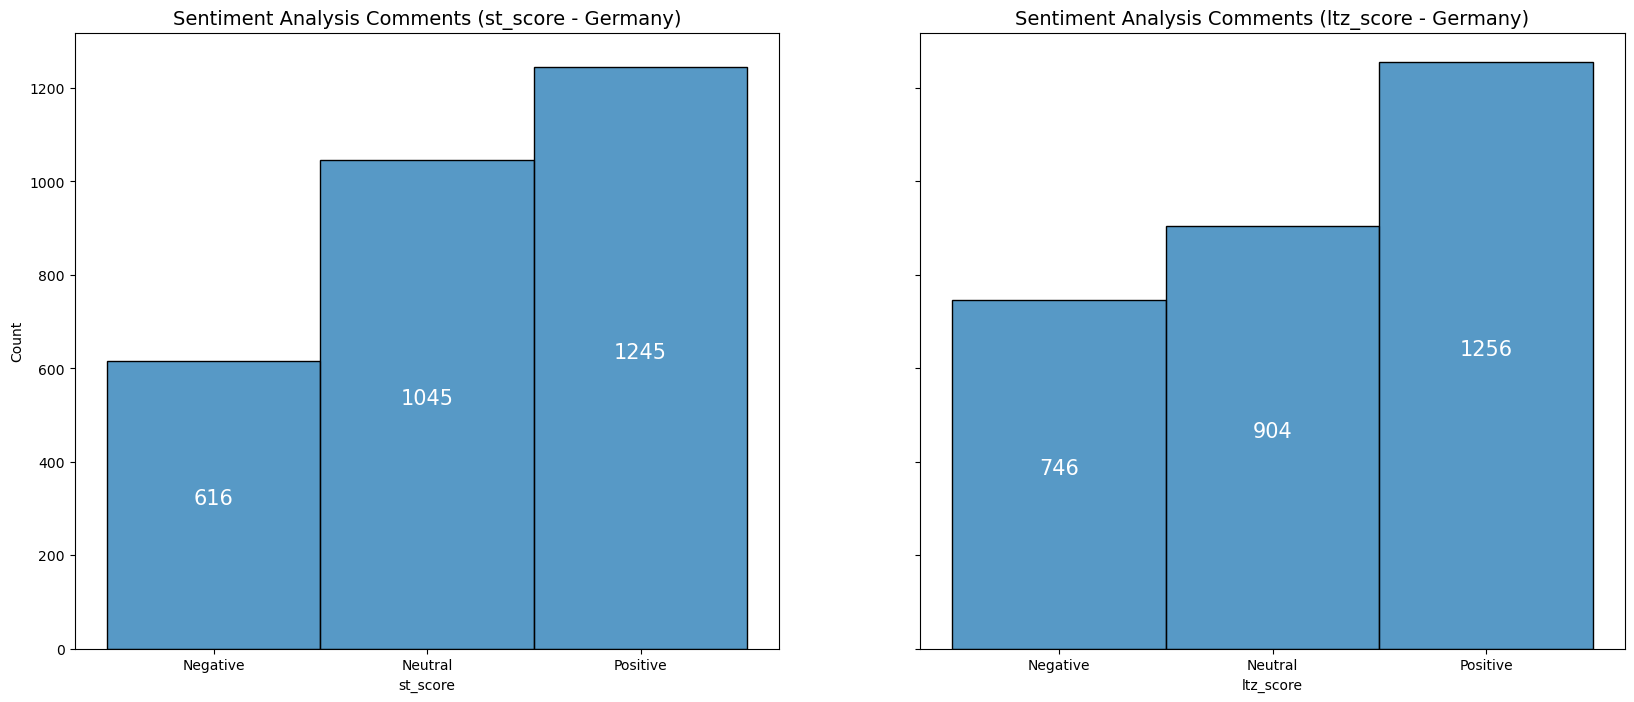

In [219]:
# Create a subplot for each year
fig, axes = plt.subplots(ncols = 2, figsize = (20, 8), sharey = True)


hist_st = sns.histplot(data = df_sent_comments_eu["st_score"].sort_values(), ax = axes[0])

score_group = df_sent_comments_eu.groupby("st_score")["Comments"].count()

for score in range(len(score_group)):
     hist_st.text(score, score_group[score]/2, str(score_group[score]),
     fontdict = dict(color = "white", fontsize = 15),
     horizontalalignment = "center")
         
hist_ltz = sns.histplot(data = df_sent_comments_eu["ltz_score"].sort_values(), ax = axes[1])

score_groupltz = df_sent_comments_eu.groupby("ltz_score")["Comments"].count()

for score in range(len(score_groupltz)):
     hist_ltz.text(score, score_groupltz[score]/2, str(score_groupltz[score]),
     fontdict = dict(color = "white", fontsize = 15),
     horizontalalignment = "center")

plt.rc('axes', titlesize = 14)
plt.rc('figure', titlesize = 14)
axes[0].set_title('Sentiment Analysis Comments (st_score - Germany)')
axes[1].set_title('Sentiment Analysis Comments (ltz_score - Germany)')

plt.show()

### Dashboard

In [220]:
app = dash.Dash()

year_selects = [2019, 2020, 2021, 2022, 2023]
luas_lines = ["All Luas lines", "Green line", "Red line"]

app.layout = html.Div(
    children = [
    html.H1("MSC_DA_CA - Dashboard"),
    html.Span(
    children = [
    f'Prepared: {datetime.now().date()}', 
    html.Br(),
    ' by ',
    html.B("Leda Gale (2023205), "),
    html.Br(),   
    html.I("MSc in Data Analytics (CCT College Dublin)")
    ], style={'margin-bottom': '20%'}
    ), 
    html.Div(    
    children = [
    html.H1("Passengers using Luas Services in Ireland"),
    html.B("The interactive plot allows you to select the year of interest with the option to choose the Luas line information needed"),
    html.Br(), 
    ]
),
    html.Div(   
        children = [
            html.Div( 
        children = [
            html.Div(children = "Year:", className = "menu-title"),
            dcc.Dropdown(
                id = "year_filter",
                options = [
                    {
                        "label": year_select,
                        "value": year_select,
                    }
                    for year_select in year_selects
                ],
                value = 2019,
                clearable = False,
                searchable = False,
                className = "dropdown",
                style={'flex': '30%', "margin-right": "10%", "margin-left": "2%"}
            ),
        ], style={'flex': '50%', 'display': 'flex'}
    ),
        
     html.Div( 
        children = [
            html.Div(children = "Luas line:", className = "menu-title"),
            dcc.Dropdown(
                id = "line_filter",
                options = [
                    {
                        "label": luas_line,
                        "value": luas_line,
                    }
                    for luas_line in luas_lines
                ],
                value = "All Luas lines",
                clearable = False,
                searchable = False,
                className = "dropdown",
                style={'flex': '30%',  "margin-left": "2%"}
            ),
        ], style={'flex': '50%', 'display': 'flex'}
    )
        ],style = {"margin-top" : "2%","display": "flex"}
    ),        
        
    html.Div([  
        dcc.Graph(id = "line_plot")
    ]),
     html.Div(   
        children = [
        html.H1("Passengers Prediction"),
        html.B("In the visualization below determine the number of years seeking to predict data."),
        html.Br(), 
            
        html.Div( 
        children = [
            html.Div(children = "Years to predict:"),
        dcc.Input(
            id = "years_input",
            type = "number",
            value = 1,
            min=1,
            max=10,
            placeholder = "Enter number of years",
            style = {"margin-botton": "10px"}
        )], style={"display":"flex"}),
        dcc.Graph(id = "prediction_plot"),
])
])
    
@app.callback(
    Output('line_plot', 'figure'),
    [Input('line_filter', 'value'),
     Input('year_filter', 'value')]
)
def update_plot(line_filter, year_filter):
    filtered_data = df_ireland1[(df_ireland1['Luas_line'] == line_filter) & (df_ireland1['Year'] == year_filter)]
    return px.line(filtered_data, x = 'Week_Year', y = 'Passengers', color = 'Luas_line', markers = True,
                  labels={'Value': 'Passengers', 'Year': 'Year'}, color_discrete_map={"All Luas lines":'blue',"Red line":'red','Green line':'green'}) 

@app.callback(
    Output('prediction_plot', 'figure'),
    [Input('years_input', 'value')]
)
def update_prediction_plot(years_input):
    
    df_ml_copy = df_ml.copy()
    df_ml_predict = predict_randomf(years_input,df_ml_copy)
    dataset = pd.concat([df_ml_copy, df_ml_predict])
    return px.line(dataset, x = 'date', y = 'Passengers', color = 'Luas_line', markers = True,
                  labels={'Value': 'Passengers', 'Year': 'Year'},
                  color_discrete_map={"All Luas lines":'blue',"Red line":'red','Green line':'green'},
                  line_dash_map={"All Luas lines":"solid"},
                  line_dash = "Luas_line"
                  )


if __name__ == "__main__":
    app.run_server(debug = True, port="8053")
    
    
